# OCTIS Abstract Model

## example usage of ABC and abstractmethod

In [ ]:
from abc import ABC, abstractmethod

# Abstract base class
class Animal(ABC):
    @abstractmethod
    def make_sound(self):
        """All animals must implement this method to make their characteristic sound"""
        pass
    
    def sleep(self):
        """Concrete method - inherited by subclasses"""
        print("Zzz... sleeping")

# Concrete subclass
class Dog(Animal):
    def make_sound(self):
        """Implementation of the abstract method"""
        return "Woof!"

# Another concrete subclass
class Cat(Animal):
    def make_sound(self):
        """Implementation of the abstract method"""
        return "Meow!"

# Trying to instantiate the abstract class would raise an error
try:
    animal = Animal()
except TypeError as e:
    print(f"Error: {e}")  # Error: Can't instantiate abstract class Animal with abstract method make_sound

# Using the concrete subclasses
dog = Dog()
print(dog.make_sound())  # Output: Woof!
dog.sleep()              # Output: Zzz... sleeping

cat = Cat()
print(cat.make_sound())  # Output: Meow!
cat.sleep()              # Output: Zzz... sleeping

Error: Can't instantiate abstract class Animal with abstract method make_sound
Woof!
Zzz... sleeping
Meow!
Zzz... sleeping


## OCTIS workflow

In [439]:
from octis.preprocessing.preprocessing import Preprocessing
from octis.models.LDA import LDA
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.evaluation_metrics.perplexity import Perplexity
from octis.evaluation_metrics.classification_metrics import AccuracyScore, F1Score, RecallScore
import numpy as np
import os

#step 1: build dataset
print('STEP 1: preprocessing')
root_dir =  os.getcwd()
root_dir = root_dir.replace('\\', '/')
data_path = root_dir + '/preprocessed_datasets'
raw_txt_path = data_path + '/20NewsGroup/corpus.txt'
raw_labels_path = data_path + '/20NewsGroup/labels.txt'

p = Preprocessing(vocabulary=None, max_features=None, remove_punctuation=True,
                    lemmatize=False,  stopword_list='english', split=True,
                    min_chars=2, min_words_docs=1,
                    max_df=1.0, min_df=0.0, language='english',
                    remove_stopwords_spacy = True,
                    verbose=True, train_prop=0.4, test_prop=0.5)


dataset = p.preprocess_dataset(
    documents_path=raw_txt_path,   #each row of the txt file is seen as a single document
    labels_path = raw_labels_path
)

#step 2: train model
print('\nSTEP 2: training')
# Create Model
model = LDA(num_topics=10, alpha=0.1, passes = 5,iterations=100, chunksize=5000)
# Get model output
output = model.train_model(dataset)

print(*list(output.keys()), sep="\n")
print(model._get_topics_words(10))

#step 3: evaluate the model
print('\nSTEP 3: evaluation')

npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')
topic_diversity = TopicDiversity(topk=10)
ppl = Perplexity(dataset)
acc = AccuracyScore(dataset)
f1 = F1Score(dataset)
rec = RecallScore(dataset)

# Retrieve metrics score

accuracy = acc.score(output)
print('Accuracy: '+str(accuracy))

F1s = f1.score(output)
print('F1 score: '+str(F1s))

recall = rec.score(output)
print('Recall: '+str(recall))

topic_diversity_score = topic_diversity.score(output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(output)
print("Coherence: "+str(npmi_score))

ppl_score = ppl.score(output)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))


STEP 1: preprocessing


100%|██████████| 16309/16309 [00:00<00:00, 53124.29it/s]


created vocabulary with 1612 words

STEP 2: training
topic-word-matrix
topics
topic-document-matrix
test-topic-document-matrix
[['people', 'make', 'love', 'good', 'thing', 'man', 'time', 'happen', 'give', 'hear'], ['drive', 'system', 'card', 'disk', 'space', 'work', 'problem', 'scsi', 'speed', 'hard'], ['car', 'gun', 'make', 'weapon', 'sell', 'problem', 'call', 'firearm', 'drive', 'pay'], ['information', 'include', 'mail', 'list', 'send', 'post', 'book', 'email', 'address', 'program'], ['make', 'people', 'point', 'question', 'exist', 'belief', 'thing', 'religion', 'human', 'claim'], ['file', 'window', 'image', 'program', 'version', 'color', 'run', 'display', 'problem', 'format'], ['copy', 'change', 'work', 'system', 'package', 'time', 'problem', 'oil', 'black', 'man'], ['key', 'government', 'people', 'encryption', 'make', 'attack', 'vote', 'chip', 'clipper', 'system'], ['game', 'year', 'good', 'play', 'time', 'team', 'win', 'make', 'player', 'back'], ['people', 'government', 'year', 't

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.3179644389944819
F1 score: 0.3179644389944819
Recall: 0.3179644389944819
Topic diversity: 0.76
Coherence: 0.05810885435405737
Perplexity: 4687.016518232861
CrossEntropy: 8.452551522182095


In [270]:
accuracy = acc.score(output)
print('Accuracy: '+str(accuracy))

F1s = f1.score(output)
print('F1 score: '+str(F1s))

recall = rec.score(output)
print('Recall: '+str(recall))

topic_diversity_score = topic_diversity.score(output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(output)
print("Coherence: "+str(npmi_score))

ppl_score = ppl.score(output)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.8661275831087152
F1 score: 0.8661275831087152
Recall: 0.8661275831087152
Topic diversity: 0.81
Coherence: 0.07014487463798856
Perplexity: 7799.946014405481
CrossEntropy: 8.961872091423665


# RSM 

## RSM model

In [403]:
myrsm = RSM(num_topics=20, ksteps=1, epochs=5, btsz = 20, lr=0.001, momentum=0.2, weightinit=0.001)

#output = myrsm.train_model(dataset)
#myrsm.plot_loss()

#train the model
print(myrsm.trained)
myrsm.train_model(dataset)
print(myrsm.trained)

False


100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

True


In [405]:
print(myrsm.ppl)
print(np.log(myrsm.ppl))

1.062729620352867
0.06084071174061206


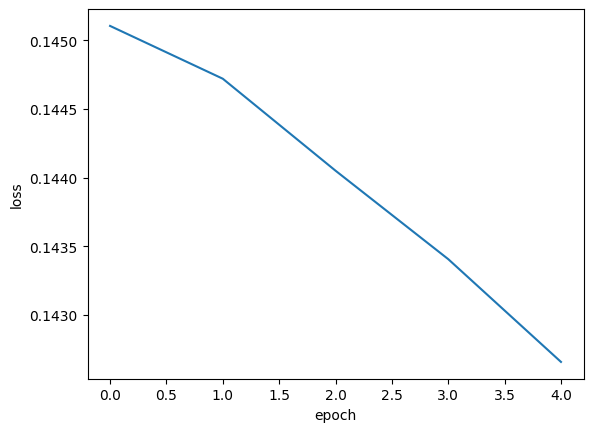

In [406]:
myrsm.plot_loss()

In [388]:
print('DTM shape'+str(myrsm.DTM_train.shape))
print('DTM shape'+str(myrsm.DTM_test.shape))
print('vocab: '+str(len(myrsm.vocab)))
print('train: ' +str(len(dataset.get_partitioned_corpus()[0])))
print('validation: ' +str(len(dataset.get_partitioned_corpus()[1])))
print('test: ' +str(len(dataset.get_partitioned_corpus()[2])))
print('vocab: ' +str(len(dataset.get_vocabulary())))


DTM shape(889, 2949)
DTM shape(1113, 2949)
vocab: 2949
train: 889
validation: 223
test: 1113
vocab: 2949


In [96]:
myrsm_output = myrsm.compute_result()

In [225]:
print(myrsm_output.keys())
print(np.array(myrsm_output['topics']).shape)
print(myrsm_output['topic-word-matrix'].shape)
print(myrsm_output['topic-document-matrix'].shape)
print('test')
print(myrsm_output['test-topic-word-matrix'].shape)
print(myrsm_output['test-topic-document-matrix'].shape)

dict_keys(['topics', 'topic-document-matrix', 'topic-word-matrix', 'test-topic-document-matrix', 'test-topic-word-matrix'])
(2949, 8)
(8, 2949)
(8, 889)
test
(8, 2949)
(8, 1113)


In [226]:
mya = np.array(myrsm_output['topics'])
print(mya[0:39,:].tolist())


[['action', 'bankruptcy', 'aim', 'big', 'blame', 'boost', 'bill', 'annual'], ['bankruptcy', 'action', 'annual', 'aim', 'bill', 'big', 'blame', 'boost'], ['annual', 'aim', 'action', 'boost', 'bankruptcy', 'big', 'bill', 'blame'], ['aim', 'big', 'annual', 'blame', 'action', 'bill', 'bankruptcy', 'boost'], ['aim', 'action', 'blame', 'big', 'annual', 'bill', 'boost', 'bankruptcy'], ['blame', 'boost', 'aim', 'action', 'annual', 'bill', 'big', 'bankruptcy'], ['annual', 'big', 'aim', 'blame', 'bill', 'boost', 'action', 'bankruptcy'], ['bill', 'boost', 'aim', 'annual', 'action', 'big', 'blame', 'bankruptcy'], ['blame', 'action', 'boost', 'annual', 'bill', 'aim', 'big', 'bankruptcy'], ['annual', 'action', 'blame', 'bill', 'big', 'aim', 'boost', 'bankruptcy'], ['annual', 'blame', 'bill', 'big', 'bankruptcy', 'boost', 'action', 'aim'], ['bill', 'action', 'blame', 'annual', 'big', 'bankruptcy', 'boost', 'aim'], ['bill', 'big', 'action', 'boost', 'blame', 'annual', 'aim', 'bankruptcy'], ['boost', '

In [227]:
print(output.keys())
print(np.array(output['topics'])[:,0:5])
print(np.array(output['topics']).shape)
print(output['topic-word-matrix'].shape)
print(output['topic-document-matrix'].shape)
print('test')
print(output['test-topic-document-matrix'].shape)

dict_keys(['topic-word-matrix', 'topics', 'topic-document-matrix', 'test-topic-document-matrix'])
[['country' 'government' 'firm' 'company' 'market']
 ['win' 'play' 'game' 'good' 'match']
 ['card' 'mail' 'broadband' 'information' 'customer']
 ['mobile' 'phone' 'technology' 'gadget' 'search']
 ['election' 'labour' 'party' 'tax' 'government']
 ['government' 'council' 'service' 'work' 'test']
 ['game' 'video' 'film' 'player' 'play']
 ['price' 'rise' 'fall' 'growth' 'month']
 ['film' 'good' 'show' 'award' 'court']
 ['security' 'software' 'network' 'download' 'sale']]
(10, 10)
(10, 2949)
(10, 889)
test
(10, 1113)


In [317]:
print(ppl.score(myrsm_output))
print(np.log(ppl.score(myrsm_output)))

824843133397.8248
27.438459063865967


In [ ]:
w_vh, w_v, w_h = myrsm.weights


### get first words
vec = np.fromiter(myrsm.vocab.keys(), dtype='<U32')
#print(vec[0:10])


def sigmoid(X):
        return (1 / (1 + np.exp(-X)))

#### get topic-word matrix: probability of word given topic

print('normalization of columns')
pdf = np.exp(w_vh + np.outer(w_v, np.ones(w_vh.shape[1])))
norm_const = pdf.sum(axis=1)
probword= pdf / norm_const.reshape((pdf.shape[0],1))



### get topic-document matrix: probability of topic given document
arg2 = np.outer(np.ones(myrsm.DTM_train.shape[0]), w_h)
arg1 = np.dot(myrsm.DTM_train, w_vh)
pdfdoc = sigmoid(arg1 + arg2)
norm_const_doc = pdfdoc.sum(axis=0).reshape((1, pdfdoc.shape[1]))
print(norm_const_doc.shape)
print(pdfdoc.shape)
pdfdoc = pdfdoc / norm_const_doc


### repeat for test set
arg2 = np.outer(np.ones(myrsm.DTM_test.shape[0]), w_h)
arg1 = np.dot(myrsm.DTM_test, w_vh)
pdfdoc0 = np.exp(arg1 + arg2)
norm_const_doc = pdfdoc0.sum(axis=0).reshape((1, pdfdoc.shape[1]))
print(norm_const_doc.shape)
print(pdfdoc0.shape)
pdfdoc0 = pdfdoc0 / norm_const_doc


print(len(pdfdoc[0,:]))
print(np.sum(pdfdoc[0,:]))
print(len(pdfdoc[:,0]))
print(np.sum(pdfdoc[:,0]))
print(len(pdfdoc0[0,:]))
print(np.sum(pdfdoc0[0,:]))
print(len(pdfdoc0[:,0]))
print(np.sum(pdfdoc0[:,0]))


### get best top k words for each topic
print('best top k words for each topic')
nomi = vec
prob_cond_t1 = probword[:,0]
print(nomi[np.argsort(prob_cond_t1)[::-1]][0:3])
print(prob_cond_t1[np.argsort(prob_cond_t1)[::-1]][0:3])
prob_cond_t2 = probword[:,1]
print(nomi[np.argsort(prob_cond_t2)[::-1]][0:3])
print(prob_cond_t2[np.argsort(prob_cond_t2)[::-1]][0:3])
prob_cond_t3 = probword[:,2]
print(nomi[np.argsort(prob_cond_t3)[::-1]][0:4])
print(prob_cond_t3[np.argsort(prob_cond_t3)[::-1]][0:3])
prob_cond_t4 = probword[:,3]
print(nomi[np.argsort(prob_cond_t4)[::-1]][0:3])
print(prob_cond_t4[np.argsort(prob_cond_t4)[::-1]][0:3])

normalization of columns
(1, 250)
(889, 250)
(1, 250)
(1113, 250)
250
0.32015811600707694
889
0.9999999999999994
250
0.22286255910867708
1113
1.0
best top k words for each topic
['small' 'system' 'copy']
[0.0040173  0.00401518 0.00401218]
['suitable' 'interact' 'stiff']
[0.00401287 0.0040128  0.00401273]
['website' 'market' 'run' 'film']
[0.00401816 0.00401706 0.00401623]
['intervention' 'gang' 'eve']
[0.00401269 0.00401218 0.00401204]


In [389]:
'''
### get topic-document matrix: probability of topic given document
arg2 = np.outer(np.ones(myrsm.DTM_train.shape[0]), w_h)
arg1 = np.dot(myrsm.DTM_train, w_vh)
pdfdoc = sigmoid(arg1 + arg2)
norm_const_doc = pdfdoc.sum(axis=0).reshape((1, pdfdoc.shape[1]))
print(norm_const_doc.shape)
print(pdfdoc.shape)
pdfdoc = pdfdoc / norm_const_doc
'''

ntopics = len(w_h)
ndocs = myrsm.DTM_train.shape[0]
Topic_Docs_Matrix = np.zeros((ndocs, ntopics))
for d in range(ndocs):
    vlayer = myrsm.DTM_train[d,:]
    for j in range(ntopics):
        pdf_tj_given_d = sigmoid(np.dot(vlayer, w_vh[:,j]) + w_h[j])
        Topic_Docs_Matrix[d,j] = pdf_tj_given_d

In [390]:
ntopics = len(w_h)
ndocs = myrsm.DTM_test.shape[0]
Test_Topic_Docs_Matrix = np.zeros((ndocs, ntopics))
for d in range(ndocs):
    vlayer = myrsm.DTM_test[d,:]
    for j in range(ntopics):
        pdf_tj_given_d = sigmoid(np.dot(vlayer, w_vh[:,j]) + w_h[j])
        Test_Topic_Docs_Matrix[d,j] = pdf_tj_given_d

In [391]:
from tqdm import tqdm

ntopics = len(w_h)
nwords = myrsm.DTM_train.shape[1]
Topic_Words_Matrix = np.zeros((nwords, ntopics))
for t in tqdm(range(ntopics)):
    hlayer = np.zeros(ntopics)
    hlayer[t] = 1
    for i in range(nwords):
        pdf_wi_given_t = np.exp(np.dot(hlayer, w_vh[i,:]) + w_v[i])                
        Topic_Words_Matrix[i,t] = pdf_wi_given_t

for i in range(nwords):
    # Normalize each row to sum to 1
    Topic_Words_Matrix[i, :] = Topic_Words_Matrix[i, :] / np.sum(Topic_Words_Matrix[i, :])
    
#Topic_Words_Matrix = Topic_Words_Matrix / Topic_Words_Matrix.sum(axis=1, keepdims=True)

100%|██████████| 250/250 [00:04<00:00, 53.57it/s]


In [376]:
print(Topic_Words_Matrix.sum(axis=1))

[1. 1. 1. ... 1. 1. 1.]


In [392]:
print(pdfdoc[0,:])
print(pdfdoc[0,:]/np.sum(pdfdoc[0,:]))

[0.00128492 0.00127192 0.001287   0.00127611 0.00128192 0.00128753
 0.00128345 0.00128402 0.00129048 0.00127389 0.00128438 0.00129252
 0.00129721 0.0012701  0.00125985 0.00129083 0.00127265 0.00128572
 0.00126377 0.00128365 0.00128282 0.00128222 0.00127322 0.00127365
 0.00128232 0.00127384 0.00129427 0.00129375 0.00127773 0.00128239
 0.00129551 0.0012835  0.00126938 0.00127515 0.00127401 0.00127136
 0.00127513 0.00129292 0.0012873  0.00128385 0.00126799 0.00125322
 0.00128695 0.00127671 0.00128486 0.0012832  0.00127996 0.00128437
 0.00129194 0.00127487 0.00128859 0.00128042 0.00127083 0.00128022
 0.00128197 0.00129616 0.00127784 0.00127251 0.00127378 0.00128154
 0.00128399 0.00127654 0.00128367 0.00127778 0.00129187 0.00128065
 0.00127221 0.0012846  0.00127763 0.00128763 0.00127375 0.00128116
 0.00129542 0.00126511 0.00128094 0.00125482 0.00128249 0.00128405
 0.00128406 0.0012821  0.00129171 0.00128535 0.00126379 0.00127866
 0.00128308 0.00126462 0.00127342 0.00128605 0.00129933 0.0012

In [393]:
print(output['topics'])
print(type(output['topics']))
print(type(output['topics'][0]))

[['country', 'government', 'firm', 'company', 'market', 'business', 'report', 'plan', 'economy', 'profit'], ['win', 'play', 'game', 'good', 'match', 'player', 'back', 'team', 'side', 'final'], ['card', 'mail', 'broadband', 'information', 'customer', 'find', 'number', 'internet', 'order', 'light'], ['mobile', 'phone', 'technology', 'gadget', 'search', 'service', 'show', 'user', 'computer', 'device'], ['election', 'labour', 'party', 'tax', 'government', 'plan', 'music', 'tory', 'campaign', 'public'], ['government', 'council', 'service', 'work', 'test', 'ban', 'pension', 'age', 'local', 'scheme'], ['game', 'video', 'film', 'player', 'play', 'good', 'technology', 'high', 'include', 'work'], ['price', 'rise', 'fall', 'growth', 'month', 'rate', 'oil', 'show', 'market', 'analyst'], ['film', 'good', 'show', 'award', 'court', 'star', 'include', 'win', 'movie', 'actor'], ['security', 'software', 'network', 'download', 'sale', 'virus', 'attack', 'firm', 'user', 'system']]
<class 'list'>
<class 'l

In [394]:
myrsm_output['topics'] = []
words = np.fromiter(myrsm.vocab.keys(), dtype='<U32')
nw = myrsm_output['topic-word-matrix'].shape[1]
print(nw)
nt = myrsm_output['topic-word-matrix'].shape[0]
print(nt)
for i in range(nt):
    prob_cond_t = myrsm_output['topic-word-matrix'][:,2]
    bestw = words[np.argsort(prob_cond_t)[::-1]][0:10]
    myrsm_output['topics'].append(bestw.tolist())

2949
250


In [400]:
print(output['topic-word-matrix'].shape)
print(output['topic-document-matrix'].shape)
print(output['test-topic-document-matrix'].shape)
print(Test_Topic_Docs_Matrix.shape)
print(Topic_Words_Matrix.shape)
print(Topic_Docs_Matrix.shape)
myrsm_output['test-topic-document-matrix'] = Test_Topic_Docs_Matrix.T
myrsm_output['topic-word-matrix'] = Topic_Words_Matrix.T
myrsm_output['topic-document-matrix'] = Topic_Docs_Matrix.T

(10, 2949)
(10, 889)
(10, 1113)
(1113, 250)
(2949, 250)
(889, 250)


In [396]:
print(output['topic-word-matrix'].shape)
print(output['topic-document-matrix'].shape)
print(output['test-topic-document-matrix'].shape)
print(probword.shape)
print(pdfdoc.shape)
print(pdfdoc0.shape)
myrsm_output['topic-word-matrix'] = probword.T
myrsm_output['topic-document-matrix'] = pdfdoc.T
myrsm_output['test-topic-document-matrix'] = pdfdoc0.T

(10, 2949)
(10, 889)
(10, 1113)
(2949, 250)
(889, 250)
(1113, 250)


In [401]:
print(ppl.score(myrsm_output))
print(ppl.score(output))

1.7569048712215145
7799.946014405481


In [408]:
def rsmppl(w_v,w_h,w_vh,testmatrix):

	testD=testmatrix.sum(axis=1)

	# compute hidden activations
	h = sigmoid(np.dot(testmatrix, w_vh) + np.outer(testD, w_h))
	# compute visible activations
	v = np.dot(h, w_vh.T) + w_v
	# exp and normalize.
	tmp = np.exp(v)
	tsum = tmp.sum(axis=1)
	tsum = tsum.reshape(-1,1)
	pdf = tmp / tsum

	#z = np.nansum(testmatrix * np.log(pdf))
	z = np.sum(testmatrix * np.log(pdf))
	s = np.sum(testmatrix)
	ppl = np.exp(- z / s)
	print("PPL calculating..........")

	return ppl


print('PPL: '+str(rsmppl(w_v, w_h, w_vh, myrsm.DTM_test)))

PPL calculating..........
PPL: 3071.9508666624306


In [229]:
m1 = myrsm_output['topic-word-matrix']
m2 = output['topic-word-matrix']

print(m1.sum(axis=0)[0])
print(m2.sum(axis=0)[0])

1.0
0.011381034


In [ ]:
dtm, vocab = myrsm.build_dtm(dataset.get_corpus())
tdm = myrsm._get_topic_document_matrix(dtm)
tdm.shape

In [399]:
accuracy = acc.score(myrsm_output)
print('Accuracy: '+str(accuracy))

F1s = f1.score(myrsm_output)
print('F1 score: '+str(F1s))

recall = rec.score(myrsm_output)
print('Recall: '+str(recall))

topic_diversity_score = topic_diversity.score(myrsm_output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(myrsm_output)
print("Coherence: "+str(npmi_score))

ppl_score = ppl.score(myrsm_output)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.19946091644204852
F1 score: 0.19946091644204852
Recall: 0.19946091644204852
Topic diversity: 0.004
Coherence: -0.07331113949561006
Perplexity: 1104.473830369096
CrossEntropy: 7.007124328934472


In [ ]:
from octis.models.model import AbstractModel
import gensim.corpora as corpora
import numpy as np
from tqdm import tqdm
import seaborn as sns
import pandas as pd

class RSM(AbstractModel):

    id2word = None
    id_corpus = None
    use_partitions = True
    update_with_test = False

    def __init__(
        self, num_topics=4, ksteps=1, epochs=10, btsz = 100, lr=0.001, momentum=0.5, weightinit=0.001,
        random_state=None):
        """
        Initialize RSM model

        Parameters
        ----------
        num_topics (int, optional) – The number of requested latent topics to
        be extracted from the training corpus.

        iterations (int, optional) – Maximum number of iterations through the
        corpus when inferring the topic distribution of a corpus.

        random_state ({np.random.RandomState, int}, optional) – Either a
        randomState object or a seed to generate one.s
        Useful for reproducibility.


        """
        super().__init__()
        self.hyperparameters = dict()
        self.hyperparameters["num_topics"] = num_topics
        self.hyperparameters["epochs"] = epochs
        self.hyperparameters["random_state"] = random_state
        self.hyperparameters["ksteps"] = ksteps
        self.hyperparameters["btsz"] = btsz
        self.hyperparameters["lr"] = lr
        self.hyperparameters["momentum"] = momentum
        self.hyperparameters["weightinit"] = weightinit
        self.trained = False


    def partitioning(self, use_partitions, update_with_test=False):
        """
        Handle the partitioning system to use and reset the model to perform
        new evaluations

        Parameters
        ----------
        use_partitions: True if train/set partitioning is needed, False
                        otherwise
        update_with_test: True if the model should be updated with the test set,
                          False otherwise
        """
        self.use_partitions = use_partitions
        self.update_with_test = update_with_test
        self.id2word = None
        self.id_corpus = None


    def train_model(self, dataset):  #top_words=10
        """
        Train the model and return output

        Parameters
        ----------
        dataset : dataset to use to build the model


        Returns
        -------
        result : dictionary with up to 3 entries,
                 'topics', 'topic-word-matrix' and
                 'topic-document-matrix'
        """

        if self.use_partitions:
            self.train_corpus, test_corpus = dataset.get_partitioned_corpus(use_validation=False)
            self.DTM_test, _ = self.build_dtm(test_corpus)
        else:
            self.train_corpus = dataset.get_corpus()

        self.DTM_train, self.vocab = self.build_dtm(self.train_corpus)
         
        

        self.train_rsm(self.DTM_train, units=self.hyperparameters["num_topics"], ksteps=self.hyperparameters["ksteps"],
                       epochs=self.hyperparameters["epochs"], btsz=self.hyperparameters["btsz"],lr=self.hyperparameters["lr"],
                       momentum=self.hyperparameters["momentum"], weightinit=self.hyperparameters["weightinit"])


        self.trained = True
        #model_output = self.compute_result()

        #return model_output


        

    def compute_result(self):
        result = {}
        result['topics'] = self.get_topics_words(topk=10)
        result['topic-document-matrix'] = self._get_topic_document_matrix(self.DTM_train)
        result['topic-word-matrix'] = self._get_topics_words_matrix(self.DTM_train)
        if self.use_partitions:
            result['test-topic-document-matrix'] = self._get_topic_document_matrix(self.DTM_test)
            result['test-topic-word-matrix'] = self._get_topics_words_matrix(self.DTM_test)
        return result
            


#to improve: 
# - add a method to get the topic-document matrix
# - add a method to get the topic-word matrix
# - add a method to get the topics as list of words
# - add a way to penalize the parameters
# - add persistent contrastive divergence
# - add mean field contrastive divergence

    def train_rsm(self, DTM, units=4, 
                  ksteps=1, 
                  epochs=10, 
                  btsz = 100, 
                  lr=0.001, 
                  momentum=0.5, 
                  weightinit=0.001):
        '''
        DTM: numpy 2darray, document-term matrix. each row represent a document
        units: int, number of hidden units
        kstep: int, number of steps for k-step contrastive divergence
        epochs: int, number of training iterations over all the batches
        btsz: int, batch size
        lr: float, learning rate 
        momentum: float, momentum
        '''
        N, dictsize = DTM.shape
        # initilize weights
        w_vh = weightinit * np.random.randn(dictsize, units)
        w_v = weightinit * np.random.randn(dictsize)
        w_h = weightinit * np.random.randn(units)
        # weight updates
        wu_vh = np.zeros((dictsize, units))
        wu_v = np.zeros((dictsize))
        wu_h = np.zeros((units))
        delta = lr/btsz
        batches = N/btsz
        self.train_mse = np.zeros(epochs)

        for epoch in tqdm(range(epochs)):
            lik = 0
            err = np.zeros(int(batches))
            for b in range(int(batches)):
                # get visible units / data from batch
                start_id = b * btsz 
                v0 = DTM[start_id : start_id + btsz]  
                # compute D : vector with number of words for each document
                D = v0.sum(axis=1) 
                v1 = v0
                # get hidden densities given the visible
                h0 = self.sigmoid(np.dot(v1, w_vh) + np.outer(D, w_h))
                h1 = h0
                for ks in range(int(ksteps)):  #k-step contrastive divergence
                    v1, h1 , lik0 = self.cd_step(h1=h1, D=D, N=btsz, H=units, w_vh=w_vh, w_v=w_v, w_h=w_h)
                # gradient descent update
                wu_vh, wu_v, wu_h, w_vh, w_v, w_h = self.gradient_step(v0, v1, h0, h1, momentum, delta, 
                                                                        wu_vh, wu_v, wu_h, w_vh, w_v, w_h)
                # mse
                err[b] = np.linalg.norm(v0-v1)**2/(dictsize*btsz)
                lik += lik0

            self.train_mse[epoch] = np.mean(err)

        self.weights = w_vh, w_v, w_h
        self.ppl = np.exp(-lik / np.sum(DTM))





    def plot_loss(self):
        if self.train_mse is None:
            raise ValueError("Model has not been trained yet. Please train the model before plotting the loss.")
        sns.lineplot(data=pd.DataFrame({'loss': self.train_mse , 
                                'epoch' : [i for i in range(len(self.train_mse))]}), 
                                y='loss', x = 'epoch')


    def _get_topic_document_matrix(self, DTM):
        """
        Get the topic-document matrix

        Returns
        -------
        topic-document matrix
        """
        if self.train_corpus is None:
            raise ValueError("Model has not been trained yet. Please train the model before getting the topic-document matrix.")
        
        w_vh, w_v, w_h = self.weights
        # Get the topic-document matrix
        topic_document_matrix = self.sigmoid(np.dot(DTM, w_vh) + np.outer(DTM.sum(axis=1), w_h))

        return topic_document_matrix.T
    

    def _get_topics_words_matrix(self, DTM):
        """
        Get the topic-word matrix

        Returns
        -------
        topic-word matrix
        """
        if self.train_corpus is None:
            raise ValueError("Model has not been trained yet. Please train the model before getting the topic-word matrix.")
        
        w_vh, w_v, w_h = self.weights
        # Get the topic-word matrix
        topic_word_matrix = np.zeros((DTM.shape[1], w_vh.shape[1]))

        for i in range(self.hyperparameters["num_topics"]):
            #predict hidden given visible
            #h_dist = np.dot(DTM, w_vh) + np.outer(DTM.sum(axis=1), w_h)
            #get sigmoid density of hidden units
            #h_pdf = self.sigmoid(h_dist)
            #get softmax density of visible units
            h_i = np.zeros((DTM.shape[0], w_vh.shape[1]))
            h_i[:, i] = 1

            v_dist = np.dot(h_i, w_vh.T) + w_v
            #get softmax density of visible units
            v_pdf = np.exp(v_dist)/(np.exp(v_dist).sum(axis=1).reshape((DTM.shape[0],1)))
            topic_word_matrix[:, i] = v_pdf.sum(axis=0)

        #predict visible given hidden
        #v_dist = np.dot(, w_vh.T) + w_v
        #get softmax density of visible units
        #v_pdf = np.exp(v_dist)/(np.exp(v_dist).sum(axis=1).reshape((N,1)))

        return topic_word_matrix.T



    def get_topics_words(self, topk=10):
        """
        Get the topics as list of words

        Parameters
        ----------
        topk : int, number of top words to return for each topic

        Returns
        -------
        topics : list of lists, each inner list contains the topk words for a topic
        """
        if self.id2word is None:
            raise ValueError("Model has not been trained yet. Please train the model before getting the topics.")
        
        twm = self._get_topics_words_matrix(self.DTM_train)
        topics = []
        for i in range(twm.shape[1]):
            top_k = np.argsort(twm[:, i])[-topk:]
            top_k_words = list(reversed([self.id2word[i] for i in top_k]))
            topics.append(top_k_words)
        
        return topics


    def gradient_step(self, v1, v2, h1, h2, momentum, delta, wu_vh, wu_v, wu_h, w_vh, w_v, w_h):
        wu_vh = wu_vh * momentum + np.dot(v1.T, h1) - np.dot(v2.T, h2)
        wu_v = wu_v * momentum + v1.sum(axis=0) - v2.sum(axis=0)
        wu_h = wu_h * momentum + h1.sum(axis=0) - h2.sum(axis=0)
        w_vh += wu_vh * delta
        w_v += wu_v * delta
        w_h += wu_h * delta
        return wu_vh, wu_v, wu_h, w_vh, w_v, w_h


    #kstepCD; alternative to mean field CD and to persistent CD
    def cd_step(self, h1, D, N, H, w_vh, w_v, w_h):
        #algorithm for Contrastive Divergence Gibbs sampling
        #sample values from U(0,1)
        h_unif = np.random.rand(N, H) 
        h_sampled = np.array(h_unif < h1, dtype=int)
        #predict visible given hidden
        v_dist = np.dot(h_sampled, w_vh.T) + w_v
        #get softmax density of visible units
        v_pdf = np.exp(v_dist)/(np.exp(v_dist).sum(axis=1).reshape((N,1)))
        #sample values from multinomial distribution given the document length
        v_sampled = np.zeros(v_dist.shape)            
        for i in range(int(N)):
            v_sampled[i] = np.random.multinomial(D[i], v_pdf[i], size=1)

        lik0 = np.sum(np.log(v_pdf[np.arange(N), v_sampled.argmax(axis=1)]))
        #get densities of hiddens given sampled visibles
        h1 = self.sigmoid(np.dot(v_sampled, w_vh) + np.outer(D, w_h))
        return v_sampled, h1, lik0


    def sigmoid(self, X):
        """
        sigmoid of X
        """
        return (1 + np.tanh(X/2))/2
        
    def build_dtm(self, tokenized_corpus): #, asdataframe=False):
        self.id2word = corpora.Dictionary(tokenized_corpus)
        id_corpus = [self.id2word.doc2bow(document) for document in tokenized_corpus]
        vocab = self.id2word.token2id
        N = len(id_corpus)
        DTM = np.zeros((N, len(vocab)))
        for i in range(N):
            doc = id_corpus[i]
            for id, count in doc:
                DTM[i,id] = count

        return DTM, vocab



In [461]:
myrsm = RSM(num_topics=50, ksteps=1, epochs=1, btsz = 200, lr=0.001, momentum=0.2, weightinit=0.001)
myrsm.train_model(dataset)

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


In [462]:
myrsm.weights = w_vh, w_v, w_h

In [ ]:
### build rsm output for octis evaluation

ntopics = len(w_h)
ndocs = myrsm.DTM_train.shape[0]
Topic_Docs_Matrix = np.zeros((ndocs, ntopics))
for d in tqdm(range(ndocs)):
    vlayer = myrsm.DTM_train[d,:]
    for j in range(ntopics):
        pdf_tj_given_d = sigmoid(np.dot(vlayer, w_vh[:,j]) + w_h[j])
        Topic_Docs_Matrix[d,j] = pdf_tj_given_d


ntopics = len(w_h)
ndocs = myrsm.DTM_test.shape[0]
Test_Topic_Docs_Matrix = np.zeros((ndocs, ntopics))
for d in tqdm(range(ndocs)):
    vlayer = myrsm.DTM_test[d,:]
    for j in range(ntopics):
        pdf_tj_given_d = sigmoid(np.dot(vlayer, w_vh[:,j]) + w_h[j])
        Test_Topic_Docs_Matrix[d,j] = pdf_tj_given_d

ntopics = len(w_h)
nwords = myrsm.DTM_train.shape[1]
Topic_Words_Matrix = np.zeros((nwords, ntopics))
for t in tqdm(range(ntopics)):
    hlayer = np.zeros(ntopics)
    hlayer[t] = 1
    for i in range(nwords):
        pdf_wi_given_t = np.exp(np.dot(hlayer, w_vh[i,:]) + w_v[i])                
        Topic_Words_Matrix[i,t] = pdf_wi_given_t

for i in range(nwords):
    # Normalize each row to sum to 1
    Topic_Words_Matrix[i, :] = Topic_Words_Matrix[i, :] / np.sum(Topic_Words_Matrix[i, :])
    


myrsm_output = {}
myrsm_output['test-topic-document-matrix'] = Test_Topic_Docs_Matrix.T
myrsm_output['topic-word-matrix'] = Topic_Words_Matrix.T
myrsm_output['topic-document-matrix'] = Topic_Docs_Matrix.T


myrsm_output['topics'] = []
words = np.fromiter(myrsm.vocab.keys(), dtype='<U32')
nw = myrsm_output['topic-word-matrix'].shape[1]
print(nw)
nt = myrsm_output['topic-word-matrix'].shape[0]
print(nt)
for i in tqdm(range(nt)):
    prob_cond_t = myrsm_output['topic-word-matrix'][:,2]
    bestw = words[np.argsort(prob_cond_t)[::-1]][0:10]
    myrsm_output['topics'].append(bestw.tolist())

C:\Users\feder\AppData\Local\Temp\ipykernel_3264\193277701.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
100%|██████████| 50/50 [00:00<00:00, 133.33it/s]


In [468]:
accuracy = acc.score(myrsm_output)
print('Accuracy: '+str(accuracy))

F1s = f1.score(myrsm_output)
print('F1 score: '+str(F1s))

recall = rec.score(myrsm_output)
print('Recall: '+str(recall))

topic_diversity_score = topic_diversity.score(myrsm_output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(myrsm_output)
print("Coherence: "+str(npmi_score))

ppl_score = ppl.score(myrsm_output)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.06952789699570816
F1 score: 0.06952789699570816
Recall: 0.06952789699570816
Topic diversity: 0.02
Coherence: -0.021012860683829637
Perplexity: 3.0850494899601526
CrossEntropy: 1.1265676993551452


# subtesting rsm

In [8]:
id2word = None
id_corpus = None
use_partitions = True

if use_partitions:
    train_corpus, test_corpus = dataset.get_partitioned_corpus(
        use_validation=False)
    

In [7]:
print(type(train_corpus))
print(train_corpus[0])

<class 'list'>
['spending', 'boost', 'economy', 'boost', 'state', 'spending', 'effort', 'create', 'job', 'kick', 'start', 'economy', 'earmark', 'win', 'month', 'total', 'annual', 'budget', 'government', 'main', 'problem', 'slump', 'consumption', 'construction', 'industry', 'aim', 'create', 'job', 'focus', 'infrastructure', 'home', 'building', 'provide', 'public', 'firm', 'money', 'hire', 'worker', 'government', 'set', 'economic', 'growth', 'rate', 'target', 'hint', 'danger', 'action', 'internal', 'external', 'economic', 'condition', 'remain', 'finance', 'statement', 'blame', 'continue', 'uncertainty', 'oil', 'price', 'foreign', 'exchange', 'rate', 'domestic', 'demand', 'show', 'sign', 'quick', 'rebound', 'growth', 'ministry', 'convince', 'plan', 'work', 'primary', 'worry', 'centre', 'government', 'optimistic', 'view', 'front', 'budget', 'turn', 'economy', 'report', 'problem', 'face', 'consumer', 'effect', 'credit', 'bubble', 'recently', 'burst', 'million', 'default', 'credit', 'card', 

In [11]:
if id2word is None:
    id2word = corpora.Dictionary(dataset.get_corpus())

if id_corpus is None:
    id_corpus = [id2word.doc2bow(document)
                        for document in train_corpus]

In [17]:
print(type(id_corpus))
print(id_corpus[6])
#each document is a list of tuples were the first term is the word index
#and the second term is the frequency of that word in that document
print(len(id_corpus[6]))
print(len(train_corpus[6]))
print(np.sum(np.array([b for a,b in id_corpus[6]])))

<class 'list'>
[(4, 2), (17, 1), (44, 1), (47, 3), (62, 2), (63, 3), (77, 2), (151, 2), (158, 1), (161, 1), (165, 5), (172, 1), (175, 1), (184, 2), (194, 1), (195, 2), (200, 1), (203, 1), (212, 2), (214, 1), (216, 1), (227, 1), (245, 1), (256, 1), (270, 1), (275, 1), (277, 1), (321, 4), (324, 1), (327, 1), (329, 1), (337, 1), (384, 1), (385, 2), (386, 1), (387, 1), (388, 1), (389, 1), (390, 7), (391, 2), (392, 1), (393, 2), (394, 1), (395, 1), (396, 7), (397, 1), (398, 1), (399, 1), (400, 1), (401, 1), (402, 1), (403, 1), (404, 1), (405, 4), (406, 5), (407, 1), (408, 1), (409, 1), (410, 1), (411, 2), (412, 1), (413, 1), (414, 1), (415, 1), (416, 1), (417, 5), (418, 12), (419, 1), (420, 1), (421, 1), (422, 1), (423, 1), (424, 1)]
73
129
129


This output is not useful, I need the dtm as a numpy 2darray. But I need train_corpus and test corpus. 

In [ ]:
import pandas as pd
import numpy as np
import gensim.corpora as corpora

def build_dtm(tokenized_corpus, asdataframe=False):
    id2word = corpora.Dictionary(tokenized_corpus)
    id_corpus = [id2word.doc2bow(document) for document in train_corpus]
    vocab = id2word.token2id
    N = len(id_corpus)
    DTM = np.empty((N, len(vocab)))
    for i in range(N):
        doc = id_corpus[i]
        for id, count in doc:
            DTM[i,id] = count

    if (asdataframe):
        DTM = pd.DataFrame(DTM)
        DTM.columns = vocab.keys()
        return DTM
    else:
        return DTM, vocab


2

In [35]:
print(id2word.token2id)
print(id2word.token2id.keys())
vocab = id2word.token2id
N = len(id_corpus)
DTM = np.empty((N, len(vocab)))

for i in range(N):
    doc = id_corpus[i]
    for id, count in doc:
        DTM[i,id] = count


import pandas as pd
print(DTM.shape)
print(pd.Series(DTM[134,:]).describe())

{'action': 0, 'aim': 1, 'annual': 2, 'bankruptcy': 3, 'big': 4, 'bill': 5, 'blame': 6, 'boost': 7, 'bubble': 8, 'budget': 9, 'build': 10, 'building': 11, 'burst': 12, 'business': 13, 'card': 14, 'centre': 15, 'chance': 16, 'company': 17, 'concern': 18, 'condition': 19, 'construction': 20, 'consumer': 21, 'consumption': 22, 'continue': 23, 'convince': 24, 'country': 25, 'create': 26, 'creation': 27, 'credit': 28, 'danger': 29, 'default': 30, 'demand': 31, 'dog': 32, 'domestic': 33, 'due': 34, 'earmark': 35, 'economic': 36, 'economy': 37, 'effect': 38, 'effort': 39, 'employment': 40, 'estate': 41, 'exchange': 42, 'external': 43, 'face': 44, 'family': 45, 'finance': 46, 'firm': 47, 'focus': 48, 'foreign': 49, 'front': 50, 'give': 51, 'global': 52, 'government': 53, 'growth': 54, 'half': 55, 'hint': 56, 'hire': 57, 'home': 58, 'hospital': 59, 'house': 60, 'include': 61, 'income': 62, 'increase': 63, 'industry': 64, 'infrastructure': 65, 'internal': 66, 'job': 67, 'kick': 68, 'korean': 69, 

# dataset class

In [5]:
dataset.get_vocabulary()

array(['abandon', 'abide', 'ability', ..., 'youngster', 'youth', 'zone'],
      dtype=object)

In [5]:
print(dir(dataset))
print('\n')
print(dataset.get_metadata())

print(dataset.get_metadata()['total_documents'] * 0.4)
print(dataset.get_metadata()['total_documents'] * 0.1)
print(dataset.get_metadata()['total_documents'] * 0.5)
print(dataset.get_metadata()['last-training-doc'])
print( dataset.get_metadata()['last-validation-doc'] - dataset.get_metadata()['last-training-doc'])
print( dataset.get_metadata()['total_documents'] - dataset.get_metadata()['last-validation-doc'])

['_Dataset__corpus', '_Dataset__labels', '_Dataset__metadata', '_Dataset__original_indexes', '_Dataset__vocabulary', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_load_corpus', '_load_document_indexes', '_load_edges', '_load_labels', '_load_metadata', '_load_vocabulary', '_save_document_indexes', '_save_edges', '_save_labels', '_save_metadata', '_save_vocabulary', 'dataset_path', 'fetch_dataset', 'get_corpus', 'get_edges', 'get_info', 'get_labels', 'get_metadata', 'get_partitioned_corpus', 'get_vocabulary', 'is_cached', 'load_custom_dataset_from_folder', 'save']


{'total_documents': 2225, 'vocabulary_length': 2949, 'preprocessing-info': ['lowercase', 'remove_punctuation', 'filter words with

# abstract model class

In [ ]:
print(dir(model))
print(model.__class__) #particular object
print(dir(output))
print(output.__class__) #simple dictionary
print('output contents:')
print(*list(output.keys()), sep="\n")

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_topic_document_matrix', '_get_topics_words', 'hyperparameters', 'hyperparameters_info', 'id2word', 'id_corpus', 'info', 'partitioning', 'set_hyperparameters', 'train_model', 'trained_model', 'update_with_test', 'use_partitions']
<class 'octis.models.LDA.LDA'>
['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__

# numpy practice

In [419]:

matrice = np.array([[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]])

csum = matrice.sum(axis=0)  # Sum along columns
rsum = matrice.sum(axis=1)  # Sum along rows

print(csum)  # Sum along columns
print(rsum)  # Sum along rows

print(csum.reshape((1, -1)))  # Reshape to a row vector
print(rsum.reshape((-1, 1)))  # Reshape to a column vector

print(np.outer(rsum, np.ones(matrice.shape[0])))  # Outer product with ones

print(matrice/np.outer(rsum, np.ones(matrice.shape[0])))  # Outer product with ones


[12 15 18]
[ 6 15 24]
[[12 15 18]]
[[ 6]
 [15]
 [24]]
[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]]
[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]]


In [421]:
def normalize_rows(matrix):
    """
    Normalize the rows of a matrix so that each row sums to 1.
    
    Parameters:
    matrix (numpy.ndarray): The input matrix to normalize.
    
    Returns:
    numpy.ndarray: The normalized matrix.
    """
    row_sums = matrix.sum(axis=1, keepdims=True)
    return matrix / row_sums

def normalize_columns(matrix):
    """
    Normalize the columns of a matrix so that each column sums to 1.
    
    Parameters:
    matrix (numpy.ndarray): The input matrix to normalize.
    
    Returns:
    numpy.ndarray: The normalized matrix.
    """
    col_sums = matrix.sum(axis=0, keepdims=True)
    return matrix / col_sums

# Example usage
matrice = np.array([[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]])

print(normalize_rows(matrice))
print(normalize_columns(matrice))

[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]]
[[0.08333333 0.13333333 0.16666667]
 [0.33333333 0.33333333 0.33333333]
 [0.58333333 0.53333333 0.5       ]]


# nuovo

In [1]:
### import all libraries

import pandas as pd
import numpy as np
import gensim.corpora as corpora
from tqdm import tqdm
import os
from octis.preprocessing.preprocessing import Preprocessing
import seaborn as sns

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def build_dtm(tokenized_corpus): #, asdataframe=False):
    id2word = corpora.Dictionary(tokenized_corpus)
    id_corpus = [id2word.doc2bow(document) for document in tokenized_corpus]
    vocab = id2word.token2id
    N = len(id_corpus)
    dtm = np.zeros((N, len(vocab)))
    for i in tqdm(range(N)):
        doc = id_corpus[i]
        for id, count in doc:
            dtm[i,id] = count

    return dtm, vocab

In [3]:
#### load and preprocess data
root_dir =  os.getcwd()
root_dir = root_dir.replace('\\', '/')
data_path = root_dir + '/preprocessed_datasets'
raw_txt_path = data_path + '/20NewsGroup/corpus.txt'
raw_labels_path = data_path + '/20NewsGroup/labels.txt'

p = Preprocessing(vocabulary=None, max_features=None, remove_punctuation=True,
                    lemmatize=False,  stopword_list='english', split=True,
                    min_chars=2, min_words_docs=1,
                    max_df=1.0, min_df=0.0, language='english',
                    remove_stopwords_spacy = True,
                    verbose=True)

dataset = p.preprocess_dataset(
    documents_path = raw_txt_path,   #each row of the txt file is seen as a single document
    labels_path = raw_labels_path
)

train, test = dataset.get_partitioned_corpus(use_validation=False)

train_dtm, vocab = build_dtm(train)


100%|██████████| 16309/16309 [00:00<00:00, 46731.81it/s]


created vocabulary with 1612 words


100%|██████████| 11415/11415 [00:00<00:00, 57942.19it/s]


In [399]:
### rsm train functions

def train_rsm(DTM, units=20, ksteps=1, 
                epochs=10, btsz = 10, 
                lr=0.1, momentum=0.5, 
                weightinit=0.001, initw=None):
    '''
    DTM: numpy 2darray, document-term matrix. each row represent a document
    units: int, number of hidden units
    kstep: int, number of steps for k-step contrastive divergence
    epochs: int, number of training iterations over all the batches
    btsz: int, batch size
    lr: float, learning rate 
    momentum: float, momentum
    '''
    N, dictsize = DTM.shape
    # initilize weights
    if initw==None:
        w_vh = weightinit * np.random.randn(dictsize, units)
        w_v = weightinit * np.random.randn(dictsize)
        w_h = weightinit * np.random.randn(units)
    else:
        w_vh, w_v, w_h = initw

    # weight updates
    wu_vh = np.zeros((dictsize, units))
    wu_v = np.zeros((dictsize))
    wu_h = np.zeros((units))
    #lr = lr/btsz
    batches = N/btsz
    train_mse = np.zeros(epochs)
    train_pdf = np.zeros(epochs)

    for epoch in tqdm(range(epochs)):
        try:
            lik = 0
            err = np.zeros(int(batches))
            pdfs0 = np.zeros(int(batches))
            for b in range(int(batches)):
                # get visible units / data from batch
                start_id = b * btsz 
                v0 = DTM[start_id : start_id + btsz]  
                # compute D : vector with number of words for each document
                D = v0.sum(axis=1) 
                v1 = v0
                # # # print('h0 shape: ', h0.shape)
                # # # print('v1 shape: ', v1.shape)
                # # # print('D shape: ', D.shape)
                # # # print('w_vh shape: ', w_vh.shape)
                # # # print('w_h shape: ', w_h.shape)
                # # # print('w_v shape: ', w_v.shape)
                # # # v1_per_wh = np.dot(v1, w_vh)
                # # # print('v1_per_wh shape: ', v1_per_wh.shape)
                # # # D_per_w_h = np.outer(D, w_h)
                # # # print('D_per_w_h shape: ', D_per_w_h.shape)
                # # # return
                # get hidden densities given the visible
                h0 = sigmoid(np.dot(v1, w_vh) + np.outer(D, w_h))
                h1 = h0
                for ks in range(int(ksteps)):  #k-step contrastive divergence
                    v1, h1 , lik0 = cd_step(h1=h1, D=D, 
                                            N=btsz, H=units, w_vh=w_vh, 
                                            w_v=w_v, w_h=w_h)
                # gradient descent update
                wu_vh, wu_v, wu_h, w_vh, w_v, w_h = gradient_step(v0, v1, h0, h1, momentum, lr, 
                                                                wu_vh, wu_v, wu_h, w_vh, w_v, w_h)
                # mse
                err[b] = np.linalg.norm(v0-v1)**2/(dictsize*btsz)
                lik += lik0

                pdfs0[b] = rsm_log_pdf(w_v, w_h, w_vh, docvec=DTM[start_id,:])

            train_mse[epoch] = np.mean(err)
            train_pdf[epoch] = np.mean(pdfs0)
        except Exception as err:
            print(err)
            print('loop break at epoch: ' + str(epoch))
            break

    weights = w_vh, w_v, w_h
    ppl = np.exp(-lik / np.sum(DTM))
    print("PPL: ", ppl)
    #print("CrossEntropy: ", np.log(ppl))

    return weights, train_mse, train_pdf


def plot_loss(train_mse):
    sns.lineplot(data=pd.DataFrame({'loss': train_mse , 
                'epoch' : [i for i in range(len(train_mse))]}), 
                y='loss', x = 'epoch')

def sigmoid(X):
    """
    sigmoid of X
    """
    return ( 1 / (1 + np.exp(-X)))

def rsm_log_pdf(w_v, w_h, w_vh, docvec):
    Nd = docvec.sum()
    t1 = np.dot(docvec, w_v)
    t2 = np.zeros(w_h.shape)
    for j in range(len(w_h)):
        t2[j] = np.log(1 + np.exp(np.dot(docvec, w_vh[:,j]) + Nd*w_h[j]))
    t3 = np.sum(t2)
    return t1 + t3


def gradient_step(v1, v2, h1, h2, momentum, lr, wu_vh, wu_v, wu_h, w_vh, w_v, w_h):
    wu_vh = wu_vh * momentum + np.dot(v1.T, h1) - np.dot(v2.T, h2)
    wu_v = wu_v * momentum + v1.sum(axis=0) - v2.sum(axis=0)
    wu_h = wu_h * momentum + h1.sum(axis=0) - h2.sum(axis=0)
    w_vh += wu_vh * lr
    w_v += wu_v * lr
    w_h += wu_h * lr
    return wu_vh, wu_v, wu_h, w_vh, w_v, w_h


#kstepCD; alternative to mean field CD and to persistent CD
def cd_step(h1, D, N, H, w_vh, w_v, w_h):
    #algorithm for Contrastive Divergence Gibbs sampling
    #sample values from U(0,1)
    h_unif = np.random.rand(N, H) 
    h_sampled = np.array(h_unif < h1, dtype=int)
    #predict visible given hidden
    v_dist = np.dot(h_sampled, w_vh.T) + w_v
    #get softmax density of visible units
    v_pdf = np.exp(v_dist)/(np.exp(v_dist).sum(axis=1).reshape((N,1)))
    #sample values from multinomial distribution given the document length
    v_sampled = np.zeros(v_dist.shape)            
    for i in range(int(N)):
        v_sampled[i] = np.random.multinomial(D[i], v_pdf[i], size=1)

    lik0 = np.sum(np.log(v_pdf[np.arange(N), v_sampled.argmax(axis=1)]))
    #get densities of hiddens given sampled visibles
    h1 = sigmoid(np.dot(v_sampled, w_vh) + np.outer(D, w_h))
    return v_sampled, h1, lik0


  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\feder\AppData\Local\Temp\ipykernel_3264\3794938993.py:97: RuntimeWarning: overflow encountered in exp
  return ( 1 / (1 + np.exp(-X)))
100%|██████████| 500/500 [32:41<00:00,  3.92s/it]


PPL:  1.2562150999366246


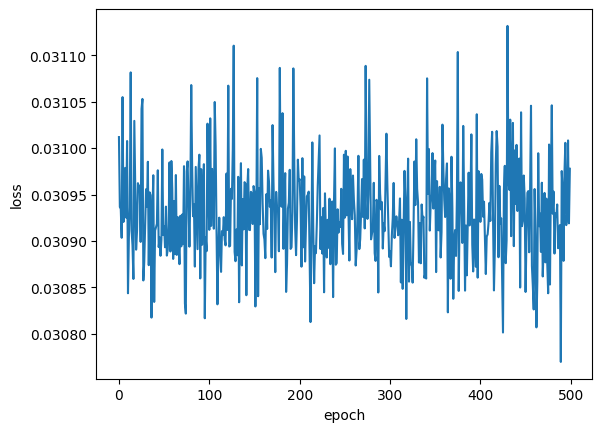

In [402]:
### train model

we, mse, avglogpdfs = train_rsm(np.log(1+train_dtm), 
                  units=50, ksteps=1,
                  epochs=500,  btsz = 100, 
                  lr=0.1, momentum=0.1,
                  weightinit=0.001, initw = we)

plot_loss(mse)

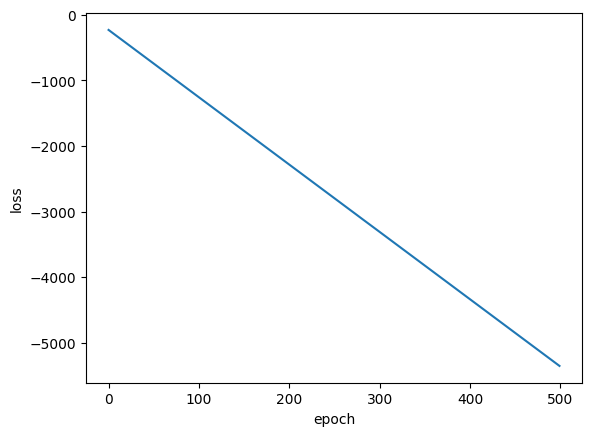

In [403]:
plot_loss(-avglogpdfs)

In [429]:
def rsmppl(w_v,w_h,w_vh,testmatrix):

	testD=testmatrix.sum(axis=1)

	# compute hidden activations
	h = sigmoid(np.dot(testmatrix, w_vh) + np.outer(testD, w_h))

	print(h.shape) #doc - topic

	# compute visible activations
	v = np.dot(h, w_vh.T) + w_v

	print(v.shape)
	# exp and normalize
	tmp = np.exp(v)
	tsum = tmp.sum(axis=1)
	tsum = tsum.reshape(-1,1)
	pdf = tmp / tsum  #result of softmax

	print(pdf.shape)  #doc - word

	#perplexity formula
	z = np.nansum(testmatrix * np.log(pdf))
	s = np.sum(testmatrix)
	ppl = np.exp(- z / s)
	print("PPL calculating..........")

	return ppl

ppl=rsmppl(w_v,w_h,w_vh,np.log(1+train_dtm))
print(ppl)

C:\Users\feder\AppData\Local\Temp\ipykernel_3264\3794938993.py:97: RuntimeWarning: overflow encountered in exp
  return ( 1 / (1 + np.exp(-X)))


(11415, 50)
(11415, 1612)
(11415, 1612)
PPL calculating..........
1197.6094652699094


In [406]:
### rsm pdf function

def rsm_pdf(w_v, w_h, w_vh, docvec):
    Nd = docvec.sum()
    t1 = np.exp(np.dot(docvec, w_v))
    t2 = np.zeros(w_h.shape)
    for j in range(len(w_h)):
        t2[j] = 1 + np.exp(np.dot(docvec, w_vh[:,j]) + Nd*w_h[j])
    t3 = np.prod(t2)
    return t1*t3

def rsm_log_pdf(w_v, w_h, w_vh, docvec):
    Nd = docvec.sum()
    t1 = np.dot(docvec, w_v)
    t2 = np.zeros(w_h.shape)
    for j in range(len(w_h)):
        t2[j] = np.log(1 + np.exp(np.dot(docvec, w_vh[:,j]) + Nd*w_h[j]))
    t3 = np.sum(t2)
    return t1 + t3


def rsm_prob(w_v, w_h, w_vh, docvec, Z):
    return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec) - np.log(Z))


def rsm_pdf0(w_v, w_h, w_vh, docvec):
    #return np.exp(-rsm_log_pdf(w_v, w_h, w_vh, docvec))
    return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec))

In [431]:
### get document densities

w_vh, w_v, w_h = we
doc = np.log(1+train_dtm[0,:])
z = 100
print(doc)
print(rsm_pdf(w_v, w_h, w_vh, doc))
print(rsm_log_pdf(w_v, w_h, w_vh, doc))
print(rsm_pdf0(w_v, w_h, w_vh, doc))

[0.69314718 1.09861229 1.09861229 ... 0.         0.         0.        ]
inf
5648.09139888109
inf


C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1049957352.py:5: RuntimeWarning: overflow encountered in exp
  t1 = np.exp(np.dot(docvec, w_v))
C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1049957352.py:28: RuntimeWarning: overflow encountered in exp
  return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec))


In [408]:
def ppl_rsm(pdfdocs, dtm):
    D = dtm.sum(axis=1)
    #ndocs = dtm.shape[0]

    filtro = np.isfinite(pdfdocs)
    pdfdocs = pdfdocs[filtro]
    D = D[filtro]
    ndocs = len(pdfdocs)

    # print(pdfdocs[0:5])
    # print(ndocs)
    # print(D[0:5])
    avg_log_pdf = np.log(pdfdocs)/ D
    # print(np.exp(avg_log_pdf[0:5]))
    # print(avg_log_pdf[0:5])
    #avg_ce = np.sum(avg_log_pdf) / ndocs
    avg_ce = np.mean(avg_log_pdf)
    # print(np.sum(avg_log_pdf))
    # print(avg_ce)
    ppl = np.exp(-avg_ce)
    print("PPL: ", ppl)
    return ppl

pdfdoc = np.zeros(train_dtm.shape[0])
for i in tqdm(range(len(pdfdoc))):
    doc = train_dtm[i,:]
    pdfdoc[i] = rsm_pdf0(w_v, w_h, w_vh, doc)

ppl = ppl_rsm(pdfdoc, train_dtm)

  0%|          | 0/11415 [00:00<?, ?it/s]C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1049957352.py:28: RuntimeWarning: overflow encountered in exp
  return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec))
100%|██████████| 11415/11415 [00:04<00:00, 2491.81it/s]

PPL:  nan



c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
### rsm ais algorithm

def rsm_ais(w_v, w_h, w_vh, DTM, S=10, niter=None):
    if (niter == None) or (niter > DTM.shape[0]):
        niter = DTM.shape[0]

    D = DTM.sum(axis=1) #doc lengths
    T = len(w_h)     #n of topic
    K = len(w_v)     #vocab length
    Za = 2**T        #uniform partition function (pdf_a is 1)
    #def unif_prob(docvec): return np.ones(K) * 1/Za
    #def unif_pdf(docvec): return np.ones(K)

    def rsm_pdf(docvec):
        return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec))

    #beta values
    invtemp = np.arange(start=0, stop=1+1/S, step=1/S)

    #def temp_pdf(docvec, beta):
    #    return (unif_pdf(docvec)**(1-beta))*(rsm_pdf(docvec)**beta)

    #def log_temp_pdf(docvec, beta):
    #    return (1-beta)*np.log(unif_pdf(docvec)) + beta*np.log(rsm_pdf(docvec))

    #intermediate distribution
    def temp_pdf(docvec, beta):
        return np.exp(beta*np.log(rsm_pdf(docvec)) - (1-beta)*(np.log(Za)))

    w_ais_list = np.empty(niter)
    for it in tqdm(range(niter)):
        
        #init
        Nd = D[it]  #####WRONG!! For rsm, Z is specific for document length
        #v_sampled = np.random.multinomial(Nd, np.ones(K)/K, size=1)[0]
        v_sampled = DTM[it,:]


        #loop
        w_ais = 1
        for s in range(S-1):
            v_sampled = rsm_gibbs_transition(w_v, w_h, w_vh, v_sampled)
            ratio = temp_pdf(v_sampled, invtemp[s+1])/temp_pdf(v_sampled, invtemp[s])
            w_ais = w_ais*ratio

        w_ais_list[it] = w_ais

    avg_ratio = np.nanmean(w_ais_list)

    Zb = avg_ratio * Za

    return Zb, avg_ratio, Za, w_ais_list

def rsm_gibbs_transition(w_v, w_h, w_vh, v):
    D = v.sum()
    H = len(w_h)
    h_dist = sigmoid(D*w_h + np.dot(v, w_vh))
    h_unif = np.random.rand(H)  #sample values from U(0,1)
    h_sampled = np.array(h_unif < h_dist, dtype=int)
    #predict visible given hidden
    v_dist = np.exp(np.dot(h_sampled, w_vh.T) + w_v)
    #get softmax conditional probabilities of visible units
    v_cprob = v_dist/v_dist.sum()
    #sample values from multinomial distribution given the document length
    v_sampled = np.random.multinomial(D, v_cprob, size=1)[0]
    return v_sampled

In [410]:
print(Zb*Za)
print(np.log(Zb))
print(np.log(Zb*Za))
print(np.log(Zb)*Za)
print(Zb*np.log(Za))

inf
inf
inf
inf
inf


In [ ]:
### estimating the constant partition function Z
w_vh, w_v, w_h = we
Zb, avg_ratio, Za, w_ais_list = rsm_ais(w_v, w_h, w_vh, 
    DTM = np.log(1+train_dtm[np.random.randint(low=0, 
                                    high=train_dtm.shape[0], 
                                    size=200),:]), 
                                    S=50,
                                    niter=None)
print(avg_ratio)
print(Zb)

  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1570764332.py:15: RuntimeWarning: overflow encountered in exp
  return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec))
C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1570764332.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  return np.exp(beta*np.log(rsm_pdf(docvec)) - (1-beta)*(np.log(Za)))
C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1570764332.py:43: RuntimeWarning: invalid value encountered in scalar divide
  ratio = temp_pdf(v_sampled, invtemp[s+1])/temp_pdf(v_sampled, invtemp[s])
  0%|          | 1/200 [00:00<00:24,  8.20it/s]C:\Users\feder\AppData\Local\Temp\ipykernel_3264\3794938993.py:97: RuntimeWarning: overflow encountered in exp
  return ( 1 / (1 + np.exp(-X)))
100%|██████████| 200/200 [00:17<00:00, 11.56it/s]

2.2248567872930036e+275
2.5049660495513724e+290


In [434]:
###perplexity
w_vh, w_v, w_h = we
ntests = 10000
probdoc = np.zeros(ntests)
random_dtm = np.log(1+train_dtm[
    np.random.randint(low=0, high=train_dtm.shape[0], size=ntests),:])

for i in tqdm(range(len(probdoc))):
    doc = random_dtm[i,:]
    probdoc[i] = rsm_prob(w_v, w_h, w_vh, doc, Zb)

ppl = ppl_rsm(probdoc, random_dtm)


  0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\feder\AppData\Local\Temp\ipykernel_3264\1049957352.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(rsm_log_pdf(w_v, w_h, w_vh, docvec) - np.log(Z))
100%|██████████| 10000/10000 [00:04<00:00, 2469.74it/s]


PPL:  1.2169094502854016e-26


In [427]:
print(ppl)
print(np.log(ppl))
print(np.log(np.log(ppl)))

1.1439690751110934e-28
-64.3378787434866
nan


C:\Users\feder\AppData\Local\Temp\ipykernel_3264\2543337584.py:3: RuntimeWarning: invalid value encountered in log
  print(np.log(np.log(ppl)))


In [454]:
##deepseek ppl upper bound

def replicated_softmax_perplexity_bound(documents, W, b, a):
    """
    Calcola l'upper bound della perplexity per il modello Replicated Softmax (RSM).
    
    Parametri:
    - documents: Lista di documenti, ogni documento è un array numpy di forma (V,) con conteggi parole.
    - W: Matrice dei pesi di forma (V, H).
    - a: Vettore dei bias visibili di forma (V,).
    - b: Vettore dei bias nascosti di forma (H,).
    
    Restituisce:
    - perplexity_bound: Upper bound della perplexity.
    """
    V, H = W.shape
    total_numerator = 0.0
    total_words = 0
    
    for v_m in documents:
        N_m = np.sum(v_m)
        total_words += N_m
        
        # === Fase Positiva (dati reali) ===
        # Calcola mu_h = p(h|v_m) = sigmoid(b + W^T v_m)
        hidden_input_pos = b + np.dot(W.T, v_m)
        mu_h = 1.0 / (1.0 + np.exp(-hidden_input_pos))
        
        # Termine 1: E_{p_data}[ -E(v_m, h) ] (senza Z)
        term1 = np.dot(v_m, np.dot(W, mu_h)) + np.dot(a, v_m) + np.dot(b, mu_h)
        
        # === Fase Negativa (CD-1) ===
        # Campiona h0 ~ Bernoulli(mu_h)
        h0 = (np.random.rand(H) < mu_h).astype(np.float32)
        
        # Calcola probabilità visibili: p(v|h0) = softmax(a + W h0)
        visible_logits = a + np.dot(W, h0)
        # Stabilità numerica
        max_logit = np.max(visible_logits)
        exp_logits = np.exp(visible_logits - max_logit)
        probs = exp_logits / np.sum(exp_logits)
        
        # Campiona v1 ~ Multinomial(N_m, probs)
        v1 = np.random.multinomial(N_m, probs)
        
        # Calcola mu_h1 = p(h|v1) = sigmoid(b + W^T v1)
        hidden_input_neg = b + np.dot(W.T, v1)
        mu_h1 = 1.0 / (1.0 + np.exp(-hidden_input_neg))
        
        # Termine 2: E_{p_T}[ -E(v1, h) ] (senza Z)
        term2 = np.dot(v1, np.dot(W, mu_h1)) + np.dot(a, v1) + np.dot(b, mu_h1)
        
        # Aggiorna il numeratore totale
        total_numerator += term1 - term2
    
    # Calcola l'upper bound della perplexity
    perplexity_bound = np.exp(-total_numerator / total_words)
    return perplexity_bound


ppl_upbo_ds = replicated_softmax_perplexity_bound(np.log(1+train_dtm),
                                    w_vh, w_h, w_v )

print(ppl_upbo_ds)

C:\Users\feder\AppData\Local\Temp\ipykernel_3264\2426717423.py:27: RuntimeWarning: overflow encountered in exp
  mu_h = 1.0 / (1.0 + np.exp(-hidden_input_pos))
C:\Users\feder\AppData\Local\Temp\ipykernel_3264\2426717423.py:48: RuntimeWarning: overflow encountered in exp
  mu_h1 = 1.0 / (1.0 + np.exp(-hidden_input_neg))


3.215300333733519e+20


In [453]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_elbo(doc, W, b, a):
    """
    Compute ELBO for a single document using mean-field approximation.
    
    Args:
        doc: np.array of shape (V,) – word counts for a document
        W: np.array of shape (V, H) – weights
        a: np.array of shape (V,) – visible biases
        b: np.array of shape (H,) – hidden biases
        
    Returns:
        elbo: scalar ELBO value
    """
    # Compute mu_j = sigmoid(v^T W + b)
    hidden_input = doc @ W + b   # shape (H,)
    mu = sigmoid(hidden_input)   # shape (H,)
    
    # Expected log joint: E_q[log p(v, h)]
    eq_log_joint = mu @ hidden_input + doc @ a  # scalar

    # Entropy of q(h)
    entropy = -np.sum(mu * np.log(mu + 1e-10) + (1 - mu) * np.log(1 - mu + 1e-10))  # scalar
    
    return eq_log_joint + entropy

def compute_perplexity_upper_bound(doc_term_matrix, W, a, b):
    """
    Compute the upper bound on perplexity for the RSM model.
    
    Args:
        doc_term_matrix: np.array of shape (M, V) – document-term matrix
        W: np.array of shape (V, H)
        a: np.array of shape (V,)
        b: np.array of shape (H,)
        
    Returns:
        perplexity_upper_bound: scalar
    """
    total_words = 0
    elbo_sum = 0.0

    for doc in doc_term_matrix:
        doc_len = np.sum(doc)
        if doc_len == 0:
            continue  # skip empty docs
        elbo = compute_elbo(doc, W, a, b)
        elbo_sum += elbo
        total_words += doc_len

    # Compute perplexity upper bound
    perplexity = np.exp(-elbo_sum / total_words)
    return perplexity


ppl_upbo_gpt = compute_perplexity_upper_bound(np.log(1+train_dtm),
                                               w_vh, w_h, w_v)

print(ppl_upbo_gpt)

C:\Users\feder\AppData\Local\Temp\ipykernel_3264\193277701.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


1.1705032294064991e-92


In [436]:
### get document densities for all documents in train set
pdfdoc = np.zeros(train_dtm.shape[0])
for i in tqdm(range(len(pdfdoc))):
    doc = train_dtm[i,:]
    pdfdoc[i] = rsm_log_pdf(w_v, w_h, w_vh, doc)

100%|██████████| 11415/11415 [00:04<00:00, 2602.01it/s]


5.0
(11415,)
[0.17237126 0.2906517  0.2472828  0.06495347 0.34152999 0.11246363
 0.70165475 0.08819895 0.30900985 0.30898028]


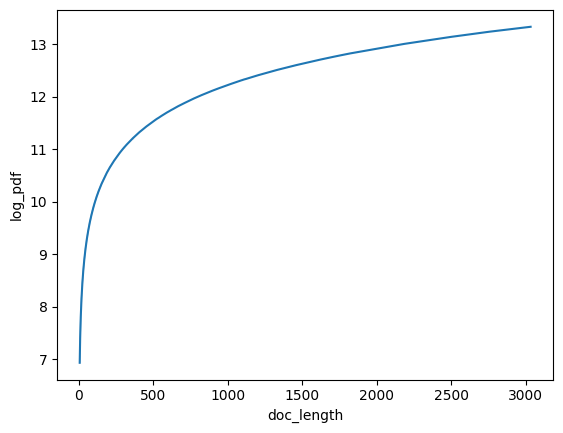

In [437]:
dl = train_dtm.sum(axis=1)
print(dl.min())
toi = np.log(pdfdoc)/ dl
sns.lineplot(data=pd.DataFrame({'log_pdf': np.log(pdfdoc),
                                'doc_length' : dl}), 
                                y='log_pdf', x = 'doc_length')
print(toi.shape)
print(toi[:10])

(11415,)
[            inf 1.83522887e+289             inf             inf
 9.11399346e+238             inf 5.51753738e+106             inf
 7.74977216e+276 7.58940101e+268]
inf
                pdf        doc
count  1.130000e+02  113.00000
mean   2.113719e+47   56.00000
std    1.950052e+47   32.76431
min    1.867685e+45    0.00000
25%    5.634733e+46   28.00000
50%    1.510813e+47   56.00000
75%    3.452306e+47   84.00000
max    7.390558e+47  112.00000


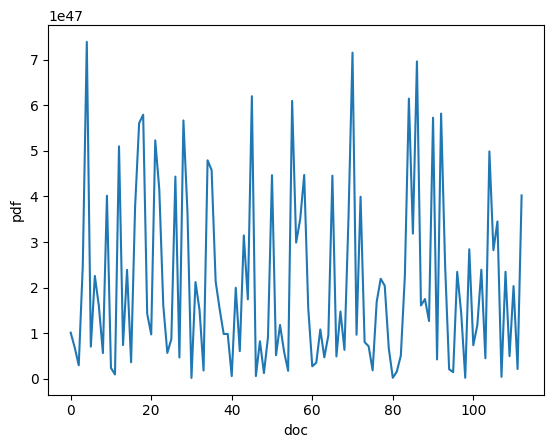

In [199]:

pdfdoc0 = pdfdoc.copy()[pdfdoc < np.percentile(pdfdoc, 0.99)]
df = pd.DataFrame({'pdf': pdfdoc0 ,
                'doc' : [i for i in range(len(pdfdoc0))]})

sns.lineplot(data=df, y='pdf', x = 'doc')
print(pdfdoc.shape)
print(pdfdoc[0:10])
print(np.sum(pdfdoc))

print(df.describe())


In [200]:
print(Za)
print(Zb)
print(avg_ratio)
print(w_ais_list)

1125899906842624
2.0845780770063463e+287
2.0845780770063463e+287
[1.65858652e+106 2.97556199e+153             nan 7.54648225e+058
 1.52688607e+087 2.01017604e+163 7.06137040e+211             nan
 1.03293227e+087             nan             nan 2.04335506e+192
 1.17598557e+087 6.76769850e+269 1.58179142e+163 1.61982253e+087
 1.61563494e+202             nan 1.98565072e+096 3.50708404e+115
 3.80543861e+077 3.81945440e+096 5.55719097e+220 1.56001383e+068
 1.55117451e+125 2.28940312e+049             nan 1.40028519e+040
             nan             nan             nan 1.42673514e+289
 1.66160258e+040             nan 3.81500784e+096 6.59229675e+134
 1.34321046e+106 3.28092874e+240 7.94932232e+086 1.14919132e+040
             nan 5.72399610e+058             nan 3.08108490e+220
             nan 1.12757158e+240 1.28857140e+068 7.97236332e+124
 8.06818473e+191 2.84830616e+049             nan 5.36887901e+058
 1.59198932e+068 4.25025427e+269 1.23507087e+040 6.48259537e+058
             nan 1.485491

In [202]:
print(np.nanmean(w_ais_list))
print(np.nanmean(w_ais_list)*Za)

2.0845780770063463e+287
2.3470262627076215e+302


In [261]:
vec = train_dtm[0,:]
print(vec)
print(rsm_gibbs_transition(w_v, w_h, w_vh, vec))

[1. 2. 2. ... 0. 0. 0.]
[0 1 0 ... 0 0 0]


In [268]:
print(np.fromiter(vocab.keys(), dtype='<U32')[vec>0][0:10])

sampled = rsm_gibbs_transition(w_v, w_h, w_vh, vec)

print(np.fromiter(vocab.keys(), dtype='<U32')[sampled>0][0:10])

['accept' 'action' 'call' 'child' 'complex' 'create' 'cut' 'development'
 'evil' 'extremely']
['development' 'important' 'large' 'work' 'find' 'make' 'time' 'define'
 'defend' 'government']


In [ ]:
inc = 1/11
print(np.arange(start=0,stop= 1 + inc,step=inc))


[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091]


# nuovo 2

## useful functions

In [72]:
## funzioni utili

def TrainTestSplit(data, train_prop, return_ids = False, return_mask=False, print_shapes=False):
    """
    data: numpy ndarray with the datapoints on the axis 0
    train_prop: float in (0,1), ratio of the data that will go in the training
    return_ids: boolean, if the interger indexes of training should be returned
    return_mask: boolean, if the boolean mask of the training should be returned
    
    returns tuple:
    - train array
    - test array
    - train_id if return_ids=True
    - train_mask if return_mask=True
    """
    N = data.shape[0]
    rows_id = np.arange(N)
    train_id = np.random.choice(rows_id, size=int(N*train_prop), replace=False)
    train_mask = np.isin(rows_id, train_id)
    train = data[train_mask]
    test = data[~train_mask]
    output = (train, test)
    if (print_shapes):
        print('train shape: '+str(train.shape))
        print('test shape: '+str(test.shape))

    if (return_ids):
        output + (train_id,)
    if (return_mask):
        output + (train_mask,)
    return output


def unlist(LIST):
    return [item for sublist in LIST for item in sublist]

def softmax_vec(array):
    exparr = np.exp(array)
    return exparr/exparr.sum()

def softmax_mat(array):
    exparr = np.exp(array)
    return exparr/exparr.sum(axis=1)

def sigmoid(x):
    return (1/(1+np.exp(-x)))


def summary(vec):
    return {
        'dim' : vec.shape,
        'mean' : np.round(np.mean(vec), 2),
        'stdev' : np.round(np.sqrt(np.var(vec)), 2),
        'min' : np.round(np.min(vec), 2),
        'q25%' : np.round(np.quantile(vec, 0.25),2),
        'median': np.round(np.median(vec), 2),
        'q75%' : np.round(np.quantile(vec, 0.75),2),
        'max' : np.round(np.max(vec), 2)
    }


def hist(vec, xlab='x'):
    df = pd.DataFrame({xlab:vec})
    pl = sns.histplot(data=df, x=xlab)
    return pl

def scatter(x, y, xlab='x', ylab='y'):
    df = pd.DataFrame({xlab:x, ylab:y})
    pl = sns.scatterplot(data=df, x=xlab, y=ylab)
    return pl

def regscatter(x, y, xlab='x', ylab='y', 
               order=1, lowess=False, 
               ci=None, color=None):
    df = pd.DataFrame({xlab:x, ylab:y})
    pl = sns.regplot(data=df, x=xlab, y=ylab, scatter=True, 
                     fit_reg=True, color = color,
                     order=order, lowess=lowess, ci=ci)
    return pl





def plotline(y,x=None, xlab='x', ylab='y', title=''):
    """
    y: value of the series, represented by a line
    x: index order of value 
    example usage
    plotline(y=np.random.rand(45), x=np.random.rand(45), ylab='rand1', xlab='rand2')
    """

    if (x is None):
        x = np.arange(len(y))
    df = pd.DataFrame({xlab:x, ylab:y})
    pl = sns.lineplot(data=df, y=ylab, x=xlab)
    pl.set_title(title)
    return  pl


def multilineplot(df, colnames=None, xlab='index', ylab='series', title=''):
    if colnames is not None:
        df = df[colnames]
    df[xlab] = np.arange(df.shape[0])
    df0 = pd.melt(df, [xlab])
    pl = sns.lineplot(data=df0, x=xlab, y='value', hue='variable', 
                        markers=True, style='variable')
    pl.set_title(title)
    pl.set_xlabel(xlab)
    pl.set_ylabel(ylab)
    return  pl



class linreg(object):

    def train(self, x, y, intercept=True, w=None):
        self.intercept = intercept
        if intercept:
            # Add intercept column if not present
            if x.ndim == 1:
                x = x.reshape(-1, 1)
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        
        self.onevar = (len(x.shape)==1)

        n = y.shape[0]

        if self.onevar:
            p = 1
            self.coefs = np.sum(y)/np.sum(x)
            self.fitted = x * self.coefs
            self.gram = 1 / np.dot(x,x)
        else:
            p = x.shape[1]
            Q, R = np.linalg.qr(x)
            Rinv = np.linalg.inv(R)
            self.coefs = Rinv @ Q.T @ y
            self.fitted = x @ self.coefs
            self.H = Q @ Q.T
            self.gram = Rinv @ Rinv.T

        self.df = n - p
        self.residuals = y - self.fitted
        self.mse = np.mean(self.residuals**2)
        self.mae = np.mean(np.abs(self.residuals))
        self.TSS = np.sum((y-np.mean(y))**2)
        self.RSS = np.sum(self.residuals**2) #(self.residuals @ self.residuals)
        self.R2 = 1 - self.RSS/self.TSS
        self.variance =  self.RSS / self.df
        self.s = np.sqrt(self.variance)

        if self.onevar:
            self.stderrors = np.sqrt(self.gram*self.variance)
        else:
            self.stderrors =  np.sqrt(np.diag(self.gram) * self.variance)
            
        self.tstats = self.coefs / self.stderrors
        self.pvalues = 1 - sc.stats.t.cdf(np.abs(self.tstats), df=self.df)



    def predict(self, x):
        if self.intercept:
            if x.ndim == 1:
                x = x.reshape(-1, 1)
            x = np.hstack((np.ones((x.shape[0], 1)), x))

        if self.onevar:
            return x * self.coefs
        else:
            return x @ self.coefs


    def summary(self):

        self.perf = {
            'R2' : self.R2,
            'mse': self.mse,
            'mae': self.mae,
            's' : self.s}

        if not self.onevar:
            self.coeftable = pd.DataFrame({
                'coef': self.coefs,
                'stderror' : self.stderrors,
                'tstat' : self.tstats,
                'pv': self.pvalues
            })
        else:
            self.coeftable = {
                'coef': self.coefs,
                'stderror' : self.stderrors,
                'tstat' : self.tstats,
                'pv': self.pvalues
            }
    

        return self.perf, self.coeftable



class wlinreg(object):

    def train(self, x, y, intercept=True, w=None):
        self.intercept = intercept
        if intercept:
            if x.ndim == 1:
                x = x.reshape(-1, 1)
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        
        self.onevar = (len(x.shape) == 1)
        n = y.shape[0]

        # --- Weighted transformation ---
        if w is not None:
            w = np.asarray(w)
            if w.ndim != 1 or w.shape[0] != n:
                raise ValueError("Weights w must be a 1D array of length n")
            W_sqrt = np.sqrt(w)
            x = x * W_sqrt[:, None]
            y = y * W_sqrt

        if self.onevar:
            p = 1
            self.coefs = np.sum(y) / np.sum(x)
            self.fitted = x * self.coefs
            self.gram = 1 / np.dot(x, x)
        else:
            p = x.shape[1]
            Q, R = np.linalg.qr(x)
            Rinv = np.linalg.inv(R)
            self.coefs = Rinv @ Q.T @ y
            self.fitted = (np.hstack((np.ones((n, 1)), x[:, 1:])) 
                           if intercept else x) @ self.coefs
            self.H = Q @ Q.T
            self.gram = Rinv @ Rinv.T

        self.df = n - p
        self.residuals = y / (np.sqrt(w) if w is not None else 1) - self.fitted  # back to original scale if weighted
        self.mse = np.mean(self.residuals ** 2)
        self.mae = np.mean(np.abs(self.residuals))
        self.TSS = np.sum((y / (np.sqrt(w) if w is not None else 1) - np.mean(y / (np.sqrt(w) if w is not None else 1))) ** 2)
        self.RSS = np.sum(self.residuals ** 2)
        self.R2 = 1 - self.RSS / self.TSS
        self.variance = self.RSS / self.df
        self.s = np.sqrt(self.variance)

        if self.onevar:
            self.stderrors = np.sqrt(self.gram * self.variance)
        else:
            self.stderrors = np.sqrt(np.diag(self.gram) * self.variance)
            
        self.tstats = self.coefs / self.stderrors
        self.pvalues = 1 - sc.stats.t.cdf(np.abs(self.tstats), df=self.df)


    def predict(self, x):
        if self.intercept:
            if x.ndim == 1:
                x = x.reshape(-1, 1)
            x = np.hstack((np.ones((x.shape[0], 1)), x))

        if self.onevar:
            return x * self.coefs
        else:
            return x @ self.coefs


    def summary(self):

        self.perf = {
            'R2' : self.R2,
            'mse': self.mse,
            'mae': self.mae,
            's' : self.s}

        if not self.onevar:
            self.coeftable = pd.DataFrame({
                'coef': self.coefs,
                'stderror' : self.stderrors,
                'tstat' : self.tstats,
                'pv': self.pvalues
            })
        else:
            self.coeftable = {
                'coef': self.coefs,
                'stderror' : self.stderrors,
                'tstat' : self.tstats,
                'pv': self.pvalues
            }
    

        return self.perf, self.coeftable



In [3]:
### import all libraries

import pandas as pd
import numpy as np
import scipy as sc
import gensim.corpora as corpora
from tqdm import tqdm
import time
import os
import warnings
from octis.preprocessing.preprocessing import Preprocessing
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## competizione sul preprocessing

Confronto octis, sickit learn CountVectorizer, il mio codice, e ciascuno di questi con np.log(1+dtm) di Hinton.

In [4]:
### data path
root_dir =  os.getcwd()
root_dir = root_dir.replace('\\', '/')
data_path = root_dir + '/preprocessed_datasets'
raw_txt_path = data_path + '/20NewsGroup/corpus.txt'
raw_labels_path = data_path + '/20NewsGroup/labels.txt'

In [5]:
## octis+mine+Hinton preprocessing

p = Preprocessing(vocabulary=None, max_features=None, remove_punctuation=True,
                    lemmatize=False,  stopword_list='english', split=True,
                    min_chars=2, min_words_docs=1,
                    max_df=1.0, min_df=0.0, language='english',
                    remove_stopwords_spacy = True,
                    verbose=True)

dataset = p.preprocess_dataset(
    documents_path = raw_txt_path,   #each row of the txt file is seen as a single document
    labels_path = raw_labels_path
)

train, test = dataset.get_partitioned_corpus(use_validation=False)


def build_dtm(tokenized_corpus, gensim_corpora = None):
    if (gensim_corpora == None):
        id2word = corpora.Dictionary(tokenized_corpus)
    else:
        id2word = gensim_corpora
    id_corpus = [id2word.doc2bow(document) for document in tokenized_corpus]
    vocab = id2word.token2id
    N = len(id_corpus)
    DTM = np.zeros((N, len(vocab)))
    for i in tqdm(range(N)):
        doc = id_corpus[i]
        for id, count in doc:
            DTM[i,id] = count

    return DTM, vocab, gensim_corpora


train_dtm, train_vocab, gc  = build_dtm(train)
test_dtm, test_vocab, gc = build_dtm(test, gc)

train_dtm_logoct = np.log(1+train_dtm)
test_dtm_logoct = np.log(1+test_dtm)

print(train_dtm_logoct.shape)
print(test_dtm_logoct.shape)


100%|██████████| 16309/16309 [00:00<00:00, 50035.19it/s]


created vocabulary with 1612 words


100%|██████████| 2447/2447 [00:00<00:00, 50990.97it/s]


(11415, 1612)
(2447, 1612)


In [5]:
## Ferraccioli preprocessing

import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import string


papers =[line.strip() for line in open(raw_txt_path, 'r').readlines()]

# Creazione della lista di stopwords
en_stop = list(stopwords.words('english'))
letters = list(string.ascii_lowercase)
numbers = list(map(str, range(0, 2020)))
# Stopwords aggiuntive
strangechar = ['xi', 'x1', 'tr', 'exp', 'gp', 'ep', 'p0', 'eq', 's0', 'xt', 
'xn', 'lp', 'xk', 'k2', 'log', 'use', 'yi', '00', '000', 'z1', 'abs', 'et'
, 'al']
en_stop = list(set(en_stop + letters + numbers + strangechar))
# Conteggio delle parole
countvec = CountVectorizer(encoding='utf-8', lowercase=True, stop_words =
en_stop, min_df = 20)

# Creazione della Document Term Matrix
tf = countvec.fit_transform(papers)

## rimuovi documenti con lunghezza molto bassa

print(tf.shape)

tf = tf.toarray()
doc_lengths = tf.sum(axis=1)

tf = tf[doc_lengths>3,:]

print(tf.shape)

# train - test split

# rows_id = np.arange(tf.shape[0])
# train_id = np.random.choice(rows_id, replace=False,
#             size = int(np.round(0.9*tf.shape[0])))
# train_mask = np.isin(rows_id, train_id)
# train_dtm_ferra = tf[train_mask]
# print(train_dtm_ferra.shape)
# test_dtm_ferra = tf[~train_mask]
# print(test_dtm_ferra.shape)

train_dtm_ferra, test_dtm_ferra = TrainTestSplit(tf, 0.9, print_shapes=True)


(16309, 1603)
(16309, 1603)
train shape: (14678, 1603)
test shape: (1631, 1603)


In [102]:
##### Wang preprocessing

'''
	@author: Wen Tang(wtang6@ncsu.edu)
	@date: July 13
'''
import os
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from gensim import corpora


def data_perprocess(text_list):
	
	'''
		remove the stopwords and punctuations, and then get the stemmed tokens
	'''

	#set stopwords and punctuations
	english_stopwords=stopwords.words('english')
	english_punctuations=[',','.',':',';','?','(',')','[',']','&','!','*','@','#','$','%',\
						'<','>','`','``',"''",'--','|']

	print("---------------Start Reading Data and Perprocessing It---------------")

	text=[]
	
    #read texts 

	#clear all parameters
	data=[];data_tokenized=[];data_fliter_stopwords=[];data_flitered=[];data_stemmed=[];

			#read from the documents
	data=text_list
			

	print('tokenized the lower words')
	data_tokenized=[[word.lower() for word in word_tokenize(document)] \
					for document in tqdm(data)]

	print('remove stopwords from the text')
	data_fliter_stopwords=[[word for word in document if not word in english_stopwords]\
								for document in tqdm(data_tokenized)]

	print('remove punctuations from the text')
	data_flitered=[[word for word in document if not word in english_punctuations]\
						for document in tqdm(data_fliter_stopwords)]

	print('stemming the text')
	st=LancasterStemmer()
	data_stemmed=[[st.stem(word) for word in document] for document in tqdm(data_flitered)]

	text = data_stemmed

	print("++++++++++++++++Finished Perprocessing++++++++++++++++++++")
	return text


def frequent_part(text, top_k):

	'''
			pick out the most k-th frequent tokens from oranginal data
	'''
	print("---------------Start Choosing The Most K Frequent Tokens ---------------")
	#find unique words in text
	all_words = unlist(text) #sum(text) #sum(text,[])
	#count for the frequency of each token
	u_words=list(set(all_words))
	all_tokens_frequency=[all_words.count(word) for word in u_words]
	all_tokens_frequency=np.array(all_tokens_frequency)
	#sort the frequency of token and pick out the most k-th frequent word
	#k is set by users
	index=np.argsort(all_tokens_frequency)[all_tokens_frequency.shape[0]-top_k:]
	#frequency=all_tokens_f_sort[all_tokens_frequency.shape[0]+1-top_k]
	#index=np.where(all_tokens_frequency>=frequency)
	tokens_high=[u_words[i] for i in index]
	#tokens_high=set(token for token in set(all_words) if all_words.count(token)>=frequency)
	text_high=[[token for token in textword if token in tokens_high]\
						 for textword in text]

	print("++++++++++++++++Got the most K Frequent Tokens++++++++++++++++++++")
	return text_high


def dictionary_count(text_high):

	'''
		count the unique tokens in dictionary
		calculate the word-document matrix, according to the dictionary
	'''
	print("---------------Start Counting for the Dictionary ---------------")
	#count for the dictionary of the text
	dictionary=corpora.Dictionary(text_high)
	#get the id from the dictionary
	token_id=dictionary.token2id
	print("++++++++++++++++Got Dictionary++++++++++++++++++++")
	return dictionary,token_id

def prepro_corpus (dictionary,text):

	#transform the dictionary to bag of words
	corpus=[dictionary.doc2bow(textword) for textword in text]

	print("++++++++++++++++Calculated Bag of Words++++++++++++++++++++")

	return corpus


def word_document(corpus,token_id):

	'''
		calculate the document-word matrix, according to the dictionary
	'''
	#create the sparse matrix of word-document
	datamatrix=np.zeros((len(corpus),len(token_id)))
	for i in range(len(corpus)):
		for obj in corpus[i]:
			datamatrix[i][obj[0]]=obj[1]

	print("++++++++++++++++Document-Word Matrix Made++++++++++++++++++++")
	return datamatrix

def target_value(path):

	target=[]
	i=1
	#read files from disks
	for filelist in os.listdir(path):
		for filename in os.listdir(path+'/'+filelist):
			target.append(i)
		i=i+1
	return np.array(target)


def tfidf(data):

	N=np.repeat(data.sum(axis=1).reshape(-1,1),data.shape[1],axis=1)
	tf=data/N
	idf_v=[]
	for i in range(data.shape[1]):
		c=np.count_nonzero(data.T[i])
		if (c==data.shape[0]):
			idf_v.append(0.0)
		else:
			idf_v.append(np.log(data.shape[0]/(1+c)))

	idf=np.repeat(np.array(idf_v).reshape(1,-1),data.shape[0],axis=0)
	print("++++++++++++++++TF-IDF Transformed++++++++++++++++++++")
	return tf*idf



texts = [line for line in open(raw_txt_path, 'r').readlines()]

text = data_perprocess(texts)


#top_k is the first k highest frequency tokens which would be chosen as the word vectors
top_k = 2000
#get the frequent part of the data
text_high = frequent_part(text, top_k)

#get the document-word frequency matrix
dictionary, token_id = dictionary_count(text_high)

mycorpus = prepro_corpus(dictionary, text)

train = word_document(mycorpus,token_id)

train_dtm_wang, test_dtm_wang = TrainTestSplit(train, 0.9, print_shapes=True)

---------------Start Reading Data and Perprocessing It---------------
tokenized the lower words


100%|██████████| 16309/16309 [00:06<00:00, 2598.36it/s]


remove stopwords from the text


100%|██████████| 16309/16309 [00:02<00:00, 5495.00it/s]


remove punctuations from the text


100%|██████████| 16309/16309 [00:00<00:00, 30655.37it/s]


stemming the text


100%|██████████| 16309/16309 [00:20<00:00, 791.39it/s] 


++++++++++++++++Finished Perprocessing++++++++++++++++++++
---------------Start Choosing The Most K Frequent Tokens ---------------
++++++++++++++++Got the most K Frequent Tokens++++++++++++++++++++
---------------Start Counting for the Dictionary ---------------
++++++++++++++++Got Dictionary++++++++++++++++++++
++++++++++++++++Calculated Bag of Words++++++++++++++++++++
++++++++++++++++Document-Word Matrix Made++++++++++++++++++++
train shape: (14678, 694)
test shape: (1631, 694)


## competizione sul training

Include la stima delle probabilità condizionate dei topic dati i documenti, di una parola dato un topic, della pdf di un documento, della probabilità di un documento e della perplexity (media per document o media per word).

In [8]:
### Wang training

"""
@author:  Joerg Landthaler
@credits: Christian Osendorfer
@modify:  Daichi Mochihashi
@origin:  Nov, 2011
@date:    Jun, 2013
@organization: TUM, I6, Machine Learning Group
@summary: Implementation of the Replicated Softmax model,
          as presented by R. Salakhutdinov & G.E. Hinton
          in http://www.mit.edu/~rsalakhu/papers/repsoft.pdf
@version: 1.0
@$Id: rsm_numpy.py,v 1.7 2013/06/28 10:48:44 daichi Exp $
@
"""
import scipy as sp
import numpy as np

class WangRSM(object):
    def train(self, data, units, epochs=1000, iter=1, lr=0.001, weightinit=0.001, 
            momentum=0.9, btsz=1):
        """
        CD-n training of RSM.
        @param data: a (rowwise) sample matrix. Number of samples should be divisible by btsz.
        @param units: #latent topics
        @param epochs: #training epochs
        @param lr: learning rate
        @param weightinit: scaling of random weight initialization
        @param momentum: momentum rate
        @param btsz: batchsize   
        """
        print("---------------Start Training RSM---------------")
        dictsize = data.shape[1]
        # initilize weights
        w_vh = weightinit * np.random.randn(dictsize, units)
        w_v = weightinit * np.random.randn(dictsize)
        w_h = np.zeros((units))
        # weight updates
        wu_vh = np.zeros((dictsize, units))
        wu_v = np.zeros((dictsize))
        wu_h = np.zeros((units))
        delta = lr#/btsz
        batches = int(data.shape[0]/btsz)
        print("updates per epoch: %s | total updates: %s" % (batches, batches*epochs))
        words = np.sum(data)
        for epoch in tqdm(range(epochs)):
            try:
                lik = 0
                # visit data randomly
                np.random.shuffle(data)
                # gradually increase iter
                for b in range(batches):
                    start = b * btsz 
                    v1 = data[start : start+btsz]
                    # hidden biases scaling factor
                    D = v1.sum(axis=1)
                    # project into hidden
                    h1 = sigmoid(np.dot(v1, w_vh) + np.outer(D, w_h))
                    v2 = v1; h2 = h1
                    for i in range(iter):
                        (v2,h2,z) = cdn(v2,h2,w_vh,w_v,w_h,D)
                        if i == 0:
                            lik += z
                    # compute updates
                    wu_vh = wu_vh * momentum + np.dot(v1.T, h1) - np.dot(v2.T, h2)
                    wu_v = wu_v * momentum + v1.sum(axis=0) - v2.sum(axis=0)
                    wu_h = wu_h * momentum + h1.sum(axis=0) - h2.sum(axis=0)
                    # update 
                    w_vh += wu_vh * delta 
                    w_v += wu_v * delta
                    w_h += wu_h * delta
            except:
                pass
            ppl = np.exp (- lik / words)

        print("+++++++++++++RSM Training Finished+++++++++++++++++")
        return { "w_vh" : w_vh, 
                 "w_v"  : w_v, 
                 "w_h"  : w_h,
                 "ppl"    : ppl,
                 'lik' : lik
               }

def cdn (v1,h1,w_vh,w_v,w_h,D):
    """
    one-step contrastive divergence: (v1,h1)->(v2,h2).
    """
    lik = 0
    btsz = v1.shape[0]
    # project into visible
    v2 = np.dot(h1, w_vh.T) + w_v
    tmp = np.exp(v2)
    sum = tmp.sum(axis=1)
    sum = sum.reshape((btsz,1))
    v2pdf = tmp / sum
    # perplexity
    lik += np.nansum(v1 * np.log(v2pdf))
    # sample from multinomial
    v2 *= 0
    for i in range(btsz):
        v2[i] = np.random.multinomial(D[i],v2pdf[i],size=1)
    # project into hidden
    h2 = sigmoid(np.dot(v2, w_vh) + np.outer(D, w_h))
    return (v2,h2,lik)

def sigmoid(x):
    return (1/(1+np.exp(-x)))


def wang_ppl(w_v,w_h,w_vh,testmatrix):

	testD=testmatrix.sum(axis=1)

	# compute hidden activations
	h = sigmoid(np.dot(testmatrix, w_vh) + np.outer(testD, w_h))
	# compute visible activations
	v = np.dot(h, w_vh.T) + w_v
	# exp and normalize.
	tmp = np.exp(v)
	tsum = tmp.sum(axis=1)
	tsum = tsum.reshape(-1,1)
	pdf = tmp / tsum

	z = np.nansum(testmatrix * np.log(pdf))
	s = np.sum(testmatrix)
	ppl = np.exp(- z / s)
	return ppl



In [9]:
import warnings
warnings.filterwarnings("ignore")
Wang_RSM = WangRSM()
output_wang = Wang_RSM.train(train_dtm_logoct,
                                     units=5, epochs=3,
                                     iter=1, lr=0.1,
                                     momentum=0.1, btsz=100)

w_vh, w_v, w_h, ppl, lik = (output_wang['w_vh'],
output_wang['w_v'],output_wang['w_h'], output_wang['ppl'],output_wang['lik'])
print(ppl)
print(wang_ppl(w_v,w_h,w_vh,train_dtm_logoct))
print(wang_ppl(w_v,w_h,w_vh,test_dtm_logoct))

---------------Start Training RSM---------------
updates per epoch: 114 | total updates: 342


100%|██████████| 3/3 [00:08<00:00,  2.72s/it]


+++++++++++++RSM Training Finished+++++++++++++++++
1194.2952254462607
1204.3361080982172
1895.8215801609165


In [6]:
### Ferraccioli training

import scipy as sp
import numpy as np

def train(data, units, epochs = 10, iter = 10, lr = 0.0001, weightinit = 0.1,
    momentum = 0.9, btsz = 10, decay = 0.0001):
    """
    Replicated Softmax con penalizzazione
    @param data: Document Term Matrix
    @param units: Numero di topic
    @param epochs: Numero di iterazioni
    @param lr: Learning Rate
    @param weightinit: Fattore di scala per i pesi iniziali
    @param momentum: Momentum
    @param btsz: Grandezza delle mini-batch
    """
    dictsize = data.shape[1]
    # Inizializzazione casuale dei pesi
    w_vh = weightinit * np.random.randn(dictsize, units)
    w_v = weightinit * np.random.randn(dictsize)
    w_h = np.zeros((units))
    # Inizializzazione degli aggiornamenti dei pesi
    wu_vh = np.zeros((dictsize, units))
    wu_v = np.zeros((dictsize))
    wu_h = np.zeros((units))
    delta = lr#/btsz
    batches = int(data.shape[0]/btsz)
    #print("updates per epoch: %s | total updates: %s" % (batches, batches*epochs))
    words = np.sum(data)
    for epoch in tqdm(range(epochs)):
        lik = 0
        # Permutazione dei dati
        np.random.shuffle(data)
        # Ciclo per le mini-batch
        for b in range(batches):
            start = b * btsz
            v1 = data[start : start+btsz]
            D = v1.sum(axis=1)
            # Strato nascosto
            h1 = sigmoid((np.dot(v1, w_vh) + np.outer(D, w_h)))
            v2 = v1; h2 = h1
            for i in range(iter):
                (v2,h2,z) = cdn(v2,h2,w_vh,w_v,w_h,D)
                if i == 0:
                    lik += z
                # Aggiornamento dei pesi
                penal = ((btsz**2)/float(data.shape[0]))*decay*w_vh.sum()
                wu_vh = wu_vh * momentum + np.dot(v1.T, h1) - np.dot(v2.T, h2) - penal
                wu_v = wu_v * momentum + v1.sum(axis=0) - v2.sum(axis=0)
                wu_h = wu_h * momentum + h1.sum(axis=0) - h2.sum(axis=0)
                w_vh += wu_vh * delta
                w_v += wu_v * delta
                w_h += wu_h * delta
    # Lower bound della perplexity
    ppl = np.exp (- lik / words)

    return {"w_vh" : w_vh,
            "w_v" : w_v,
            "w_h" : w_h,
            "rate" : lr,
            "iter" : iter,
            "batch" : btsz,
            "epoch" : epochs,
            "init" : weightinit,
            "moment" : momentum,
            "ppl" : ppl,
            'lik' : lik}


def cdn (v1,h1,w_vh,w_v,w_h,D): #D è il vettore delle numerosità dei documenti nel batch
    """
    Algoritmo Contrastive Divergence
    """
    lik = 0
    btsz = v1.shape[0] #numero di documenti nel batch
    # Strato visibile
    v2 = np.dot(h1, w_vh.T) + w_v #v2 è una matrice di dimensioni (btsz, words)
    #print(v2.shape)   #(btsz, words)
    #print(w_v.shape)  #(words,)
    #print(w_vh.shape) #(words, topics)
    ##applicazione per documento della funzione softmax a una matrice (softmax per riga)
    tmp = np.exp(v2)
    sum = tmp.sum(axis=1)
    sum = sum.reshape((btsz,1))
    v2pdf = tmp / sum  ##probabilità da cui campionare (P della multinomiale)
    # log verosimiglianza
    lik += np.nansum(v1 * np.log(v2pdf)) #somma delle log probabilità per parola (nan esclusi)
    # Estrazione dalla multinomiale
    v2 *= 0  #
    for i in range(btsz):
        v2[i] = np.random.multinomial(D[i],v2pdf[i],size=1)
    # Strato nascosto
    h2 = sigmoid(np.dot(v2, w_vh) + np.outer(D, w_h))
    return (v2,h2,lik)


def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [10]:
warnings.filterwarnings("ignore")
output_ferra = train(train_dtm_logoct,
                    units=5, epochs=3, iter=1, 
                    lr=0.1,momentum=0.1, btsz=100, 
                    weightinit=0.001, decay=0.0001)


w_vh, w_v, w_h, ppl, lik = (output_ferra['w_vh'],
output_ferra['w_v'],output_ferra['w_h'], output_ferra['ppl'],output_ferra['lik'])

print(ppl)
print(wang_ppl(w_v,w_h,w_vh,train_dtm_logoct))
print(wang_ppl(w_v,w_h,w_vh,test_dtm_logoct))

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:10<00:00,  3.35s/it]


1191.7353407531837
1202.986373379221
2009.9915439255278


In [ ]:
### my training


class RSM(object):

    def __init__(self):
        self.W = None

    def softmax(self, array):
        exparr = np.exp(array)
        return exparr/exparr.sum()
        # if (len(array.shape)==1):     
        #     return exparr/exparr.sum()
        # else:
        #     return exparr/np.outer(exparr.sum(axis=1), np.ones(exparr.shape[1]))

    def softmax0(self, array):
        exparr = np.exp(array)
        return exparr/np.tile(exparr.sum(axis=1), (exparr.shape[1],1)).T

    def sigmoid(self,x):
        return (1/(1+np.exp(-x)))
    
    def neg_energy(self, v, h):
        w_vh, w_v, w_h = self.W
        D = v.sum()
        en = v @ w_v + D * h @ w_h + v @ w_vh @ h
        return en
        
    def neg_energy0(self, v, h):
        w_vh, w_v, w_h = self.W
        D = v.sum(axis=1)
        t1 = v @ w_v 
        t2 = D * (h @ w_h)
        t3 = (v @ w_vh @ h.T).sum(axis=1)
        en = t1 + t2 + t3
        return en
    
    def neg_free_energy(self, v):  #it's equivalent to the log pdf
        w_vh, w_v, w_h = self.W
        T = self.hidden
        D = v.sum()
        fren = np.dot(v, w_v)
        for j in range(T):
            w_j = w_vh[:,j]
            a_j = w_h[j]
            fren += np.log(1 + np.exp(D*a_j + np.dot(v,w_j)))
        return fren
    
    def neg_free_energy0(self, v):  #it's equivalent to the log pdf
        w_vh, w_v, w_h = self.W
        T = self.hidden
        D = v.sum(axis=1)
        fren = np.dot(v, w_v)
        for j in range(T):
            w_j = w_vh[:,j]
            a_j = w_h[j]
            fren += np.log(1 + np.exp(D*a_j + np.dot(v,w_j)))
        return fren

    def marginal_pdf(self, v):
        return np.exp(self.neg_free_energy(v))

    def marginal_pdf0(self, v):
        return np.exp(self.neg_free_energy0(v))

    def visible2hidden(self, v):
        w_vh, w_v, w_h = self.W
        D = v.sum()
        energy = D*w_h + np.dot(v, w_vh)
        return self.sigmoid(energy)
        #probs = self.sigmoid(energy)
        #return probs
    
    def visible2hidden0(self,v):
        w_vh, w_v, w_h = self.W
        D = np.tile(v.sum(axis=1), (w_h.shape[0], 1)).T
        energy = D*w_h + np.dot(v, w_vh)
        return self.sigmoid(energy)
        #D = v.sum(axis=1)
        #D = np.tile(D, (w_h.shape[0], 1)).T
        #probs = self.sigmoid(energy)
        #return probs


    def hidden2visible(self, h): 
        #in this function I haven't to scale up for the number of words
        w_vh, w_v, w_h = self.W
        energy = w_v+ np.dot(w_vh, h)
        return self.softmax(energy)
        #probs = self.softmax(energy.T)
        #return probs

    def hidden2visible0(self, h):
        w_vh, w_v, w_h = self.W
        #print(h.shape[0])
        energy = np.tile(w_v, (h.shape[0], 1)).T + np.dot(w_vh, h.T)
        return self.softmax0(energy.T)
        # energy = np.outer(w_v, np.ones(h.shape[0])) + np.dot(w_vh, h.T)
        # probs = self.softmax(energy.T)
        # return probs


    def multinomial_sample(self, probs, N):
        return np.random.multinomial(N, probs, size=1)[0]

    def unif_reject_sample(self,probs):
        h_unif = np.random.rand(*probs.shape)
        h_sample = np.array(h_unif < probs, dtype=int)
        return h_sample

    def deterministic_sample(self,probs):
        return (probs > 0.5).astype(int)
    
    def gibbs_transition(self, v):
        D = v.sum()
        hidden_probs = self.visible2hidden(v)
        hidden_sample = self.unif_reject_sample(hidden_probs)
        visible_probs = self.hidden2visible(hidden_sample)
        visible_sample = self.multinomial_sample(visible_probs, D)
        return visible_sample


    def gibbs_transition0(self, v):
        D = v.sum(axis=1)
        hidden_probs = self.visible2hidden0(v)
        hidden_sample = self.unif_reject_sample(hidden_probs)
        visible_probs = self.hidden2visible0(hidden_sample)
        visible_sample = np.empty(v.shape)
        for i in range(v.shape[0]):
            visible_sample[i] = self.multinomial_sample(visible_probs[i], D[i])
        return visible_sample



    def MH_transition(self, state, logpdf):
        new = self.gibbs_transition(state)
        old_logpdf = logpdf(state)
        new_logpdf = logpdf(new)

        accept_ratio = min(1, np.exp(new_logpdf - old_logpdf))

        # Accept or reject
        if np.random.random() < accept_ratio:
            return new
        else:
            return state


    def MH_transition0(self, state, logpdf):
        new = self.gibbs_transition0(state)
        old_logpdf = logpdf(state)
        new_logpdf = logpdf(new)

        accept_ratio = min(1, np.exp(new_logpdf - old_logpdf))

        # Accept or reject
        if np.random.random() < accept_ratio:
            return new
        else:
            return state


    def hidden2visible01(self, h): 
        #in this function I haven't to scale up for the number of words
        w_vh, w_v, w_h = self.W
        if (len(h.shape) == 1):
            energy = w_v+ np.dot(w_vh, h)
        else:
            energy = np.outer(w_v, np.ones(h.shape[0])) + np.dot(w_vh, h.T)
        probs = self.softmax(energy.T)
        return probs


    def visible2hidden01(self, v):
        #in this function I have to scale up for the number of words
        w_vh, w_v, w_h = self.W
        if (len(v.shape)==1):
            D = v.sum()
            energy = D*w_h + np.dot(v, w_vh)
            probs = self.sigmoid(energy)
        else:
            D = v.sum(axis=1)
            w_h0 = np.tile(w_h, (D.shape[0],1))
            D0 = np.tile(D.reshape(-1,1), (1, w_h.shape[0]))
            energy = D0*w_h0 + np.dot(v, w_vh)
            probs = self.sigmoid(energy)

        return probs



    def gibbs_transition01(self, v):
        if (len(v.shape)==1):
            hidden_probs = self.visible2hidden(v)
            hidden_sample = self.unif_reject_sample(hidden_probs)
            D = v.sum()
            visible_probs = self.hidden2visible(hidden_sample)
            visible_sample = self.multinomial_sample(visible_probs, D)
        else:
            visible_sample = np.empty(v.shape)
            D = v.sum(axis=1)
            #hidden_probs = self.visible2hidden(v)
            #hidden_sample = self.unif_reject_sample(hidden_probs)
            #visible_probs = self.hidden2visible(hidden_sample)
            for i in range(v.shape[0]):
                hidden_probs = self.visible2hidden(v[i])
                #hidden_sample = self.unif_reject_sample(hidden_probs[i])
                hidden_sample = self.unif_reject_sample(hidden_probs)
                #visible_probs = self.hidden2visible(hidden_sample[i])
                visible_probs = self.hidden2visible(hidden_sample)
                #visible_sample[i] = self.multinomial_sample(visible_probs[i], D[i])
                visible_sample[i] = self.multinomial_sample(visible_probs, D[i])
        
        return visible_sample
    
    def gradient_step(self, v1, v2, h1, h2):
        w_vh, w_v, w_h = self.W
        vel_vh, vel_v, vel_h = self.velocities
        m = self.momentum
        lr = self.lr
        vel_vh = vel_vh * m + np.dot(v1.T, h1) - np.dot(v2.T, h2)
        vel_v = vel_v * m + v1.sum(axis=0) - v2.sum(axis=0)
        vel_h = vel_h * m + h1.sum(axis=0) - h2.sum(axis=0)
        w_vh += vel_vh * lr
        w_v += vel_v * lr
        w_h += vel_h * lr
        self.W = w_vh, w_v, w_h
        self.velocities = vel_vh, vel_v, vel_h

    def cd_step0(self, v, K, mean_h = True):
        v0 = v
        h0 = self.visible2hidden0(v0)

        v1 = v0
        for k in range(K):
            v1 = self.gibbs_transition0(v1)
        h1 = self.visible2hidden0(v1)

        if not mean_h:  #converting probabilities to binaries
            h0 = self.unif_reject_sample(h0)
            h1 = self.unif_reject_sample(h1)

        self.gradient_step(v0,v1,h0,h1)


    def cd_step(self, v0, K, mean_h=True):
        ndocs = v0.shape[0]
        h0 = np.empty((v0.shape[0], self.hidden))
        v1 = v0 #initialize transition
        h1 = h0
        for d in range(ndocs):
            h0[d] = self.visible2hidden(v0[d])
            for k in range(K):
                v1[d] = self.gibbs_transition(v1[d])
            h1[d] = self.visible2hidden(v1[d])

        if not mean_h:  #converting probabilities to binaries
            h0 = self.unif_reject_sample(h0)
            h1 = self.unif_reject_sample(h1)

        self.gradient_step(v0,v1,h0,h1)     




    def train(self, dtm, hidden=5, epochs=3, btsz=100, 
              lr=0.01, momentum=0.5, K=1,
              softstart=0.001, initw=None, val_dtm=None):

        self.momentum = momentum
        self.lr = lr
        self.hidden = hidden
        
        doval = (val_dtm is not None)

        ##init

        N, dictsize = dtm.shape
        batches = int(np.floor(N/btsz))

        if initw is not None:
            self.W = initw


        if self.W is None:
            w_vh = softstart * np.random.randn(dictsize, hidden)
            w_v = softstart * np.random.randn(dictsize)
            w_h = softstart * np.random.randn(hidden)
        else:
            print('train already available weights')
            w_vh, w_v, w_h = self.W

        vel_vh = np.zeros((dictsize, hidden))
        vel_v = np.zeros((dictsize))
        vel_h = np.zeros((hidden))

        self.W = w_vh, w_v, w_h
        self.velocities = vel_vh, vel_v, vel_h

        self.train_loglik = np.empty(epochs)
        self.train_ppl = np.empty(epochs)
        if doval:
            self.val_loglik = np.empty(epochs)
            self.val_ppl = np.empty(epochs)

        ##loop
        for t in tqdm(range(epochs)):
            start_id = 0
            for b in range(batches):
                v = dtm[start_id : start_id + btsz , :]
                self.cd_step0(v, K)
                start_id += btsz

            self.train_loglik[t] = np.mean(self.neg_free_energy0(dtm))
            self.train_ppl[t] = self.approx_ppl(dtm)

            if doval:
                self.val_loglik[t] = np.mean(self.neg_free_energy0(val_dtm))
                self.val_ppl[t] = self.approx_ppl(val_dtm)



    def approx_ppl(self, testmatrix):

        w_vh, w_v, w_h = self.W
        D=testmatrix.sum(axis=1)

        # compute hidden activations
        h = self.sigmoid(np.dot(testmatrix, w_vh) + np.outer(D, w_h))

        # compute visible activations
        v = np.dot(h, w_vh.T) + w_v
        pdf = self.softmax0(v)

        #compute the per word perplexity
        z = np.nansum(testmatrix * np.log(pdf))
        s = np.sum(D)
        ppl = np.exp(- z / s)
        return ppl


    def approx_prob(self, dtm):
        w_vh, w_v, w_h = self.W
        D = dtm.sum(axis=1)
        # compute hidden activations
        h = self.sigmoid(np.dot(dtm, w_vh) + np.outer(D, w_h))

        # compute visible activations
        v = np.dot(h, w_vh.T) + w_v
        pdf = self.softmax0(v)

        return pdf


    def ais(self, S=1000, niter=100, D=20, MH_steps=0):
        T = self.hidden
        Za = 2**T
        K = len(w_v) #voacb length
        #inverse temperature values
        beta = np.arange(start=0, stop=1+1/S, step=1/S)

        #intermediate pdf
        def temp_pdf(docvec, b):
            return np.exp(b*np.log(self.marginal_pdf(docvec)))
        
        def log_temp_pdf(docvec, b):
            return b * self.neg_free_energy(docvec)
            #return b*np.log(self.marginal_pdf(docvec))

        #w_ais_list = np.empty(niter)

        log_w_ais_list = np.empty(niter)
        for it in tqdm(range(niter)):

            v_sampled = np.random.multinomial(D, np.ones(K)/K, size=1)[0]

            #loop
            w_ais = 1
            log_w_ais = 0
            for s in range(S-1):
                

                if (MH_steps>0):
                    def lpd(doc): return log_temp_pdf(doc, beta[s])
                    for m in range(MH_steps):
                        v_sampled = self.MH_transition(v_sampled, logpdf=lpd)
                else:
                    v_sampled = self.gibbs_transition(v_sampled)
                
                logratio = log_temp_pdf(v_sampled, beta[s+1]) - log_temp_pdf(v_sampled, beta[s])
                if not np.isnan(logratio):
                    log_w_ais = log_w_ais + logratio
                #ratio = temp_pdf(v_sampled, beta[s+1])/temp_pdf(v_sampled, beta[s])
                #w_ais = w_ais*ratio

            #w_ais_list[it] = w_ais
            log_w_ais_list[it] = log_w_ais

        #avg_ratio = np.nanmean(w_ais_list)
        #var_ratio = np.nanvar(w_ais_list)

        #log_w_ais_list = log_w_ais_list[~np.isnan(log_w_ais_list)]
        #log_w_ais_list = log_w_ais_list[np.isfinite(log_w_ais_list)]

        #very unstable
        #avg_ratio = np.nanmean(np.exp(log_w_ais_list))
        #unstable
        #log_avg_ratio = np.sum(np.exp(log_w_ais_list - np.log(log_w_ais_list.shape[0])))
        #stable
        vec = log_w_ais_list - np.log(log_w_ais_list.shape[0])
        log_avg_ratio = np.max(vec) + np.log(np.sum(np.exp(vec - np.max(vec))))
        
        var_log_ratio = np.nanvar(log_w_ais_list)

        log_Zb = log_avg_ratio + np.log(Za)
        #Zb = np.exp(log_Zb)

        return log_Zb, Za, log_avg_ratio, var_log_ratio




In [127]:
myrsm = RSM() #refresh functions and training

100%|██████████| 3/3 [00:11<00:00,  3.86s/it]


1196.2978282880258
1973.2838277145659


<Axes: xlabel='index', ylabel='series'>

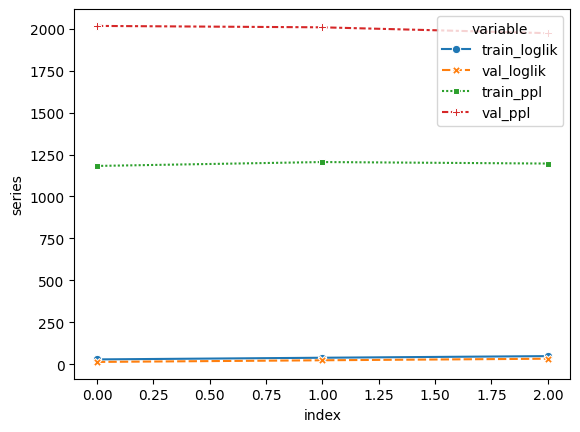

In [128]:
##update the model weights
warnings.filterwarnings("ignore")
myrsm.train(dtm=train_dtm_logoct, val_dtm=test_dtm_logoct, hidden = 5, epochs=3, btsz=100, 
            lr=0.1, momentum=0.1, K=1, softstart=0.0001)

w_vh, w_v, w_h = myrsm.W
print(wang_ppl(w_v,w_h,w_vh,train_dtm_logoct))
print(wang_ppl(w_v,w_h,w_vh,test_dtm_logoct))

multilineplot(pd.DataFrame(
    {'train_loglik': myrsm.train_loglik, 'val_loglik':myrsm.val_loglik,
    'train_ppl': myrsm.train_ppl, 'val_ppl': myrsm.val_ppl}))

In [115]:
newrsm = RSM()
newrsm.W = myrsm.W
newrsm.hidden = myrsm.hidden
log_Zb, Za, log_avg_ratio, var_log_ratio = newrsm.ais(S=10, niter=10, D=1, MH_steps=1)
print(log_Zb)
print(np.exp(log_Zb))
print(np.log(Za))
print(log_avg_ratio)
print(var_log_ratio)
# print('lik:')
# print(myrsm.train_loglik)
# print(myrsm.val_loglik)
# print(myrsm.train_ppl)
# print(myrsm.val_ppl)

100%|██████████| 10/10 [00:00<00:00, 38.19it/s]

60.67775124081957
2.249119537520387e+26
34.657359027997266
26.0203922128223
0.5470638265287626


In [452]:
my_v = train_dtm_logoct[0]
my_h = newrsm.visible2hidden(my_v)
en = newrsm.neg_energy(v = my_v, h = my_h)
print(en)
fren = newrsm.neg_free_energy(v = my_v)
print(fren)

357.75896917833114
357.75896917833114


(1612, 5)
(11415, 1612)
(11415, 5)
(11415,)
(11415,)
(11415,)


<Axes: xlabel='x', ylabel='y'>

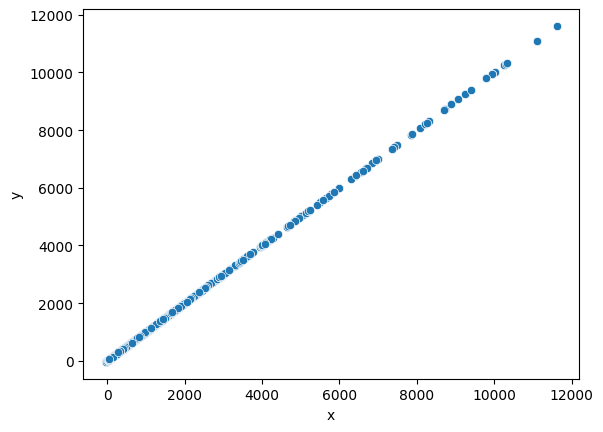

In [453]:
expected_h = newrsm.visible2hidden0(train_dtm_logoct)
energy = newrsm.neg_energy0(train_dtm_logoct, expected_h)
free_energy = newrsm.neg_free_energy0(train_dtm_logoct)
scatter(energy, free_energy)

{'dim': (11415,), 'mean': 26.26, 'stdev': 49.07, 'min': 2.3, 'q25%': 8.03, 'median': 14.56, 'q75%': 26.79, 'max': 875.92}
8


100%|██████████| 3/3 [00:01<00:00,  2.63it/s]


<Axes: xlabel='x', ylabel='y'>

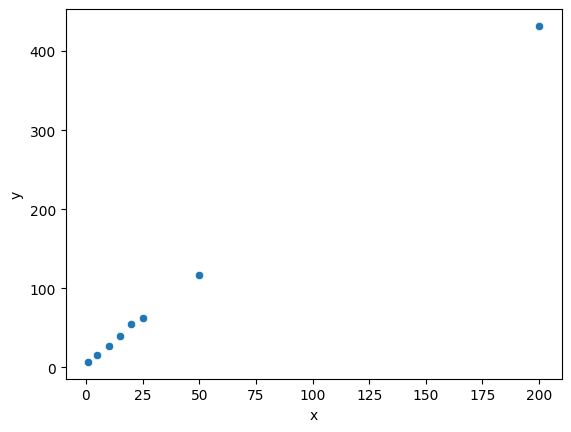

In [129]:
D = train_dtm_logoct.sum(axis=1)
log_pdf = myrsm.neg_free_energy0(train_dtm_logoct)
print(summary(D))

ndocs = [1, 5, 10, 15, 20, 25, 50, 200]#[i for i in range(1, np.max(D).astype(int), 30)]
ndocs = np.array(ndocs)
nit = len(ndocs)
print(nit)
log_Zb_l = np.empty(nit)
var_lrz = np.empty(nit)
for i in range(nit):
    log_Zb, Za, log_avg_ratio, var_log_ratio = myrsm.ais(S=1000, 
                                            niter=3, D=ndocs[i], MH_steps=1)
    log_Zb_l[i] = log_Zb
    var_lrz[i] = var_log_ratio


scatter(ndocs, log_Zb_l)

<Axes: xlabel='x', ylabel='y'>

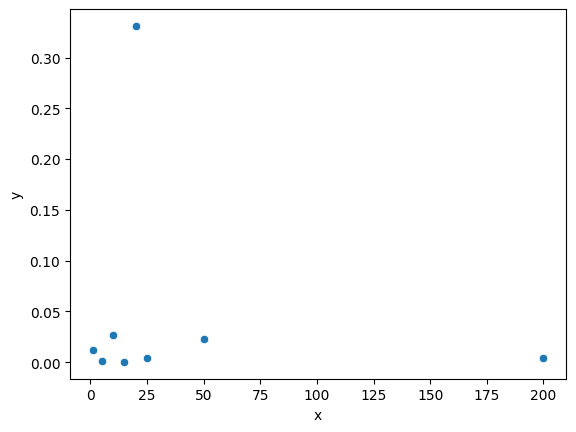

In [130]:
scatter(ndocs, var_lrz/ndocs)

{'R2': 0.999629424331229, 'mse': 6.408108634801291, 'mae': 2.235576974994947, 's': 2.923036921833476}
       coef  stderror       tstat            pv
0  7.850901  1.237663    6.343326  3.594515e-04
1  2.126134  0.016712  127.220381  7.952639e-12
(10,)
{'dim': (11415,), 'mean': 63.69, 'stdev': 104.32, 'min': 12.75, 'q25%': 24.92, 'median': 38.8, 'q75%': 64.81, 'max': 1870.18}
{'dim': (11415,), 'mean': 48.67, 'stdev': 83.84, 'min': 1.7, 'q25%': 15.35, 'median': 28.01, 'q75%': 51.17, 'max': 1403.45}
{'dim': (11415,), 'mean': 0.04, 'stdev': 3.27, 'min': 0.0, 'q25%': 0.0, 'median': 0.0, 'q75%': 0.0, 'max': 346.53}


<Axes: xlabel='x', ylabel='y'>

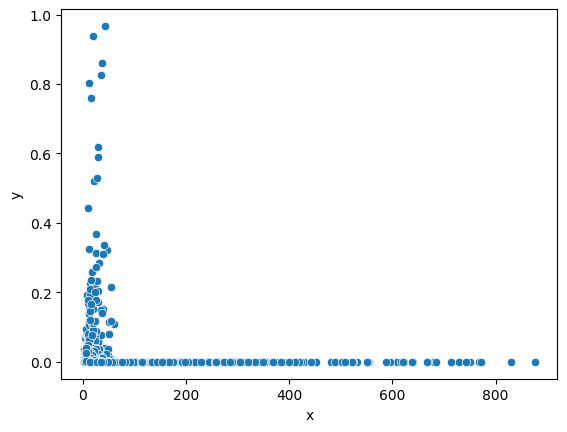

In [131]:
rl = linreg()
rl.train(np.array(ndocs), log_Zb_l, intercept=True)
metrics, tab = rl.summary()
print(metrics)
print(tab)

D = train_dtm_logoct.sum(axis=1)
logZ_d = rl.predict(D)
logpdfs = myrsm.neg_free_energy0(train_dtm_logoct)   #np.log(myrsm.marginal_pdf0(train_dtm_logoct))
probs =  np.exp(logpdfs - logZ_d)
print(probs[probs>1].shape)
print(summary(logZ_d))
print(summary(logpdfs))
print(summary(probs))

scatter(D[probs<1.1], probs[probs<1.1])

In [132]:

### word topic matrix

#word marginal densities

dtm = np.identity(n=train_dtm_logoct.shape[1])

tw = myrsm.visible2hidden0(dtm)

print(summary(tw))

pdf_w = np.exp(myrsm.neg_free_energy0(dtm))

print(summary(pdf_w))

Z1 = np.sum(pdf_w)
probs_w = pdf_w/Z1

print(summary(probs_w))

print(Z1)
print(np.log(Z1))

print(rl.predict(1+np.arange(3)))
print(np.exp(rl.predict(1+np.arange(3))))

{'dim': (1612, 5), 'mean': 0.1, 'stdev': 0.02, 'min': 0.0, 'q25%': 0.09, 'median': 0.1, 'q75%': 0.11, 'max': 0.29}
{'dim': (1612,), 'mean': 9.11, 'stdev': 14.65, 'min': 0.99, 'q25%': 2.85, 'median': 4.85, 'q75%': 9.37, 'max': 297.96}
{'dim': (1612,), 'mean': 0.0, 'stdev': 0.0, 'min': 0.0, 'q25%': 0.0, 'median': 0.0, 'q75%': 0.0, 'max': 0.02}
14692.37115097552
9.595083668734247
[ 9.97703465 12.10316852 14.22930239]
[  21526.38464759  180442.69385215 1512542.22655835]


In [133]:
## confronto su Z_1
print('# words')
print(ndocs)
print('AIS estimates')
print(log_Zb_l)
print(np.exp(log_Zb_l))
print('regression estimates')
print(rl.predict(ndocs))
print(np.exp(rl.predict(ndocs)))
print('real Z1')
print(np.log(Z1))
print(Z1)

# words
[  1   5  10  15  20  25  50 200]
AIS estimates
[  6.99733875  15.48355393  27.74968161  39.37941324  54.45730337
  62.59814201 117.42228217 431.83913159]
[1.09371862e+003 5.30178400e+006 1.12598757e+012 1.26549919e+017
 4.47204692e+023 1.53471470e+027 9.90487954e+050 3.51036212e+187]
regression estimates
[  9.97703465  18.48157012  29.11223945  39.74290878  50.37357811
  61.00424744 114.15759409 433.07767401]
[2.15263846e+004 1.06278134e+008 4.39830102e+012 1.82022879e+017
 7.53298335e+021 3.11751130e+026 3.78454072e+049 1.21127864e+188]
real Z1
9.595083668734247
14692.37115097552


In [125]:
D = train_dtm_logoct.sum(axis=1)
wang_probs = myrsm.approx_prob(train_dtm_logoct)
wp = np.log(wang_probs)*train_dtm_logoct
wp0 = wp.sum(axis=1)/D
wp = np.exp(wp0)
print(np.exp(-np.mean(wp0)))


1124.8394964434276


In [249]:
print(myrsm.approx_ppl(train_dtm_logoct))

1196.2978282880172


In [121]:
D = train_dtm_logoct.sum(axis=1)
wang_probs = myrsm.approx_prob(train_dtm_logoct)

print(np.exp(-np.sum(np.log(wang_probs)*train_dtm_logoct) / np.sum(D)))
print(-np.sum(np.log(wang_probs)*train_dtm_logoct) / np.sum(D))

1213.1496105997874
7.100975240662196


In [134]:
print(summary(logpdfs))
print(summary(logpdfs - logZ_d))
print(summary(probs[probs<1]))
logp = logpdfs - logZ_d
logp = logp[logp<0]

{'dim': (11415,), 'mean': 48.67, 'stdev': 83.84, 'min': 1.7, 'q25%': 15.35, 'median': 28.01, 'q75%': 51.17, 'max': 1403.45}
{'dim': (11415,), 'mean': -15.02, 'stdev': 21.92, 'min': -477.96, 'q25%': -14.76, 'median': -10.68, 'q75%': -8.28, 'max': 5.85}
{'dim': (11405,), 'mean': 0.0, 'stdev': 0.03, 'min': 0.0, 'q25%': 0.0, 'median': 0.0, 'q75%': 0.0, 'max': 0.97}


In [245]:
c = 1e-300
probsp = probs[probs<1]
Np = len(probsp)
Dp = D[probs<1]
ppl = np.exp(-np.log(np.sum(probsp*Dp/Dp.sum())))
print('res1:  ' + str(ppl))
ppl = np.exp(-np.sum(np.log(probsp)*Dp/Dp.sum()))
print('res2:  ' + str(ppl))
print('res2:  ' + str(np.log(ppl)))
ppl = np.exp(- np.sum(np.log(probsp) ) / Np )
print('res3:  ' + str(ppl))
ppl = np.exp(np.sum(np.exp( np.log(-np.log(c+probs[probs<1])) - np.log(Np)  )))
print('res4:  ' + str(ppl))
ppl = np.sum(( np.log(-np.log(c+probsp)) - np.log(Np)  ))
print('res5:  ' + str(ppl))
ppl = np.exp(np.sum(np.exp(np.log(-logp) - np.log(Np)  )))
print('res6:  ' + str(ppl))
ppl = np.sum(np.exp(np.log(-logp) - np.log(Np)))
print('res7:  ' + str(ppl))

res1:  486.6995756472781
res2:  2.5323473290846556e+23
res2:  53.88860380952107
res3:  3375588.4661706993
res4:  3375588.466170711
res5:  -78613.25126376507
res6:  3375588.466170711
res7:  15.032080227436646


In [464]:
print(np.exp(-np.sum(np.log(1e-200+probs)*D) / np.sum(D)))
print(-np.sum(np.log(1e-200+probs)*D) / np.sum(D))
print(np.exp(-np.mean(np.log(1e-200+probs))))
print(-np.mean(np.log(1e-200+probs)))

9.83770958546024e+53
124.32323284694918
9.181701974030826e+17
41.3611591685679


In [460]:
print(np.exp(np.sum(-np.log(1e-100+wp))/D.sum() ))
print(np.exp(np.sum(-np.log(1e-100+probs))/D.sum()))

1.3661646440708592
4.542870578818377


<Axes: xlabel='wp', ylabel='probs'>

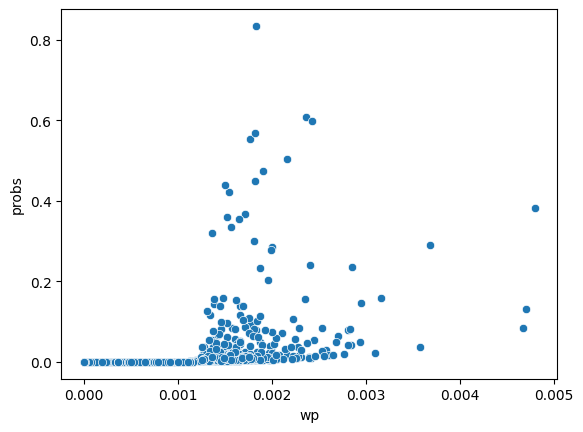

In [465]:
fi = probs < 1
scatter(wp[fi], probs[fi], xlab='wp', ylab='probs')

<Axes: xlabel='x', ylabel='y'>

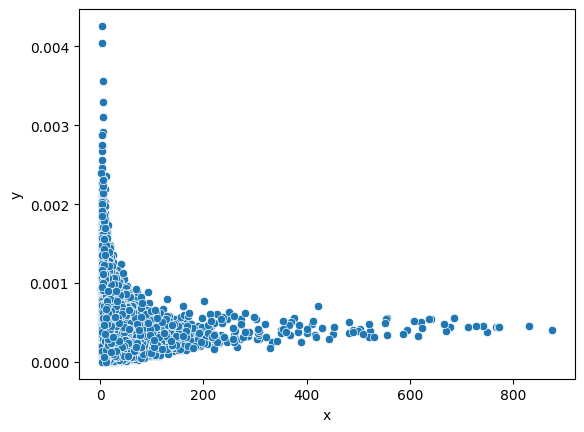

In [ ]:
scatter(D, wp)

<Axes: xlabel='x', ylabel='y'>

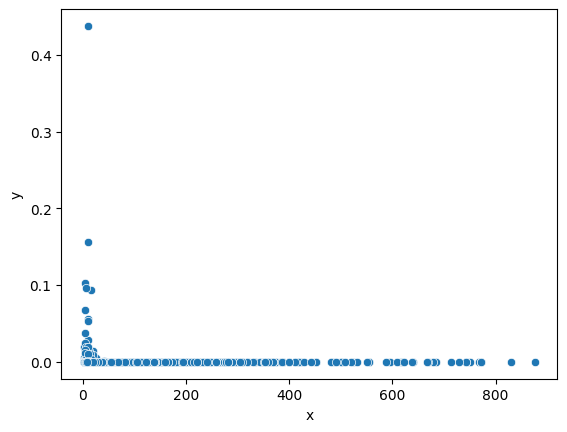

In [217]:
scatter(D, probs)

<Axes: xlabel='wp', ylabel='probs'>

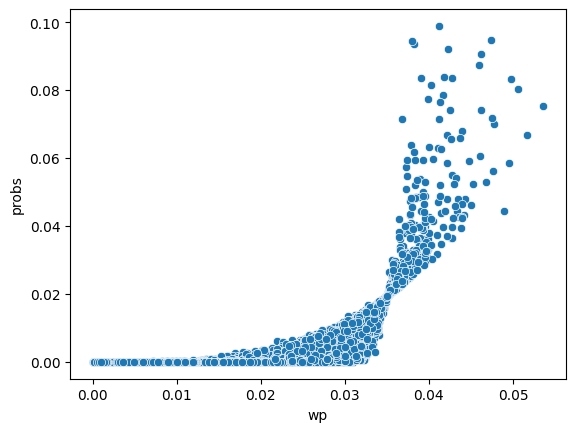

In [231]:
fi = probs < 0.01
scatter(x=np.sqrt(wp[fi]), y=np.sqrt(probs[fi]), xlab='wp', ylab='probs')

<Axes: xlabel='x', ylabel='y'>

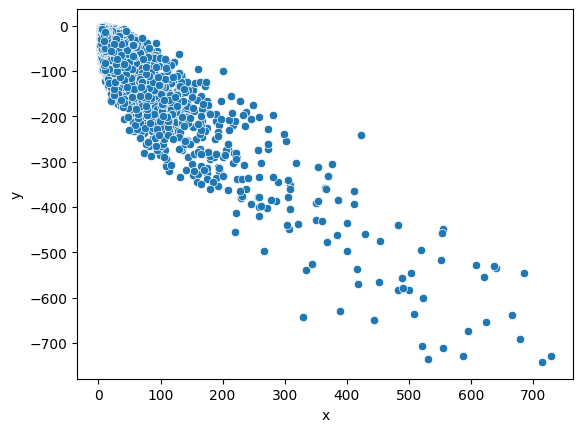

In [271]:
#scatter(D[probs<1.1], np.log(probs[probs<1.1]))
scatter(D, np.log(probs))

In [136]:
probs_ppl = probs[probs<1.00001]
D_ppl = D[probs<1.00001]
print(probs_ppl.shape)
print(D_ppl.shape)

c = 1e-323

per_word_avg_ppl = np.log(c + probs_ppl)/D_ppl
ppl = np.exp(- np.mean(per_word_avg_ppl))
print('per word ppl')
print(ppl)
print(np.log(ppl))
print(np.exp(-np.log(c + probs_ppl).sum()/D_ppl.sum()))

print('per doc ppl')
per_doc_ppl = np.log(c + probs_ppl)
ppl = np.exp(- np.mean(per_doc_ppl))
print(ppl)

print('per doc log ppl')
print(- np.mean(per_doc_ppl))


print(np.exp(-np.sum(np.log(c + probs_ppl))/np.sum(D_ppl)))
print(-np.sum(np.log(c + probs_ppl))/np.sum(D_ppl))

(11405,)
(11405,)
per word ppl
2.5065971041876702
0.9189260979196116
1.7725656167954582
per doc ppl
3375588.4661706993
per doc log ppl
15.032080227436643
1.7725656167954582
0.5724279980875828


In [30]:
## estimate test perplexity

D = test_dtm_logoct.sum(axis=1)
logZ_d = rl.predict(D)
logpdfs = myrsm.neg_free_energy0(test_dtm_logoct)
probs =  np.exp(logpdfs - logZ_d)

c = 1e-323
per_word_avg_ppl = np.log(c + probs)/D
ppl = np.exp(- np.mean(per_word_avg_ppl))
print('per word ppl')
print(ppl)
print(np.exp(ppl))



per word ppl
4.760779126870288
116.83692123070533


In [ ]:
## estimating topic doc matrix and word topic matrix

## topic doc matrix


td_mat = myrsm.visible2hidden0(train_dtm_logoct)

print(td_mat.shape)
print(td_mat[0:8])



(11415, 5)
[[1.89441053e-024 1.88705865e-024 1.89370527e-024 1.89436881e-024
  1.88635666e-024]
 [1.52291556e-052 1.53580798e-052 1.52334399e-052 1.54298303e-052
  1.52711375e-052]
 [2.98830417e-010 3.00658944e-010 2.98791362e-010 3.01496338e-010
  2.99644715e-010]
 [1.39167856e-007 1.39046688e-007 1.39034192e-007 1.39232135e-007
  1.38936900e-007]
 [1.42443965e-042 1.43616492e-042 1.42558742e-042 1.43905995e-042
  1.42848656e-042]
 [5.13213302e-022 5.13712144e-022 5.13620412e-022 5.15148906e-022
  5.12946338e-022]
 [5.29266844e-131 5.79060273e-131 5.33918454e-131 5.81334986e-131
  5.52018379e-131]
 [2.08661654e-008 2.09523499e-008 2.08460257e-008 2.10125363e-008
  2.08937735e-008]]


In [ ]:

## estimating word topic matrix


##ndoc = 1
nwords = train_dtm_logoct.shape[1]

one_word_dtm = np.identity(nwords)

prob_t_given_w = myrsm.visible2hidden0(one_word_dtm)

print(prob_t_given_w.shape)

prob_w = myrsm.approx_prob(one_word_dtm)

print(prob_w.shape)

prob_t_w = (prob_w @ prob_t_given_w).T

print(prob_t_w.shape)

prob_t = prob_t_w.sum(axis=1)/ prob_t_w.sum(axis=1).sum()

print(prob_t.shape)

prob_w_given_t = prob_t_w/np.tile(prob_t, (prob_t_w.shape[1] , 1)).T

print(prob_t_given_w.shape)

(1612, 5)
(1612, 1612)
(5, 1612)
(5,)
(1612, 5)


In [218]:

    # def visible2hidden0(self,v):
    #     w_vh, w_v, w_h = self.W
    #     D = np.tile(v.sum(axis=1), (w_h.shape[0], 1)).T
    #     energy = D*w_h + np.dot(v, w_vh)
    #     return self.sigmoid(energy)

    # def approx_prob(self, dtm):
    #     w_vh, w_v, w_h = self.W
    #     D = dtm.sum(axis=1)
    #     # compute hidden activations
    #     h = self.sigmoid(np.dot(dtm, w_vh) + np.outer(D, w_h))

    #     # compute visible activations
    #     v = np.dot(h, w_vh.T) + w_v
    #     pdf = self.softmax0(v)

    #     return pdf


nwords = train_dtm.shape[1]

one_word_dtm = np.identity(nwords)

prob_t_given_w = myrsm.visible2hidden0(one_word_dtm)

prob_w = myrsm.approx_prob(one_word_dtm)

prob_t_w = (prob_w @ prob_t_given_w).T

prob_t = prob_t_w.sum(axis=1)/ prob_t_w.sum(axis=1).sum()


prob_w_given_t = prob_t_w/np.tile(prob_t, (prob_t_w.shape[1] , 1)).T


In [221]:
### compute ppl

print(td_mat.shape)
print(prob_w_given_t.shape)
prob_w_given_d = td_mat @ prob_w_given_t

ppl = np.exp(- np.nansum(np.log(1e-300 + prob_w_given_d) * train_dtm_logoct) /  np.sum(train_dtm_logoct))

print(ppl)

(11415, 5)
(5, 1612)
2.509187546290029e+100


In [238]:
# --- inputs (example variable names) ---
# W_vh: (n_words, n_topics)
# b_v:  (n_words,)         visible biases
# dtm:  (n_docs, n_words)  training corpus
# myrsm.visible2hidden0(dtm) -> (n_docs, n_topics)

w_vh, w_v, w_h = myrsm.W


# 1) get empirical hidden means m_u = E[h_u]
h_given_docs = myrsm.visible2hidden0(train_dtm_logoct)   # shape (n_docs, n_topics)
m = h_given_docs.mean(axis=0)                # shape (n_topics,)

# 2) compute P(word | h_t = 1) for each topic t
n_topics = w_vh.shape[1]
n_words  = w_vh.shape[0]
prob_w_given_t = np.empty((n_words, n_topics))

def softmax_np(x):
    x = x - np.max(x)     # numeric stability scalar or vector as needed
    e = np.exp(x)
    return e / e.sum()

for t in range(n_topics):
    h_approx = m.copy()
    h_approx[t] = 1.0
    logits = w_v + w_vh.dot(h_approx)
    prob_w_given_t[:, t] = myrsm.softmax(logits)



In [240]:
### compute ppl

print(td_mat.shape)
print(prob_w_given_t.shape)
prob_w_given_d = td_mat @ prob_w_given_t.T

ppl = np.exp(- np.sum(np.log(1e-300 + prob_w_given_d) * train_dtm_logoct) /  np.sum(train_dtm_logoct))

print(ppl)

(11415, 5)
(1612, 5)
1.7669303398318952e+103


In [253]:
# Inputs
# prob_w_given_t: (n_words, n_topics)  each column t is P(w | h_t=1)
# h_post_docs: (n_docs, n_topics)      P(h_t=1 | doc) for each doc
# train_dtm: (n_docs, n_words)          counts

# compute P(w|doc) as mixture: P(w|d) = sum_t P(w|h_t=1) * P(h_t=1|d)
# shapes: (n_docs, n_topics) @ (n_topics, n_words) -> (n_docs, n_words)

h_post_docs = myrsm.visible2hidden0(train_dtm_logoct)
prob_w_given_t_T = prob_w_given_t.T            # (n_topics, n_words)
prob_w_given_d = h_post_docs @ prob_w_given_t_T # (n_docs, n_words)

# clip tiny probs and compute per-word perplexity
eps = 1e-300
prob_w_given_d = np.clip(prob_w_given_d, eps, 1.0)
log_prob = np.log(prob_w_given_d)               # (n_docs, n_words)

# log-likelihood weighted by counts
ll = (train_dtm * log_prob).sum()
n_tokens = train_dtm.sum()
ppl = np.exp(- ll / n_tokens)
print("ppl (mixture) =", ppl)


ppl (mixture) = 7.580656814104988e+34


In [251]:
# Inputs:
# W_vh: (n_words, n_topics)
# b_v:   (n_words,)
# h_post_docs: (n_docs, n_topics)
# train_dtm: (n_docs, n_words)

n_docs = train_dtm.shape[0]
n_words = train_dtm.shape[1]
w_vh, w_v, w_h = myrsm.W

# compute logits for each doc: logits_d = b_v + W @ m_doc  (m_doc = h_post_docs[d])
# vectorized: logits_docs = h_post_docs @ W_vh.T  -> (n_docs, n_words)
logits_docs = h_post_docs @ w_vh.T   # (n_docs, n_words)
logits_docs += w_v[np.newaxis, :]    # broadcast visible biases

# convert logits to log-probabilities per word (stable)
# apply row-wise log-softmax
maxes = np.max(logits_docs, axis=1, keepdims=True)
exp_shift = np.exp(logits_docs - maxes)
log_prob_docs = logits_docs - maxes - np.log(exp_shift.sum(axis=1, keepdims=True))  # (n_docs, n_words)

# log-likelihood weighted by counts
ll = (train_dtm * log_prob_docs).sum()
n_tokens = train_dtm.sum()
ppl_meanfield = np.exp(- ll / n_tokens)
print("ppl (mean-field) =", ppl_meanfield)


ppl (mean-field) = 1161.482487412952


In [247]:
import numpy as np

# --- Inputs ---
# W_vh: (n_words, n_topics)   visible-to-hidden weights
# b_v:  (n_words,)            visible biases
# train_dtm: (n_docs, n_words)  counts per document
# h_post_docs: (n_docs, n_topics)  P(h=1 | doc) from visible2hidden0

# 1) Compute logits for each doc
logits_docs = h_post_docs @ w_vh.T    # (n_docs, n_words)
logits_docs += w_v[np.newaxis, :]     # add visible bias

# 2) Stable log-softmax per doc
maxes = np.max(logits_docs, axis=1, keepdims=True)
exp_shift = np.exp(logits_docs - maxes)
log_prob_docs = logits_docs - maxes - np.log(exp_shift.sum(axis=1, keepdims=True))  # (n_docs, n_words)

# 3) Per-document log-likelihood and perplexity
doc_lengths = train_dtm.sum(axis=1)   # tokens per doc
doc_ll = (train_dtm * log_prob_docs).sum(axis=1)   # log-likelihood per doc
doc_ppl = np.exp(- doc_ll / doc_lengths)          # perplexity per doc

# 4) Corpus-level perplexity (mean of logs, not mean of perplexities)
corpus_ll = doc_ll.sum()
corpus_tokens = doc_lengths.sum()
corpus_ppl = np.exp(- corpus_ll / corpus_tokens)

print("Corpus perplexity =", corpus_ppl)
print("First 5 per-doc perplexities:", doc_ppl[:5])


Corpus perplexity = 1161.4824874129395
First 5 per-doc perplexities: [ 858.21338784 1042.73695494  987.33644065 2144.47001615  757.34607901]


In [248]:
summary(doc_ppl)

{'dim': (11415,),
 'mean': 1149.4,
 'stdev': 341.69,
 'min': 248.5,
 'q25%': 929.26,
 'median': 1111.15,
 'q75%': 1321.04,
 'max': 5660.49}

In [233]:
print(prob_w.sum(axis=1))
print(prob_t_given_w[0])
print(prob_w_given_t[0])
print(prob_w_given_t.sum(axis=0))
print(prob_t_w[0])

[1. 1. 1. ... 1. 1. 1.]
[0.1260186  0.12603807 0.12601638 0.12604477 0.12603753]
[0.00139011 0.00139002 0.00139008 0.00138989 0.00139029]
[1. 1. 1. 1. 1.]
[0.12729887 0.12587302 0.1195903  ... 0.12378508 0.12341115 0.12452511]


In [ ]:
prob_t_w.sum()

1011.2772677755447

In [170]:
print(prob_t_w.sum(axis=1))
prob_t = prob_t_w.sum(axis=1)/ prob_t_w.sum()
print(prob_t)

[202.22837958 202.27607162 202.22865503 202.30480082 202.23936073]
[0.19997323 0.20002039 0.1999735  0.2000488  0.19998409]


<Axes: xlabel='x', ylabel='y'>

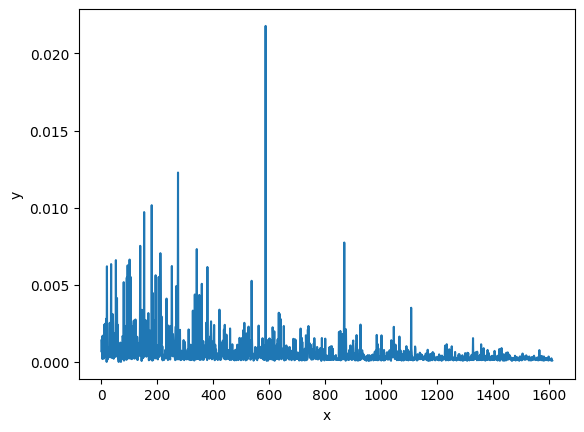

In [237]:
plotline(prob_w_given_t[:,2])

In [292]:
w_vh, w_v, w_h = myrsm.W

print(w_h)
print(summary(w_v))
print(summary(w_vh))

[-21.81319364 -23.25019341 -22.75878039 -19.27621463 -23.28125547]
{'dim': (1612,), 'mean': 1.32, 'stdev': 2.04, 'min': -61.25, 'q25%': 0.83, 'median': 1.3, 'q75%': 1.9, 'max': 5.8}
{'dim': (1612, 5), 'mean': -0.36, 'stdev': 12.08, 'min': -475.36, 'q25%': -0.16, 'median': 0.04, 'q75%': 0.32, 'max': 1.87}


In [31]:
### word topic matrix

#word marginal densities

dtm = np.identity(n=train_dtm_logoct.shape[1])

tw = myrsm.visible2hidden0(dtm)

print(summary(tw))

pdf_w = np.exp(myrsm.neg_free_energy0(dtm))

print(summary(pdf_w))

Zw = np.sum(pdf_w)
probs_w = pdf_w/Zw

print(summary(probs_w))

print(Zw)
print(np.log(Zw))

print(rl.predict(1+np.arange(3)))
print(np.exp(rl.predict(1+np.arange(3))))

{'dim': (1612, 5), 'mean': 0.1, 'stdev': 0.02, 'min': 0.0, 'q25%': 0.09, 'median': 0.1, 'q75%': 0.11, 'max': 0.41}
{'dim': (1612,), 'mean': 9.23, 'stdev': 15.74, 'min': 0.81, 'q25%': 2.88, 'median': 4.75, 'q75%': 9.5, 'max': 333.03}
{'dim': (1612,), 'mean': 0.0, 'stdev': 0.0, 'min': 0.0, 'q25%': 0.0, 'median': 0.0, 'q75%': 0.0, 'max': 0.02}
14874.536884470972
9.607406096112086
[ 9.77991297 12.01738492 14.25485687]
[  17675.11460118  165609.00908326 1551692.56371905]


In [ ]:
print(td_mat)

In [307]:
print(ndocs)
print(log_Zb_l)
print(np.exp(log_Zb_l))

[1, 5, 10, 15, 20, 25, 50, 200]
[  7.01502673  18.05201071  31.70676838  44.54459076  62.15481812
  75.238127   130.11340513 504.63531925]
[1.11323641e+003 6.91653593e+007 5.88944738e+013 2.21549088e+019
 9.85132246e+026 4.73700002e+032 3.21761346e+056 1.44655357e+219]


<Axes: xlabel='Doc Length', ylabel='pdf'>

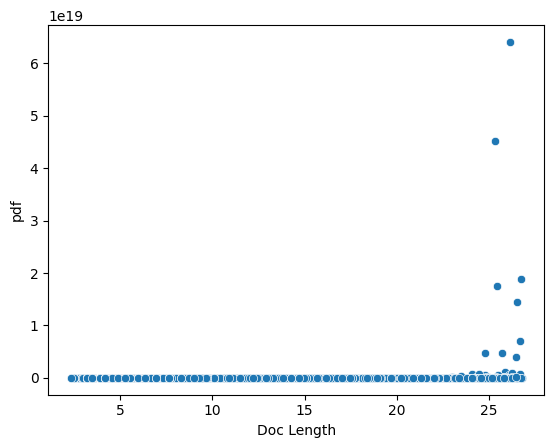

In [65]:

scatter(D[D < np.quantile(D,0.75)], 
        np.exp(log_pdf)[D < np.quantile(D,0.75)], 
        'Doc Length', 'pdf')

<Axes: xlabel='Doc Length', ylabel='log pdf'>

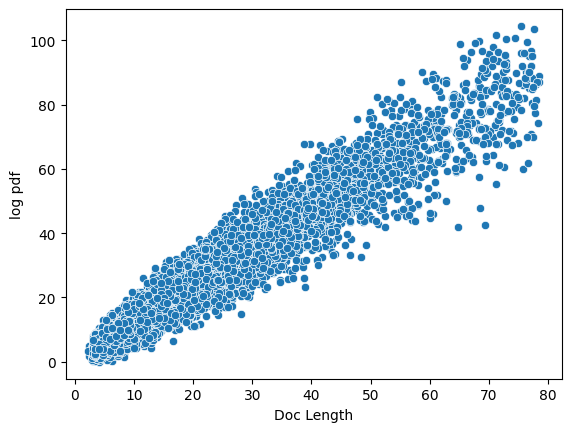

In [61]:
scatter(D[D < np.quantile(D,0.95)], 
        log_pdf[D < np.quantile(D,0.95)], 
        'Doc Length', 'log pdf')

<Axes: xlabel='x', ylabel='y'>

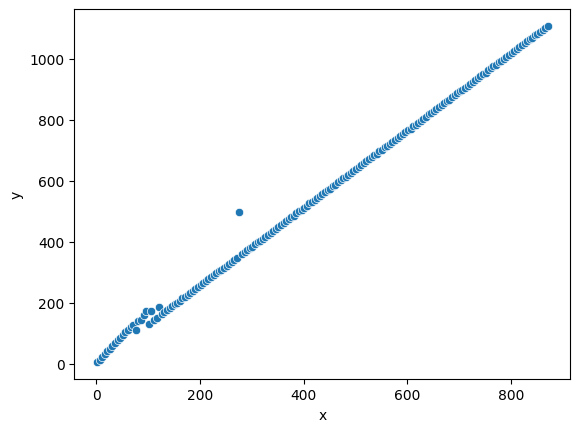

In [709]:
scatter(ndocs, log_Zb_l)

In [710]:
rl = linreg()
rl.train(np.array(ndocs), log_Zb_l, intercept=True)
metrics, tab = rl.summary()
print(metrics)
print(tab)

{'R2': 0.9983158239210635, 'mse': 168.31740957448537, 'mae': 6.153666495971251, 's': 13.048497062157265}
        coef  stderror       tstat            pv
0  15.352817  1.967701    7.802414  2.755574e-13
1   1.250531  0.003905  320.230934  0.000000e+00


(520,)
{'dim': (11415,), 'mean': 48.2, 'stdev': 61.36, 'min': 18.23, 'q25%': 25.39, 'median': 33.56, 'q75%': 48.86, 'max': 1110.72}
{'dim': (11415,), 'mean': 34.43, 'stdev': 57.92, 'min': 0.06, 'q25%': 11.42, 'median': 20.58, 'q75%': 37.17, 'max': 1029.14}
{'dim': (11415,), 'mean': 4.982598496525387e+88, 'stdev': 5.323225044024179e+90, 'min': 0.0, 'q25%': 0.0, 'median': 0.0, 'q75%': 0.0, 'max': 5.687636183783707e+92}


<Axes: xlabel='x', ylabel='y'>

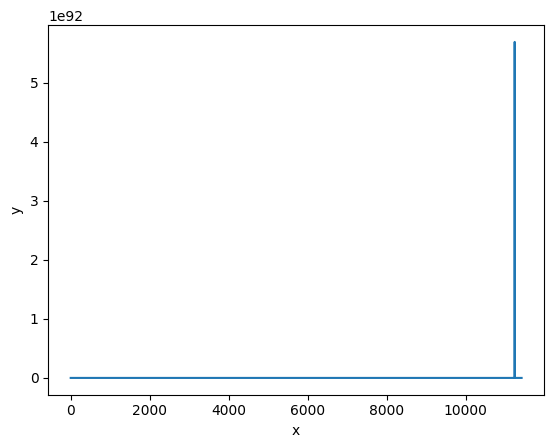

In [711]:
D = train_dtm_logoct.sum(axis=1)
logZ_d = rl.predict(D)
logpdfs = myrsm.neg_free_energy0(train_dtm_logoct)   #np.log(myrsm.marginal_pdf0(train_dtm_logoct))
probs =  np.exp(logpdfs - logZ_d)
print(probs[probs>1].shape)
print(summary(logZ_d))
print(summary(logpdfs))
print(summary(probs))
plotline(probs[np.isfinite(probs)])

In [125]:
summary(np.log(1e-100 + probs))

{'dim': (11415,),
 'mean': -76.39,
 'stdev': 57.83,
 'min': -230.26,
 'q25%': -99.06,
 'median': -46.3,
 'q75%': -39.6,
 'max': -28.81}

<Axes: xlabel='x', ylabel='y'>

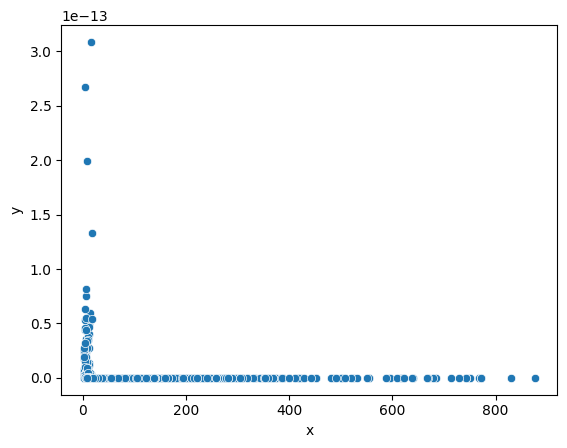

In [123]:
#scatter(D_ppl, np.log(probs_ppl))
scatter(D_ppl, probs_ppl)

In [706]:
np.sort(probs_ppl)[::-1][0:40]

array([0.96566537, 0.95665984, 0.94335086, 0.92637301, 0.92425936,
       0.92072608, 0.91990457, 0.91231948, 0.90170712, 0.88218581,
       0.88105465, 0.87171051, 0.86907578, 0.83574678, 0.82789837,
       0.82295413, 0.8095746 , 0.80484106, 0.79258118, 0.78869036,
       0.77588075, 0.762887  , 0.75684674, 0.74184101, 0.73689027,
       0.71128716, 0.70260392, 0.66796427, 0.65374338, 0.65337118,
       0.64210307, 0.6387718 , 0.62849275, 0.62734369, 0.61907988,
       0.61610665, 0.61610665, 0.60494686, 0.59922201, 0.59467454])

<Axes: xlabel='x', ylabel='y'>

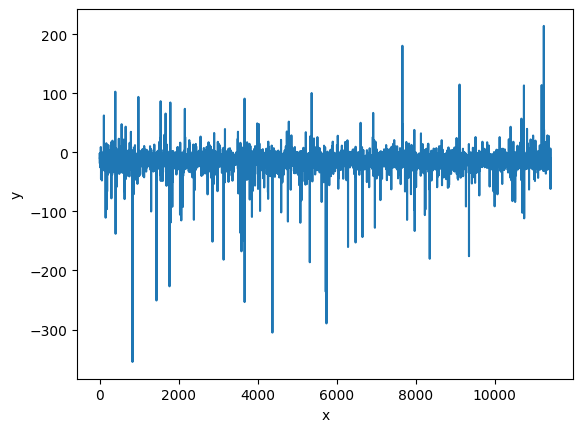

In [704]:
plotline(np.log(probs[np.isfinite(probs)]))

<Axes: xlabel='x', ylabel='y'>

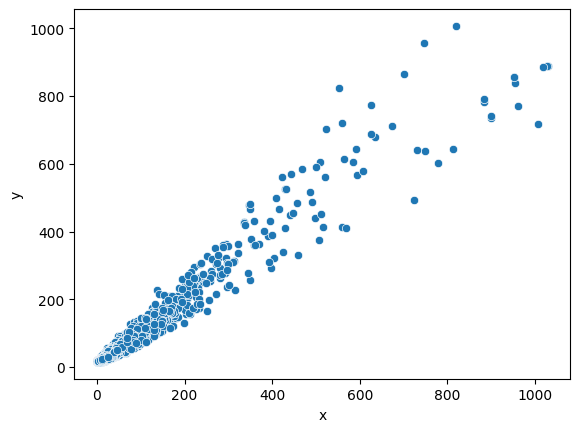

In [658]:
scatter(y=logZ_d, x=logpdfs)

<Axes: xlabel='ndocs', ylabel='log Z'>

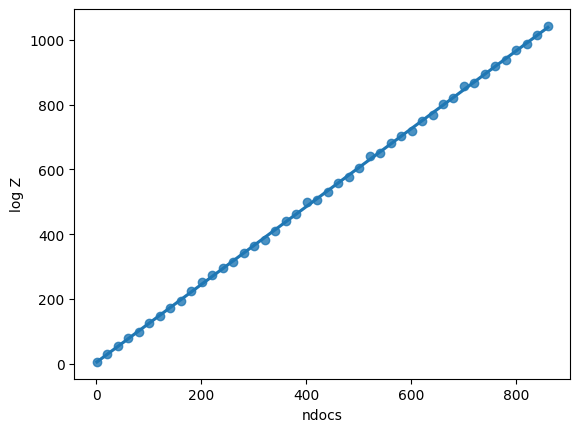

In [633]:
regscatter(ndocs, log_Zb_l, xlab='ndocs', ylab='log Z')

<Axes: xlabel='ndocs', ylabel='log Z'>

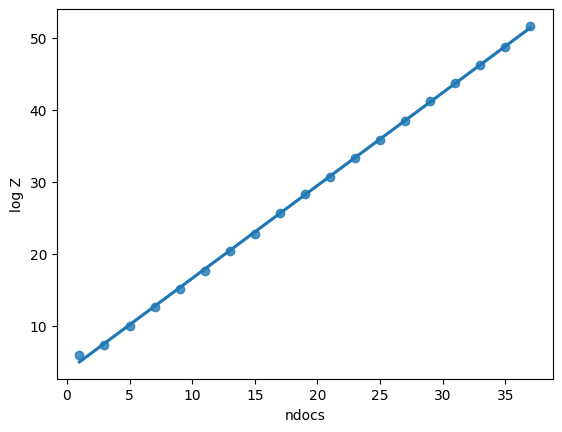

In [152]:
regscatter(ndocs, np.log(Zb_l), xlab='ndocs', ylab='log Z')

In [153]:
rl = linreg()
rl.train(np.array(ndocs), np.log(Zb_l), intercept=True)
metrics, tab = rl.summary()
print(metrics)
print(tab)

{'R2': 0.9997025531226024, 'mse': 0.059396414186383244, 'mae': 0.15547324984762598, 's': 0.2576513683644536}
       coef  stderror       tstat            pv
0  3.679069  0.118342   31.088542  1.110223e-16
1  1.289794  0.005396  239.031510  0.000000e+00


<Axes: xlabel='index', ylabel='series'>

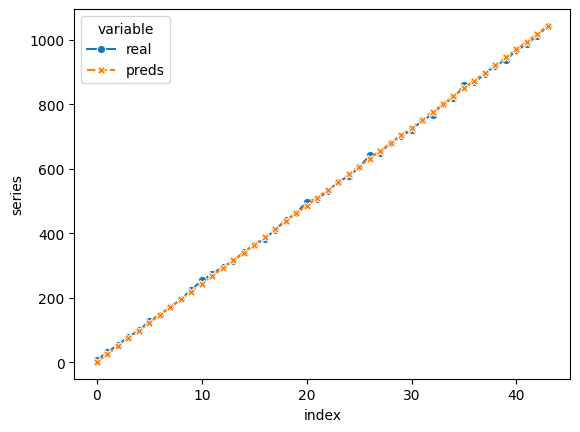

In [634]:
preds = rl.predict(np.array(ndocs))

multilineplot(pd.DataFrame({'real': log_Zb_l, 'preds': preds}))


<Axes: xlabel='log Zd', ylabel='Count'>

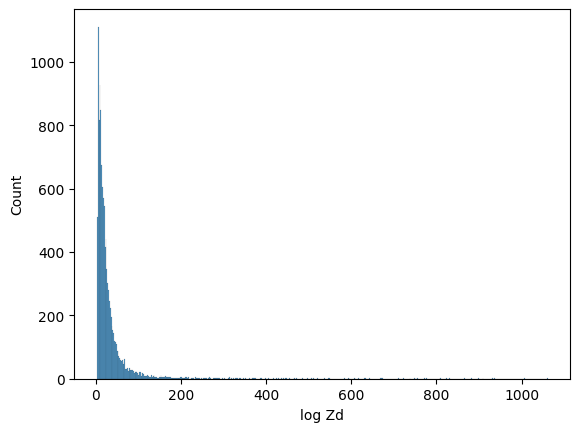

In [635]:
Z_d = rl.predict(D)
hist(Z_d, xlab='log Zd')

<Axes: xlabel='x', ylabel='y'>

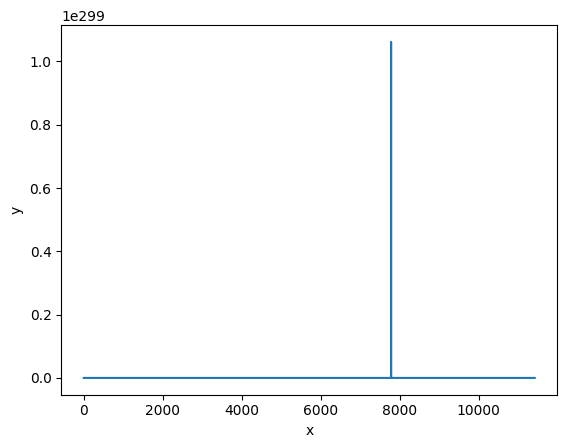

In [171]:
Z_d = np.exp(Z_d)
plotline(Z_d)

In [194]:
D = train_dtm_logoct.sum(axis=1)
Z_d = np.exp(rl.predict(D))
pdfs = myrsm.marginal_pdf0(train_dtm_logoct)
probs =  pdfs / Z_d
print(summary(Z_d))
print(summary(pdfs))
print(summary(probs))

{'dim': (11415,), 'mean': inf, 'stdev': nan, 'min': 771.96, 'q25%': 1246960.03, 'median': 5641524650.45, 'q75%': 4.02240219458276e+16, 'max': inf}
{'dim': (11415,), 'mean': inf, 'stdev': nan, 'min': 0.94, 'q25%': 18020.22, 'median': 63225650.86, 'q75%': 127346219426797.55, 'max': inf}
{'dim': (11415,), 'mean': nan, 'stdev': nan, 'min': nan, 'q25%': nan, 'median': nan, 'q75%': nan, 'max': nan}


In [202]:
summary(probs[np.isfinite(probs)])

{'dim': (11406,),
 'mean': 1032.04,
 'stdev': 71852.43,
 'min': 0.0,
 'q25%': 0.0,
 'median': 0.01,
 'q75%': 0.09,
 'max': 7452353.38}

In [204]:
probs[probs>1].shape

(1093,)

In [79]:
x = np.arange(3)
print(np.vstack((np.ones(x.shape[0]), x)).T)

[[1. 0.]
 [1. 1.]
 [1. 2.]]


In [68]:
newrsm = RSM()
newrsm.W = myrsm.W

newrsm.approx_ppl(train_dtm_logoct)

C:\Users\feder\AppData\Local\Temp\ipykernel_9912\3613150746.py:19: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


1208.7397009339008

In [139]:
ar = np.array([[4,6,7],[2,3,1]])
print(ar)
print(ar.T)
print(ar.shape)
print(ar.T.shape)

[[4 6 7]
 [2 3 1]]
[[4 2]
 [6 3]
 [7 1]]
(2, 3)
(3, 2)


In [31]:
arr = np.array([1, 2, 3, 4, 5, 6]) 

def repeatvec(vec, times):
    return np.tile(vec, times)

def vec2matrix(vec, rows):
    return np.tile(vec, (rows, 1))

print(np.tile(arr, 1))
print(np.tile(arr, 2))
print(np.tile(arr, (2,1)))


[1 2 3 4 5 6]
[1 2 3 4 5 6 1 2 3 4 5 6]
[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]


In [ ]:
myvec = np.random.normal(loc=900, scale=10, size=100)
#numerically unstable
result = np.log(np.sum(np.exp(myvec)))
print(result)

# numerically stanble
stable_result = np.max(myvec) + np.log(np.sum(np.exp(myvec - np.max(myvec))))
print(stable_result)

(100000,)
simulation complete


<Axes: xlabel='class', ylabel='elapsed'>

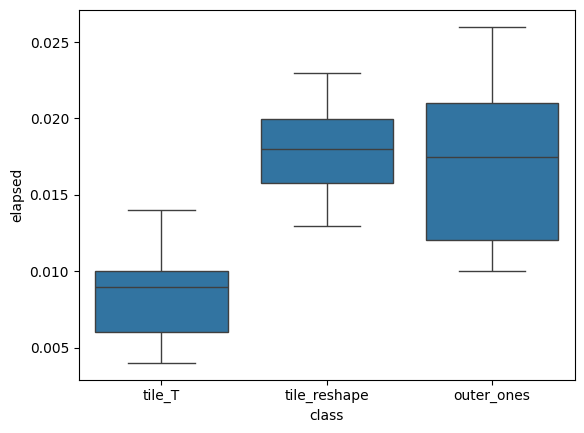

In [82]:
import time
### test on computational efficiency

ntry = 100
try_tile_T = np.empty(ntry)
try_tile_reshape = np.empty(ntry)
try_outer_ones = np.empty(ntry)


megav = np.arange(100000)
print(megav.shape)

for t in range(ntry):

    #way one
    start = time.time()
    res = np.tile(megav, (20, 1)).T
    try_tile_T[t] = time.time() - start

    #way two
    start = time.time()
    res = np.tile(megav.reshape(-1,1), (1, 20))
    try_tile_reshape[t] = time.time() - start

    #way three
    start = time.time()
    res = np.outer(megav, np.ones(20))
    try_outer_ones[t] = time.time() - start


print('simulation complete')

## plot result
series = np.concatenate([np.repeat('tile_T', ntry), 
                       np.repeat('tile_reshape', ntry), 
                       np.repeat('outer_ones', ntry)])


elapsed = np.concatenate([try_tile_T, try_tile_reshape, try_outer_ones])


df = pd.DataFrame({'elapsed':elapsed, 'class':series})

sns.boxplot(df, x='class', y='elapsed')



In [142]:
arr = np.array([1, 2, 3, 4, 5])  # shape (5,)
matrix = np.tile(arr.reshape(-1, 1), (1, 10))
print(matrix.shape)  # (5, 100)
print(matrix)
print(arr.reshape(-1, 1))
print(arr.T)
print(np.outer(arr, np.ones(10)))

(5, 10)
[[1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]]
[[1]
 [2]
 [3]
 [4]
 [5]]
[1 2 3 4 5]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]


In [85]:
mya = np.array([1,2,3])
print(mya)
print(mya.T)
print(mya.transpose())
print(mya.reshape(-1,1))

[1 2 3]
[1 2 3]
[1 2 3]
[[1]
 [2]
 [3]]



Stima di Zb con AIS
pseudocodice

inizializza niter, S, beta
for i in range(niter):
    campiona v_0
    for s in range(S-1):
        campiona v_s+1
        calcola il rapporto pdf_s(v_s+1)/pdf_s(v_s)
        salva il rapporto
    calcola il rapporto finale come la produttoria degli S rapporti
    salva il rapporto
calcola il rapporto come la media dei rapporti trovati
stima Zb = r*Za


In [ ]:
### ais simulation
##I try to estimate Zb given just Za and pdfb

#distribution among letters

outputs = np.array(['class'+ str(c) for c in np.arange(30)])

#print(outputs)
n = outputs.shape[0]
Za = n

pdfa = 1
pdfb = 1000 + 30000*np.random.random(n)


pdf_dict = {k:v for k,v in zip(outputs, pdfb)}


print(pdf_dict)

def pdf(v): return pdf_dict[v]

#print(pdfb)
Zb = np.sum(pdfb)
#print(Zb)


S = 10
niter = 10
beta = np.arange(start=0, stop=1+1/S, step=1/S)

def temp_pdf(v, b):
    return b*pdf(v)


{'class0': 18089.831613445025, 'class1': 10787.482947214497, 'class2': 29081.87249637387, 'class3': 21264.3230383556, 'class4': 21346.631067251277, 'class5': 28653.220091155785, 'class6': 5126.34270286216, 'class7': 7445.822658142461, 'class8': 10260.93572320083, 'class9': 23846.94769057228, 'class10': 14227.336995592847, 'class11': 4671.35412891271, 'class12': 4344.72154596662, 'class13': 27120.051064532243, 'class14': 19472.83033642089, 'class15': 28564.54805467226, 'class16': 22996.464134473965, 'class17': 11080.251760413592, 'class18': 22956.732196221197, 'class19': 15590.778439071128, 'class20': 22662.819214338608, 'class21': 30863.18378247926, 'class22': 27782.4682146092, 'class23': 25858.35862391899, 'class24': 9689.71212974262, 'class25': 20828.38149870259, 'class26': 13828.732810500656, 'class27': 28696.987237131572, 'class28': 18357.34128934163, 'class29': 2519.0417660366948}



True Zb: 80408498.17

number of annealed steps: 1000.00

Running 1000 AIS chains...


  0%|          | 0/1000 [00:00<?, ?it/s]

 21%|██        | 206/1000 [00:07<00:26, 29.80it/s]

Iteration 200: Current Zb estimate = 80647567.42


 40%|████      | 404/1000 [00:13<00:20, 28.56it/s]

Iteration 400: Current Zb estimate = 80451009.26


 60%|██████    | 604/1000 [00:20<00:14, 27.99it/s]

Iteration 600: Current Zb estimate = 80477106.80


 80%|████████  | 805/1000 [00:27<00:06, 28.18it/s]

Iteration 800: Current Zb estimate = 80412613.05


100%|██████████| 1000/1000 [00:34<00:00, 29.22it/s]


Iteration 1000: Current Zb estimate = 80399529.05

--- Results ---
True Zb: 80408498.17
AIS  Zb: 80399529.05
Standard error: 60612.95
Relative error: 0.01%


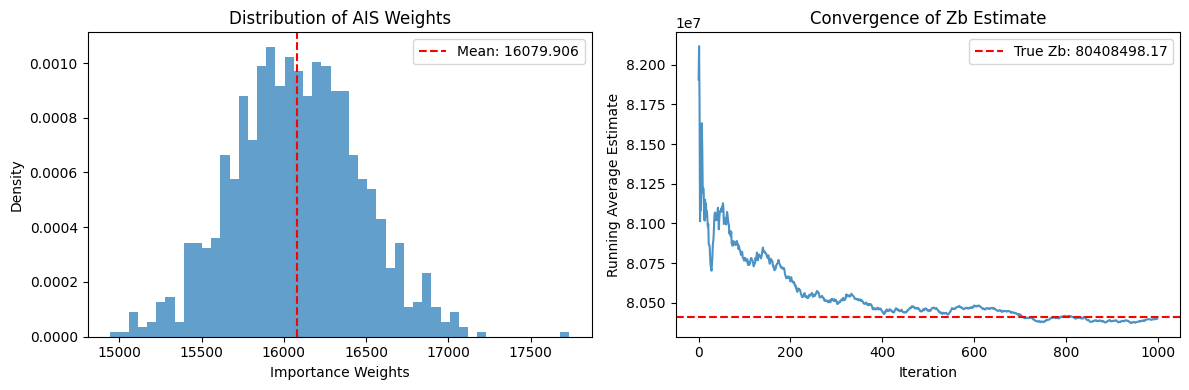


Effective Sample Size: 999.43 out of 1000
ESS ratio: 0.999


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def simulate_ais(niter=5, S=10, ncats=30, MH_steps=0):
    ### AIS simulation for categorical distribution
    # Estimate Zb (normalization constant of target distribution) given Za (uniform distribution)

    # Set random seed for reproducibility
    #np.random.seed(42)

    # Define categorical outputs
    outputs = np.array(['class'+ str(c) for c in np.arange(ncats)])
    n = outputs.shape[0]

    # Initial distribution is uniform (Za = n)
    Za = n

    # Target distribution has higher probabilities for some classes
    pdfb = 1000 + 30000 * np.random.random(n)

    # Create dictionary for easy lookup
    pdf_dict = {k: v for k, v in zip(outputs, pdfb)}

    #print("Sample of pdf values:")
    #for i, (k, v) in enumerate(list(pdf_dict.items())[:5]):
    #    print(f"{k}: {v:.2f}")

    # Define unnormalized pdf function
    def pdf(v): 
        return pdf_dict[v]

    # True normalization constant (for comparison)
    Zb_true = np.sum(pdfb)
    print(f"\nTrue Zb: {Zb_true:.2f}")

    # AIS parameters
    #S = 100  # Number of intermediate distributions
    #niter = 100  # Number of AIS chains
    beta = np.linspace(0, 1, S+1)  # Temperature schedule
    #MH_steps = 0

    #print(f"Beta schedule: {beta}")
    print(f"\nnumber of annealed steps: {S:.2f}")

    def interpolated_pdf(v, b):
        """Interpolated distribution: p_b(v) ∝ pdf(v)^b"""
        if b == 0:
            return 1  # Uniform distribution
        else:
            return pdf(v) ** b

    def transition_kernel(current_state):
        """
        Simple uniform proposal kernel for discrete categorical variables.
        Proposes a uniformly random new state from all possible outputs.
        """
        return np.random.choice(outputs)

    def metropolis_hastings_step(current_state, beta_current):
        """
        Single Metropolis-Hastings step for the interpolated distribution
        """
        # Propose new state
        proposed_state = transition_kernel(current_state)
        
        # Calculate acceptance ratio
        # Since we use uniform proposal, the proposal ratio cancels out
        current_prob = interpolated_pdf(current_state, beta_current)
        proposed_prob = interpolated_pdf(proposed_state, beta_current)
        
        acceptance_ratio = min(1, proposed_prob / current_prob)
        
        # Accept or reject
        if np.random.random() < acceptance_ratio:
            return proposed_state
        else:
            return current_state

    def ais_chain():
        """
        Single AIS chain to estimate the ratio Zb/Za
        """
        # Sample initial state from uniform distribution (beta=0)
        current_state = np.random.choice(outputs)
        
        # Initialize importance weight
        log_weight = 0
        
        # Traverse through intermediate distributions
        for s in range(S):
            beta_current = beta[s]
            beta_next = beta[s+1]
            
            # Perform several MH steps at current temperature (optional)
            # This helps with mixing
            if (MH_steps > 0):
                for _ in range(MH_steps):  # MH steps per temperature
                    current_state = metropolis_hastings_step(current_state, beta_current)
            else:
                current_state = transition_kernel(current_state)


            # Calculate importance weight increment
            # log(w) += log(p_{s+1}(v_s)) - log(p_s(v_s))
            current_prob = interpolated_pdf(current_state, beta_current)
            next_prob = interpolated_pdf(current_state, beta_next)
            
            if current_prob > 0:
                log_weight += np.log(next_prob) - np.log(current_prob)
            
        return np.exp(log_weight)

    # Run AIS estimation
    print(f"\nRunning {niter} AIS chains...")
    weights = []

    for i in tqdm(range(niter)):
        weight = ais_chain()
        weights.append(weight)
        
        if (i + 1) % 200 == 0:
            current_estimate = np.mean(weights) * Za
            print(f"Iteration {i+1}: Current Zb estimate = {current_estimate:.2f}")

    weights = np.array(weights)

    # Calculate final estimate
    Zb_estimate = np.mean(weights) * Za
    std_error = np.std(weights) * Za / np.sqrt(niter)

    print(f"\n--- Results ---")
    print(f"True Zb: {Zb_true:.2f}")
    print(f"AIS  Zb: {Zb_estimate:.2f}")
    print(f"Standard error: {std_error:.2f}")
    print(f"Relative error: {abs(Zb_estimate - Zb_true) / Zb_true * 100:.2f}%")

    # Plot histogram of weights
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(weights, bins=50, alpha=0.7, density=True)
    plt.xlabel('Importance Weights')
    plt.ylabel('Density')
    plt.title('Distribution of AIS Weights')
    plt.axvline(np.mean(weights), color='red', linestyle='--', label=f'Mean: {np.mean(weights):.3f}')
    plt.legend()

    plt.subplot(1, 2, 2)
    running_mean = np.cumsum(weights) / np.arange(1, len(weights) + 1) * Za
    plt.plot(running_mean, alpha=0.8)
    plt.axhline(Zb_true, color='red', linestyle='--', label=f'True Zb: {Zb_true:.2f}')
    plt.xlabel('Iteration')
    plt.ylabel('Running Average Estimate')
    plt.title('Convergence of Zb Estimate')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Additional analysis: Check effective sample size
    ess = (np.sum(weights)**2) / np.sum(weights**2)
    print(f"\nEffective Sample Size: {ess:.2f} out of {niter}")
    print(f"ESS ratio: {ess/niter:.3f}")

simulate_ais(niter=1000, S=1000, ncats=5000, MH_steps=1)

# confronto RSM - LDA

## LDA perplexity

In [1]:
from FRutils import *
from RSM_class import RSM

### import all libraries

import pandas as pd
import numpy as np
import scipy as sc
import gensim.corpora as corpora
from tqdm import tqdm
import time
import os
import warnings
from inspect import getsource
from octis.preprocessing.preprocessing import Preprocessing
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
##coprus preprocess functions
# 1- get the tokenized corpus
# 2- get the dictionary from a tokenized corpus
# 3- get the BoW representation of a tokenized corpus given the dictionary
# 4- get the DTM from the BoW of a tokenized corpus
# 5- make some transformations on the DTM, like log(1+x) or TF-IDF
# 6- convert the transformed DTM into a BoW representation


def build_dtm(tokenized_corpus, id2word = None):
    """
    converts a tokenized corpus to a DOcument Term Matrix. id2word is a gensim dictionary.
    """
    if (id2word == None):
        id2word = corpora.Dictionary(tokenized_corpus)
    else:
        id2word = id2word
    id_corpus = [id2word.doc2bow(document) for document in tokenized_corpus]
    vocab = id2word.token2id
    N = len(id_corpus)
    DTM = np.zeros((N, len(vocab)))
    for i in tqdm(range(N)):
        doc = id_corpus[i]
        for id, count in doc:
            DTM[i,id] = count

    return DTM


def dtm_to_bow(dtm):
    """
    Convert a DTM to BoW format
    """
    bows = []
    for row in dtm:
        bow = [(i, int(count)) for i, count in enumerate(row) if count > 0]
        bows.append(bow)
    return bows


def corpus_to_bow(corpus, id2word=None):
    """
    Convert a tokenized corpus to BoW format
    id2word is a gensim dictionary
    """
    if (id2word==None):
        id2word = corpora.Dictionary(corpus)
    bow = [id2word.doc2bow(document) for document in corpus]
    return bow



In [3]:
### data path
root_dir =  os.getcwd()
root_dir = root_dir.replace('\\', '/')
data_path = root_dir + '/preprocessed_datasets'
raw_txt_path = data_path + '/20NewsGroup/corpus.txt'
raw_labels_path = data_path + '/20NewsGroup/labels.txt'

In [4]:
## octis+mine+Hinton preprocessing

p = Preprocessing(vocabulary=None, max_features=None, remove_punctuation=True,
                    lemmatize=False,  stopword_list='english', split=True,
                    min_chars=2, min_words_docs=1,
                    max_df=1.0, min_df=0.0, language='english',
                    remove_stopwords_spacy = True,
                    verbose=True)

dataset = p.preprocess_dataset(
    documents_path = raw_txt_path,   #each row of the txt file is seen as a single document
    labels_path = raw_labels_path
)

train, test = dataset.get_partitioned_corpus(use_validation=False)

train_dtm = build_dtm(train)
test_dtm = build_dtm(test)

train_dtm_logoct = np.round(np.log(1+train_dtm))
test_dtm_logoct = np.round(np.log(1+test_dtm))

print(train_dtm_logoct.shape)
print(test_dtm_logoct.shape)


100%|██████████| 16309/16309 [00:00<00:00, 65894.77it/s]


created vocabulary with 1612 words


100%|██████████| 2447/2447 [00:00<00:00, 71978.33it/s]


(11415, 1612)
(2447, 1612)


In [5]:
# load eval

from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.evaluation_metrics.perplexity import Perplexity
from octis.evaluation_metrics.classification_metrics import AccuracyScore, F1Score, RecallScore

In [18]:
# Create LDA Model
from octis.models.LDA import LDA

model_lda = LDA(num_topics=3, alpha=0.1, passes = 5, iterations=100, chunksize=500)
# Get model output
output_lda = model_lda.train_model(dataset)

topic-word-matrix: 2darray of probs of words given topic of dim (ntopic, nwords), sum to 1 over rows (np.sum(axis=1))
topics : list of lists of words (default the first 10 ordered by importance for each topic)
topic-document-matrix : 2darray of the probs of topic given doc of dim (ntopic, nwords), sum to 1 over columns (np.sum(axis=0))
test-topic-document-matrix : same for the test

In [13]:
npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')
topic_diversity = TopicDiversity(topk=10)
ppl = Perplexity(dataset, id2word=model_lda.id2word)
acc = AccuracyScore(dataset)
f1 = F1Score(dataset)
rec = RecallScore(dataset)

# Retrieve metrics score

accuracy = acc.score(output_lda)
print('Accuracy: '+str(accuracy))

F1s = f1.score(output_lda)
print('F1 score: '+str(F1s))

recall = rec.score(output_lda)
print('Recall: '+str(recall))

topic_diversity_score = topic_diversity.score(output_lda)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(output_lda)
print("Coherence: "+str(npmi_score))

ppl_score = ppl.score(output_lda)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

Accuracy: 0.13894564773191664
F1 score: 0.13894564773191664
Recall: 0.13894564773191664
Topic diversity: 0.8
Coherence: 0.023945972085948935
Perplexity: 854.2292098825092
CrossEntropy: 6.750199553423868


In [ ]:

ppl = Perplexity(dataset, id2word = model_lda.hyperparameters['id2word'])
ppl_score = ppl.score(output_lda)
print(ppl_score)
logppl_upo = model_lda.trained_model.log_perplexity(corpus_to_bow(dataset.get_partitioned_corpus()[1], id2word=model_lda.id2word))
print(np.exp(-logppl_upo))


854.2292098825092
1034.7938818799275


In [ ]:
lda_dtm, vocab, gc = build_dtm(test, gensim_corpora = model_lda.hyperparameters['id2word'])
lda_bow = dtm_to_bow(lda_dtm)
neglppl = model_lda.trained_model.log_perplexity(lda_bow)
print(np.exp(-neglppl))


100%|██████████| 2447/2447 [00:00<00:00, 84386.81it/s]


1044.9277082817348


In [7]:
train, test = dataset.get_partitioned_corpus(use_validation=False)

train_dtm, train_vocab, gc  = build_dtm(train, gensim_corpora = model_lda.hyperparameters['id2word'])
test_dtm, test_vocab, gc = build_dtm(test, gensim_corpora = model_lda.hyperparameters['id2word'])

#bow representation from dtm
train_bow = dtm_to_bow(train_dtm)
test_bow = dtm_to_bow(test_dtm)


100%|██████████| 2447/2447 [00:00<00:00, 94111.85it/s]


In [14]:
# Compute log perplexity 
perplexity = model_lda.trained_model.log_perplexity(test_bow)
print("test Log perplexity:", -perplexity)
print("test perplexity:", np.exp(-perplexity))
perplexity = model_lda.trained_model.log_perplexity(train_bow)
print("train Log perplexity:", -perplexity)
print("train perplexity:", np.exp(-perplexity))

test Log perplexity: 6.946706561996778
test perplexity: 1039.7198304005758
train Log perplexity: 6.768168760932498
train perplexity: 869.7177736637096


In [ ]:
train, test = dataset.get_partitioned_corpus(use_validation=False)

#train_dtm, train_vocab, gc  = build_dtm(train, gensim_corpora = model_lda.hyperparameters['id2word'])
#test_dtm, test_vocab, gc = build_dtm(test, gensim_corpora = model_lda.hyperparameters['id2word'])
#bow representation from dtm
#train_bow = dtm_to_bow(train_dtm)
#test_bow = dtm_to_bow(test_dtm)

train_bow = corpus_to_bow(train, id2word = model_lda.hyperparameters['id2word'])
test_bow = corpus_to_bow(test, id2word = model_lda.hyperparameters['id2word'])


bow = test_bow
td_mat = output_lda["test-topic-document-matrix"]
tw_mat = output_lda["topic-word-matrix"]             

loglik = 0
nw = 0
for d in range(len(bow)):
    doc = bow[d]
    for w, count in doc:
        prob_t_given_d = td_mat[:,d]
        prob_w_given_t = tw_mat[:,w]
        prob_w_given_d = prob_t_given_d @ prob_w_given_t
        loglik += np.log(prob_w_given_d) * count
        nw += count

logppl = - np.sum(loglik) / np.sum(nw)
ppl = np.exp(logppl)
print('test Log perplexity:', logppl)
print('test perplexity:', ppl)


bow = train_bow
td_mat = output_lda["topic-document-matrix"]  
tw_mat = output_lda["topic-word-matrix"]             

loglik = 0
nw = 0
for d in range(len(bow)):
    doc = bow[d]
    for w, count in doc:
        prob_t_given_d = td_mat[:,d]
        prob_w_given_t = tw_mat[:,w]
        prob_w_given_d = prob_t_given_d @ prob_w_given_t
        loglik += np.log(prob_w_given_d) * count
        nw += count

logppl = - np.sum(loglik) / np.sum(nw)
ppl = np.exp(logppl)
print('train Log perplexity:', logppl)
print('train perplexity:', ppl)

test Log perplexity: 6.66466604586791
test perplexity: 784.2015339042902
train Log perplexity: 6.622291661841967
train perplexity: 751.665688428232


In [22]:
print(*list(output_lda.keys()), sep="\n")
print(model_lda._get_topics_words(4))

topic-word-matrix
topics
topic-document-matrix
test-topic-document-matrix
[['key', 'system', 'make', 'car'], ['file', 'image', 'window', 'work'], ['people', 'make', 'time', 'year']]


## RSM octis metrics

In [1]:
from FRutils import *
from RSM_class import RSM

### import all libraries

import pandas as pd
import numpy as np
import scipy as sc
import gensim.corpora as corpora
from tqdm import tqdm
import time
import os
import warnings
from inspect import getsource
from octis.preprocessing.preprocessing import Preprocessing
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

c:\Users\feder\OneDrive\Documenti\Fede\Unimib\TESI\OCTIS\OCTIS_editbyFR\OCTIS_py_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.evaluation_metrics.perplexity import Perplexity
from octis.evaluation_metrics.classification_metrics import AccuracyScore, F1Score, RecallScore

In [23]:
##coprus preprocess functions
# 1- get the tokenized corpus
# 2- get the dictionary from a tokenized corpus
# 3- get the BoW representation of a tokenized corpus given the dictionary
# 4- get the DTM from the BoW of a tokenized corpus
# 5- make some transformations on the DTM, like log(1+x) or TF-IDF
# 6- convert the transformed DTM into a BoW representation


def build_dtm(tokenized_corpus, id2word = None):
    """
    converts a tokenized corpus to a DOcument Term Matrix. id2word is a gensim dictionary.
    """
    if (id2word == None):
        id2word = corpora.Dictionary(tokenized_corpus)
    else:
        id2word = id2word
    id_corpus = [id2word.doc2bow(document) for document in tokenized_corpus]
    vocab = id2word.token2id
    N = len(id_corpus)
    DTM = np.zeros((N, len(vocab)))
    for i in tqdm(range(N)):
        doc = id_corpus[i]
        for id, count in doc:
            DTM[i,id] = count

    return DTM, id2word


def dtm_to_bow(dtm):
    """
    Convert a DTM to BoW format
    """
    bows = []
    for row in dtm:
        bow = [(i, int(count)) for i, count in enumerate(row) if count > 0]
        bows.append(bow)
    return bows


def corpus_to_bow(corpus, id2word=None):
    """
    Convert a tokenized corpus to BoW format
    id2word is a gensim dictionary
    """
    if (id2word==None):
        id2word = corpora.Dictionary(corpus)
    bow = [id2word.doc2bow(document) for document in corpus]
    return bow


In [4]:
### data path
root_dir =  os.getcwd()
root_dir = root_dir.replace('\\', '/')
data_path = root_dir + '/preprocessed_datasets'
raw_txt_path = data_path + '/20NewsGroup/corpus.txt'
raw_labels_path = data_path + '/20NewsGroup/labels.txt'

In [27]:
## octis+mine+Hinton preprocessing

p = Preprocessing(vocabulary=None, max_features=None, remove_punctuation=True,
                    lemmatize=False,  stopword_list='english', split=True,
                    min_chars=2, min_words_docs=1,
                    max_df=1.0, min_df=0.0, language='english',
                    remove_stopwords_spacy = True,
                    verbose=True)

dataset = p.preprocess_dataset(
    documents_path = raw_txt_path,   #each row of the txt file is seen as a single document
    labels_path = raw_labels_path
)

train, test = dataset.get_partitioned_corpus(use_validation=False)

train_dtm, id2word = build_dtm(train)
test_dtm, id2word = build_dtm(test, id2word)

train_dtm_logoct = np.round(np.log(1+train_dtm))
test_dtm_logoct = np.round(np.log(1+test_dtm))

print(train_dtm_logoct.shape)
print(test_dtm_logoct.shape)

100%|██████████| 16309/16309 [00:00<00:00, 63955.46it/s]


created vocabulary with 1612 words


100%|██████████| 2447/2447 [00:00<00:00, 67985.70it/s]


(11415, 1612)
(2447, 1612)


In [ ]:
model_rsm = RSM()
output_rsm = {}

In [ ]:
warnings.filterwarnings("ignore")

model_rsm.train(train_dtm_logoct, hidden = 5, epochs=300, btsz = 100, 
                momentum = 0.1, K = 1, lr = 0.1, softstart = 0.001, 
                monitor=False)

print(model_rsm.approx_ppl(train_dtm_logoct))
print(model_rsm.approx_ppl(test_dtm_logoct))

100%|██████████| 3/3 [00:06<00:00,  2.32s/it]


1208.2983959987398
1212.5827887795351


In [80]:
model_rsm.id2word = id2word

In [13]:
warnings.filterwarnings("ignore")


model_rsm.train(train_dtm_logoct, hidden = 5, epochs=200, btsz=10, 
                momentum=0.2, K=1, lr=0.1, softstart = 0.001, 
                monitor=False)

print(model_rsm.approx_ppl(train_dtm_logoct))
print(model_rsm.approx_ppl(test_dtm_logoct))

train already available weights


100%|██████████| 200/200 [07:13<00:00,  2.17s/it]


1076.1989851677738
1885.1366451357064


In [15]:
def log_ppl_upo(dtm, rsmodel):
    mfh = rsmodel.visible2hidden0(dtm)
    vprob = rsmodel.hidden2visible0(mfh)
    lpub = np.exp(-np.nansum(np.log(vprob)*dtm)/np.sum(dtm))
    return lpub


print(log_ppl_upo(train_dtm_logoct, model_rsm))
print(log_ppl_upo(test_dtm_logoct, model_rsm))

1076.1989851677718
1885.136645135703


In [61]:
w_vh, w_v, w_h = model_rsm.W

print(summary(w_vh))
print(summary(w_v))
print(summary(w_h))


{'dim': (1612, 5), 'mean': -0.01, 'stdev': 6.74, 'min': -262.56, 'q25%': -0.05, 'median': 0.1, 'q75%': 0.34, 'max': 2.22}
{'dim': (1612,), 'mean': -0.0, 'stdev': 0.76, 'min': -1.66, 'q25%': -0.55, 'median': -0.11, 'q75%': 0.46, 'max': 3.05}
{'dim': (5,), 'mean': -1.74, 'stdev': 0.16, 'min': -2.01, 'q25%': -1.79, 'median': -1.72, 'q75%': -1.67, 'max': -1.51}


In [ ]:

def topic_words(rsm, topk, id2word):
    T = rsm.hidden
    words = np.array([k for k in id2word.token2id.keys()])

    toplist = []
    for t in range(T):
        topw = w_vh[: , t]
        bestwords = words[np.argsort(topw)[::-1]][0:topk]
        toplist.append(bestwords)

    return toplist

describe_topics = topic_words(model_rsm, topk=10, id2word=id2word)

print(describe_topics)

[array(['playoff', 'brake', 'bike', 'ranger', 'team', 'fan', 'pen', 'rear',
       'stat', 'hockey'], dtype='<U14'), array(['reply', 'year', 'team', 'site', 'printer', 'series', 'guy',
       'player', 'version', 'master'], dtype='<U14'), array(['location', 'goal', 'opportunity', 'conference', 'period', 'town',
       'verify', 'publication', 'king', 'score'], dtype='<U14'), array(['game', 'mail', 'play', 'send', 'player', 'hear', 'check', 'fan',
       'kind', 'site'], dtype='<U14'), array(['shareware', 'modem', 'printer', 'vga', 'ide', 'meg',
       'motherboard', 'setup', 'scsi', 'pin'], dtype='<U14')]


In [58]:

output_rsm['topic-document-matrix'] = model_rsm.visible2hidden0(train_dtm_logoct).T
output_rsm['test-topic-document-matrix'] = model_rsm.visible2hidden0(test_dtm_logoct).T
output_rsm['topics'] = topic_words(model_rsm, topk=10, id2word=id2word)



In [59]:
print(output_rsm['topic-document-matrix'].shape)
print(output_rsm['test-topic-document-matrix'].shape)
print(len(output_rsm['topics']))
print(len(output_rsm['topics'][0]))
print(output_lda['topic-document-matrix'].shape)
print(output_lda['test-topic-document-matrix'].shape)
print(len(output_lda['topics']))
print(len(output_lda['topics'][0]))

(5, 11415)
(5, 2447)
5
10
(3, 11415)
(3, 2447)
3
10


In [81]:
npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')
topic_diversity = TopicDiversity(topk=10)
ppl = Perplexity(dataset, id2word=model_rsm.id2word)
acc = AccuracyScore(dataset)
f1 = F1Score(dataset)
rec = RecallScore(dataset)

# Retrieve metrics score

accuracy = acc.score(output_rsm)
print('Accuracy: '+str(accuracy))

F1s = f1.score(output_rsm)
print('F1 score: '+str(F1s))

recall = rec.score(output_rsm)
print('Recall: '+str(recall))

topic_diversity_score = topic_diversity.score(output_rsm)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(output_rsm)
print("Coherence: "+str(npmi_score))

ppl_score = ppl.score(output_rsm)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

Accuracy: 0.0469963220269718
F1 score: 0.0469963220269718
Recall: 0.0469963220269718
Topic diversity: 0.9
Coherence: -0.054214712190869055
Perplexity: inf
CrossEntropy: inf


In [85]:
model_rsm.approx_ppl(test_dtm_logoct)

1212.5827887795351

In [84]:
ppl.id_corpus = dtm_to_bow(test_dtm_logoct)
ppl_score = ppl.score(output_rsm)
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

Perplexity: inf
CrossEntropy: inf


In [120]:
import scipy.sparse as sparse
import scipy as sp

start = time.time()
dense_dtm = train_dtm_logoct
print(type(dense_dtm))
print(time.time() - start)

start = time.time()
sparse_dtm = sparse.csr_matrix(train_dtm_logoct)
print(type(sparse_dtm))
print(time.time() - start)

#en = model_rsm.neg_free_energy0(dense_dtm)

start = time.time()
sparse_dtm.sum(axis=1)
sparse_dtm.dot(w_v)
sparse_dtm[2:50].dot(w_v)
sparse_dtm @ w_v
print(sparse_dtm.shape)
print(type(sparse_dtm.dot(w_vh)))
print(time.time() - start)

start = time.time()
dense_dtm.sum(axis=1)
dense_dtm.dot(w_v)
dense_dtm[2:50].dot(w_v)
dense_dtm @ w_v
print(dense_dtm.shape)
print(type(dense_dtm.dot(w_vh)))
print(time.time() - start)


start = time.time()
sparse_dtm = sparse.csr_matrix(train_dtm_logoct)
sparse_dtm.dot(w_v)
sparse_dtm.sum(axis=1)
sparse_dtm[2:50].dot(w_v)
sparse_dtm @ w_v
print(sparse_dtm.shape)
print(type(sparse_dtm.dot(w_vh)))
print(time.time() - start)




<class 'numpy.ndarray'>
0.0
<class 'scipy.sparse._csr.csr_matrix'>
0.22275352478027344
(11415, 1612)
<class 'numpy.ndarray'>
0.009008646011352539
(11415, 1612)
<class 'numpy.ndarray'>
0.21400809288024902
(11415, 1612)
<class 'numpy.ndarray'>
0.2740039825439453


In [90]:
def perplex(model_output, id_corpus, return_crossentropy=False):
        # Get test topic-document matrix and topic-word matrix
        td_mat = model_output["test-topic-document-matrix"]  # shape: (num_topics, num_test_docs)
        tw_mat = model_output["topic-word-matrix"]             # shape: (num_topics, vocab_size)

        bow = id_corpus
        loglik = 0
        nw = 0
        for d in range(len(bow)):
            doc = bow[d]
            for w, count in doc:
                prob_t_given_d = td_mat[:,d]
                prob_w_given_t = tw_mat[:,w]
                prob_w_given_d = prob_t_given_d @ prob_w_given_t
                loglik += np.log(prob_w_given_d+1e-323) * count
                nw += count

        logppl = - np.sum(loglik) / np.sum(nw)

        if return_crossentropy:
            return logppl
        else:
            ppl = np.exp(logppl)
            return ppl

ppl_score = perplex(output_rsm, dtm_to_bow(test_dtm_logoct))
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

ppl_score = perplex(output_lda, dtm_to_bow(test_dtm))
print('Perplexity: '+str(ppl_score))
print('CrossEntropy: '+str(np.log(ppl_score)))

Perplexity: 1.8742813783234794e+110
CrossEntropy: 253.9125855504085
Perplexity: 862.9803893235777
CrossEntropy: 6.760391966982338


## RSM perplexity from conditional probability

In [ ]:

prob_t_given_d = model_rsm.visible2hidden0(train_dtm_logoct)


print(prob_t_given_d.shape)

meanfield_t = np.mean(prob_t_given_d, axis=0)

prob_v_given_t = np.empty((model_rsm.hidden, model_rsm.visible))
for t in range(model_rsm.hidden):
    cond_t = meanfield_t
    cond_t[t] = 1
    prob_v_given_t[t] = model_rsm.hidden2visible(cond_t)




(11415, 5)


In [76]:
print(prob_v_given_t.shape)

(5, 1612)


In [77]:
output_rsm['topic-word-matrix'] = prob_v_given_t

## final battle between RSM and LDA

RSM : I'm coming to catch You LDA